# EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import os
import re
import matplotlib.pyplot as plt
import statistics
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

# Set random seed.
np.random.seed(42)


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv("../data/dataframe_ames_cleaned.csv")
pd.set_option('display.max_columns', 4000)
pd.set_option('display.max_rows', 4000)

In [3]:
df.head()

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  Overall Qual  \
0  109  533352170     13517          3          4           3             6   
1  544  531379050     11492          3          4           3             7   
2  153  535304180      7922          4          4           3             5   
3  318  916386060      9802          4          4           3             5   
4  255  906425045     14235          3          4           3             6   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  \
0             8        1976            2005         289.0           4   
1             5        1996            1997         132.0           4   
2             7        1953            2007           0.0           3   
3             5        2006            2007           0.0           3   
4             8        1900            1993           0.0           3   

   Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  \
0           3        3.0        3.0              1               6   
1           3        4.0        3.0              1               6   
2           4        3.0        3.0              1               6   
3           3        4.0        3.0              1               1   
4           3        2.0        4.0              1               1   

   BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  1st Flr SF  \
0               1          725.0           5           5         725   
1               1          913.0           5           5         913   
2               1         1057.0           3           5        1057   
3               1          384.0           4           5         744   
4               1          676.0           3           5         831   

   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
0         754                0         1479             0.0             0.0   
1        1209                0         2122             1.0             0.0   
2           0                0         1057             1.0             0.0   
3         700                0         1444             0.0             0.0   
4         614                0         1445             0.0             0.0   

   Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  \
0          2          1              3              1             4   
1          2          1              4              1             4   
2          1          0              3              1             4   
3          2          1              3              1             3   
4          2          0              3              1             3   

   TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  Garage Finish  \
0              6           8           0         None              2   
1              8           8           1            3              2   
2              5           8           0         None              1   
3              7           8           0         None              3   
4              6           8           0         None              1   

   Garage Cars  Garage Area  Garage Qual  Garage Cond  Paved Drive  \
0          2.0        475.0          3.0          3.0            3   
1          2.0        559.0          3.0          3.0            3   
2          1.0        246.0          3.0          3.0            3   
3          2.0        400.0          3.0          3.0            3   
4          2.0        484.0          3.0          3.0            1   

   Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
0             0             44               0           0             0   
1             0             74               0           0             0   
2             0             52               0           0             0   
3           100              0               0           0             0   
4             0             59               0           0             0   

   Pool Area Pool QC Fe

In [4]:
df.describe()

Id           PID       Lot Area    Lot Shape    Utilities  \
count  2048.000000  2.048000e+03    2048.000000  2048.000000  2048.000000   
mean   1473.713867  7.133064e+08   10049.675293     3.596191     3.998535   
std     844.425431  1.886843e+08    6697.167566     0.566553     0.049401   
min       1.000000  5.263011e+08    1300.000000     1.000000     2.000000   
25%     752.750000  5.284581e+08    7500.000000     3.000000     4.000000   
50%    1483.500000  5.354532e+08    9432.000000     4.000000     4.000000   
75%    2197.500000  9.071770e+08   11512.750000     4.000000     4.000000   
max    2930.000000  9.241520e+08  159000.000000     4.000000     4.000000   

        Land Slope  Overall Qual  Overall Cond   Year Built  Year Remod/Add  \
count  2048.000000   2048.000000   2048.000000  2048.000000     2048.000000   
mean      2.947266      6.114258      5.560547  1971.751465     1984.193848   
std       0.244435      1.426126      1.104349    30.174112       21.033925   
min       1.000000      1.000000      1.000000  1872.000000     1950.000000   
25%       3.000000      5.000000      5.000000  1954.000000     1964.750000   
50%       3.000000      6.000000      5.000000  1974.000000     1993.000000   
75%       3.000000      7.000000      6.000000  2001.000000     2004.000000   
max       3.000000     10.000000      9.000000  2010.000000     2010.000000   

       Mas Vnr Area   Exter Qual   Exter Cond    Bsmt Qual    Bsmt Cond  \
count   2048.000000  2048.000000  2048.000000  2048.000000  2048.000000   
mean      98.770996     3.406738     3.085938     3.493164     2.932129   
std      174.411461     0.588187     0.373051     0.895602     0.565049   
min        0.000000     2.000000     1.000000     0.000000     0.000000   
25%        0.000000     3.000000     3.000000     3.000000     3.000000   
50%        0.000000     3.000000     3.000000     4.000000     3.000000   
75%      160.000000     4.000000     3.000000     4.000000     3.000000   
max     1600.000000     5.000000     5.000000     5.000000     5.000000   

       Bsmt Exposure  BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  \
count    2048.000000     2048.000000     2048.000000    2048.000000   
mean        1.632324        3.567383        1.275879    1058.601562   
std         1.077400        2.123990        0.949411     448.999749   
min         0.000000        0.000000        0.000000       0.000000   
25%         1.000000        1.000000        1.000000     793.000000   
50%         1.000000        4.000000        1.000000     995.500000   
75%         2.000000        6.000000        1.000000    1319.000000   
max         4.000000        6.000000        6.000000    6110.000000   

        Heating QC   Electrical   1st Flr SF   2nd Flr SF  Low Qual Fin SF  \
count  2048.000000  2048.000000  2048.000000  2048.000000      2048.000000   
mean      4.159180     4.885742  1163.431152   329.378906         5.520996   
std       0.963959     0.402280   392.294626   425.680677        51.105842   
min       1.000000     1.000000   334.000000     0.000000         0.000000   
25%       3.000000     5.000000   879.000000     0.000000         0.000000   
50%       5.000000     5.000000  1093.000000     0.000000         0.000000   
75%       5.000000     5.000000  1405.000000   691.750000         0.000000   
max       5.000000     5.000000  5095.000000  1862.000000      1064.000000   

       Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath    Full Bath    Half Bath  \
count  2048.000000     2048.000000     2048.000000  2048.000000  2048.000000   
mean   1498.331055        0.427734        0.063477     1.576660     0.371094   
std     497.948344        0.522715        0.251763     0.548553     0.501083   
min     334.000000        0.000000        0.000000     0.000000     0.000000   
25%    1129.500000        0.000000        0.000000     1.000000     0.000000   
50%    1444.000000        0.000000        0.000000     2.000000     0.000000   
75%    1728.000000        1.000

## EDA

In [5]:
# Creating a new variable called psf
# Usually psf is calculated by price per square foot
# But in Ames, there are property with a very large plot area but much smaller living area
# As such, the decision was made to calculate psf by the total living area above the ground
df['psf'] = df['SalePrice'] / df['Gr Liv Area']

In [6]:
# Creating a new variable called age
df['age'] = df['Yr Sold'] - df['Year Built']

In [7]:
#shifting sale price column to the back
col_name="SalePrice"
first_col = df.pop(col_name)

In [8]:
df.insert(234, col_name, first_col)

In [9]:
df.head()

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  Overall Qual  \
0  109  533352170     13517          3          4           3             6   
1  544  531379050     11492          3          4           3             7   
2  153  535304180      7922          4          4           3             5   
3  318  916386060      9802          4          4           3             5   
4  255  906425045     14235          3          4           3             6   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  \
0             8        1976            2005         289.0           4   
1             5        1996            1997         132.0           4   
2             7        1953            2007           0.0           3   
3             5        2006            2007           0.0           3   
4             8        1900            1993           0.0           3   

   Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  \
0           3        3.0        3.0              1               6   
1           3        4.0        3.0              1               6   
2           4        3.0        3.0              1               6   
3           3        4.0        3.0              1               1   
4           3        2.0        4.0              1               1   

   BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  1st Flr SF  \
0               1          725.0           5           5         725   
1               1          913.0           5           5         913   
2               1         1057.0           3           5        1057   
3               1          384.0           4           5         744   
4               1          676.0           3           5         831   

   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
0         754                0         1479             0.0             0.0   
1        1209                0         2122             1.0             0.0   
2           0                0         1057             1.0             0.0   
3         700                0         1444             0.0             0.0   
4         614                0         1445             0.0             0.0   

   Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  \
0          2          1              3              1             4   
1          2          1              4              1             4   
2          1          0              3              1             4   
3          2          1              3              1             3   
4          2          0              3              1             3   

   TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  Garage Finish  \
0              6           8           0         None              2   
1              8           8           1            3              2   
2              5           8           0         None              1   
3              7           8           0         None              3   
4              6           8           0         None              1   

   Garage Cars  Garage Area  Garage Qual  Garage Cond  Paved Drive  \
0          2.0        475.0          3.0          3.0            3   
1          2.0        559.0          3.0          3.0            3   
2          1.0        246.0          3.0          3.0            3   
3          2.0        400.0          3.0          3.0            3   
4          2.0        484.0          3.0          3.0            1   

   Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
0             0             44               0           0             0   
1             0             74               0           0             0   
2             0             52               0           0             0   
3           100              0               0           0             0   
4             0             59               0           0             0   

   Pool Area Pool QC Fe

In [10]:
# This heatmap takes 3-5 mins to compile, as such i am not going to run it again, but am leaving the code here
#fig, ax = plt.subplots(figsize=(200,200)) 
#sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='mako')
#plt.savefig('correlation heatmap v1')

## Observations from 1st correlation chart:

### From highest to lowest

1. 0.8  Overall Quality and Saleprice
2. 0.71 External Quality and Saleprice
3. 0.7 Gr Liv Area and Saleprice
4. 0.69 Kitchen quality and saleprice
5. 0.65 Garage Area and Garage Car Size and saleprice
6. 0.63 psf and saleprice
7. 0.63 total basement sqft and saleprice
8. 0.62 basement quality and saleprice
9. 0.62 1st floor sqft and saleprice
10. 0.57 year built and saleprice
11. 0.56 garage finish and saleprice
12. 0.55 year remodeled and saleprice
13. 0.54 no. of full bath and saleprice
14. 0.53 poured concrete foundation and saleprice
15. 0.5 total rooms above ground and saleprice
16. 0.47 No. of fireplaces and saleprice
17. 0.46 Heating QC and saleprice
18. 0.45 Neighborhood (Northridge Heights) and Saleprice
19. 0.43 Basement exposure and saleprice

In [11]:
df.shape

(2048, 235)

In [12]:
df.describe()

Id           PID       Lot Area    Lot Shape    Utilities  \
count  2048.000000  2.048000e+03    2048.000000  2048.000000  2048.000000   
mean   1473.713867  7.133064e+08   10049.675293     3.596191     3.998535   
std     844.425431  1.886843e+08    6697.167566     0.566553     0.049401   
min       1.000000  5.263011e+08    1300.000000     1.000000     2.000000   
25%     752.750000  5.284581e+08    7500.000000     3.000000     4.000000   
50%    1483.500000  5.354532e+08    9432.000000     4.000000     4.000000   
75%    2197.500000  9.071770e+08   11512.750000     4.000000     4.000000   
max    2930.000000  9.241520e+08  159000.000000     4.000000     4.000000   

        Land Slope  Overall Qual  Overall Cond   Year Built  Year Remod/Add  \
count  2048.000000   2048.000000   2048.000000  2048.000000     2048.000000   
mean      2.947266      6.114258      5.560547  1971.751465     1984.193848   
std       0.244435      1.426126      1.104349    30.174112       21.033925   
min       1.000000      1.000000      1.000000  1872.000000     1950.000000   
25%       3.000000      5.000000      5.000000  1954.000000     1964.750000   
50%       3.000000      6.000000      5.000000  1974.000000     1993.000000   
75%       3.000000      7.000000      6.000000  2001.000000     2004.000000   
max       3.000000     10.000000      9.000000  2010.000000     2010.000000   

       Mas Vnr Area   Exter Qual   Exter Cond    Bsmt Qual    Bsmt Cond  \
count   2048.000000  2048.000000  2048.000000  2048.000000  2048.000000   
mean      98.770996     3.406738     3.085938     3.493164     2.932129   
std      174.411461     0.588187     0.373051     0.895602     0.565049   
min        0.000000     2.000000     1.000000     0.000000     0.000000   
25%        0.000000     3.000000     3.000000     3.000000     3.000000   
50%        0.000000     3.000000     3.000000     4.000000     3.000000   
75%      160.000000     4.000000     3.000000     4.000000     3.000000   
max     1600.000000     5.000000     5.000000     5.000000     5.000000   

       Bsmt Exposure  BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  \
count    2048.000000     2048.000000     2048.000000    2048.000000   
mean        1.632324        3.567383        1.275879    1058.601562   
std         1.077400        2.123990        0.949411     448.999749   
min         0.000000        0.000000        0.000000       0.000000   
25%         1.000000        1.000000        1.000000     793.000000   
50%         1.000000        4.000000        1.000000     995.500000   
75%         2.000000        6.000000        1.000000    1319.000000   
max         4.000000        6.000000        6.000000    6110.000000   

        Heating QC   Electrical   1st Flr SF   2nd Flr SF  Low Qual Fin SF  \
count  2048.000000  2048.000000  2048.000000  2048.000000      2048.000000   
mean      4.159180     4.885742  1163.431152   329.378906         5.520996   
std       0.963959     0.402280   392.294626   425.680677        51.105842   
min       1.000000     1.000000   334.000000     0.000000         0.000000   
25%       3.000000     5.000000   879.000000     0.000000         0.000000   
50%       5.000000     5.000000  1093.000000     0.000000         0.000000   
75%       5.000000     5.000000  1405.000000   691.750000         0.000000   
max       5.000000     5.000000  5095.000000  1862.000000      1064.000000   

       Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath    Full Bath    Half Bath  \
count  2048.000000     2048.000000     2048.000000  2048.000000  2048.000000   
mean   1498.331055        0.427734        0.063477     1.576660     0.371094   
std     497.948344        0.522715        0.251763     0.548553     0.501083   
min     334.000000        0.000000        0.000000     0.000000     0.000000   
25%    1129.500000        0.000000        0.000000     1.000000     0.000000   
50%    1444.000000        0.000000        0.000000     2.000000     0.000000   
75%    1728.000000        1.000

Next I will look at the variables with high correlation as these make the biggest impact on prediction.
If I can remove / reduce outliers, the prediction model will be able to get a better score.

In [13]:
#fig, ax = plt.subplots(figsize=(20,10)) 
#plt.axvline(df['SalePrice'].mean(), color = 'orange')
#sns.scatterplot(data = df, x = "SalePrice", y ="Lot Area")

In [14]:
# There are 24 instances of lot area with 3 x std deviation above the mean
#df["Lot Area"][(df["Lot Area"] > np.mean(df["Lot Area"]) + 3*np.std(df["Lot Area"]))].count()

In [15]:
#df_no_out = df[(df["Lot Area"] < np.mean(df["Lot Area"]) + 3*np.std(df["Lot Area"]))]

In [16]:
#fig, ax = plt.subplots(figsize=(20,10)) 
#plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
#sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Lot Area")

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

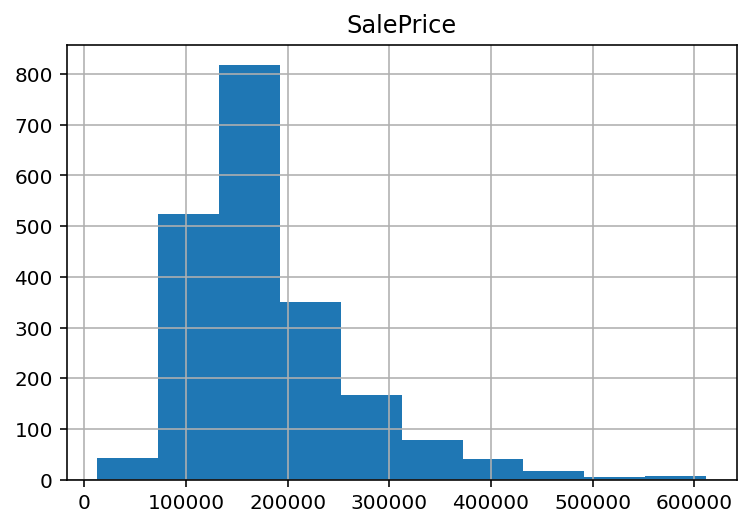

In [17]:
df.hist(column = "SalePrice")

Looking at sale price, it is skewed to the right, meaning that there are lots of outliers.
As such, the removal of right skewed outliers by using 2 x std dec away from the mean will be implemented.

In [18]:
df_no_out = df[(df["SalePrice"] < np.mean(df["SalePrice"]) + 3*np.std(df["SalePrice"]))]

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

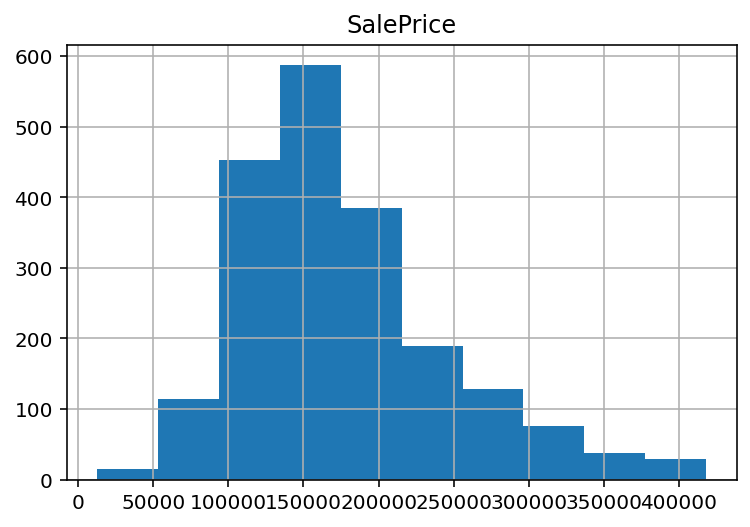

In [19]:
df_no_out.hist(column = "SalePrice")

The far right skew has been minimized, though it still skews to the right, but I keep noted of this and may come back to remove outliers more aggressively.

<AxesSubplot:xlabel='SalePrice', ylabel='Overall Qual'>

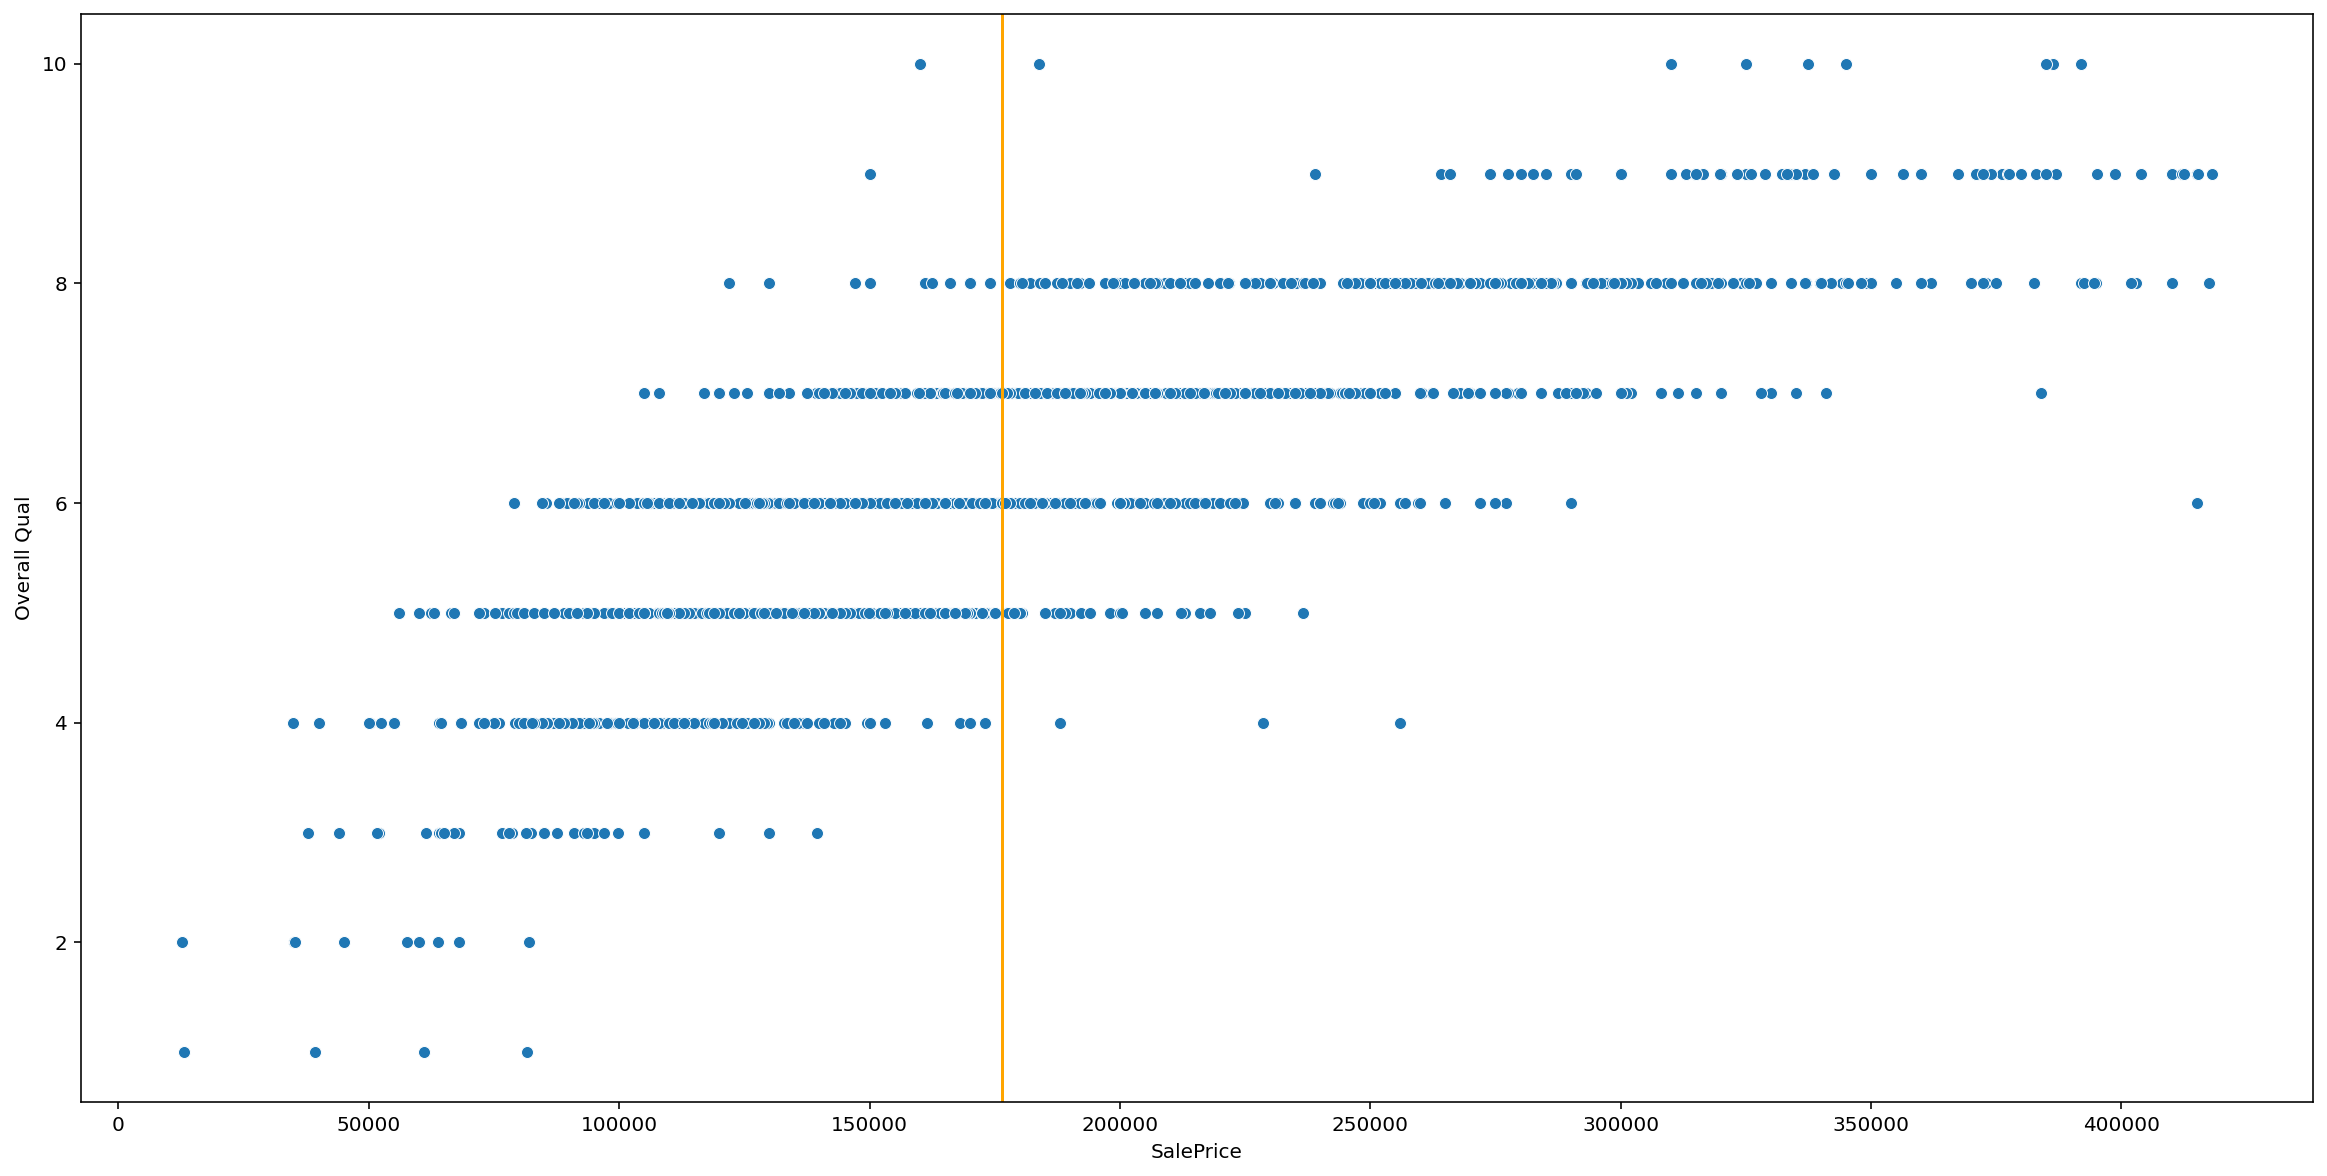

In [20]:
# now looking at overall quality vs sale price
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Overall Qual")

There is an obvious outlier at quality 6, some at 9 and some at 10.

In [21]:
df_eq = df_no_out.loc[(df_no_out['Overall Qual'] == 6) & (df_no_out['SalePrice'] > 400000)]
df_eq.head()

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  \
1894  2738  905427030     19800          4          4           3   

      Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
1894             6             8        1935            1990           0.0   

      Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
1894           3           3        3.0        3.0              1   

      BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  \
1894               3               1         1836.0           4           5   

      1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
1894        1836        1836                0         3672             0.0   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
1894             0.0          3          1              5              1   

      Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
1894             4              7           8           2            4   

      Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond  \
1894              1          2.0        836.0          3.0          3.0   

      Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1894            3           684             80              32           0   

      Screen Porch  Pool Area Pool QC Fence  Misc Val  Mo Sold  Yr Sold  \
1894             0          0    None  None         0       12     2006   

      Lot Frontage_zero_imputed  Lot Frontage_mean_imputed  \
1894                       60.0                       60.0   

      Lot Frontage_Reg_imputed  MS SubClass_20  MS SubClass_30  \
1894                      60.0               0               0   

      MS SubClass_40  MS SubClass_45  MS SubClass_50  MS SubClass_60  \
1894               0               0               0               0   

      MS SubClass_70  MS SubClass_75  MS SubClass_80  MS SubClass_85  \
1894               0               1               0               0   

      MS SubClass_90  MS SubClass_120  MS SubClass_150  MS SubClass_160  \
1894               0                0                0                0   

      MS SubClass_180  MS SubClass_190  MS Zoning_A (agr)  MS Zoning_C (all)  \
1894                0                0                  0                  0   

      MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  \
1894             0                  0             0             1   

      MS Zoning_RM  Street_Grvl  Street_Pave  Alley_Grvl  Alley_None  \
1894             0            0            1           0           1   

      Alley_Pave  Land Contour_Bnk  Land Contour_HLS  Land Contour_Low  \
1894           0                 0                 0                 0   

      Land Contour_Lvl  Lot Config_Corner  Lot Config_CulDSac  Lot Config_FR2  \
1894                 1                  0                   0               0   

      Lot Config_FR3  Lot Config_Inside  Neighborhood_Blmngtn  \
1894               0                  1                     0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1894                     0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1894                     0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_Greens  \
1894                     1                     0                    0   

      Neighborhood_GrnHill  Neighborhood_IDOTRR  Neighborhood_Landmrk  \
1894                     0                    0                     0   

      Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
1894                     0                     0                   0   

      Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
1894                     0                    0                     0   

      Neighborhood_NridgHt 

This unit has basement, 1st flr and 2nd flr all of the same size, which may explain why its an outlier.

In [22]:
df_eq = df_no_out.loc[(df_no_out['Overall Qual'] == 9) & (df_no_out['SalePrice'] < 200000)]
df_eq.head()

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  \
125  1183  533350090     24572          3          4           3   

     Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
125             9             3        1977            1977        1050.0   

     Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
125           4           4        4.0        3.0              1   

     BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  \
125               6               1          994.0           3           5   

     1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
125        1599        1345                0         2944             0.0   

     Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
125             0.0          2          2              3              1   

     Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
125             4              9           8           1            4   

     Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond  \
125              2          3.0        864.0          3.0          3.0   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
125            3           140             70              16           0   

     Screen Porch  Pool Area Pool QC Fence  Misc Val  Mo Sold  Yr Sold  \
125             0          0    None  None         0        6     2008   

     Lot Frontage_zero_imputed  Lot Frontage_mean_imputed  \
125                        0.0                       69.1   

     Lot Frontage_Reg_imputed  MS SubClass_20  MS SubClass_30  MS SubClass_40  \
125                105.906389               0               0               0   

     MS SubClass_45  MS SubClass_50  MS SubClass_60  MS SubClass_70  \
125               0               0               1               0   

     MS SubClass_75  MS SubClass_80  MS SubClass_85  MS SubClass_90  \
125               0               0               0               0   

     MS SubClass_120  MS SubClass_150  MS SubClass_160  MS SubClass_180  \
125                0                0                0                0   

     MS SubClass_190  MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  \
125                0                  0                  0             0   

     MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  Street_Grvl  \
125                  0             0             1             0            0   

     Street_Pave  Alley_Grvl  Alley_None  Alley_Pave  Land Contour_Bnk  \
125            1           0           1           0                 0   

     Land Contour_HLS  Land Contour_Low  Land Contour_Lvl  Lot Config_Corner  \
125                 0                 0                 1                  0   

     Lot Config_CulDSac  Lot Config_FR2  Lot Config_FR3  Lot Config_Inside  \
125                   1               0               0                  0   

     Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
125                     0                     0                    0   

     Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
125                     0                     0                     0   

     Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
125                     0                     0                     0   

     Neighborhood_Greens  Neighborhood_GrnHill  Neighborhood_IDOTRR  \
125                    0                     0                    0   

     Neighborhood_Landmrk  Neighborhood_MeadowV  Neighborhood_Mitchel  \
125                     0                     0                     0   

     Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
125                   0                     0                    0   

     Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
125                     0                     0                   

In [23]:
df_eq = df_no_out.loc[(df_no_out['Overall Qual'] == 10) & (df_no_out['SalePrice'] < 200000)]
df_eq.head()

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  \
959   1499  908154235     63887          1          4           3   
1882  2181  908154195     39290          3          4           3   

      Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
959             10             5        2008            2008         796.0   
1882            10             5        2008            2009        1224.0   

      Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
959            5           3        5.0        3.0              4   
1882           5           3        5.0        3.0              4   

      BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  \
959                6               1         6110.0           5           5   
1882               6               1         5095.0           5           5   

      1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
959         4692         950                0         5642             2.0   
1882        5095           0                0         5095             1.0   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
959              0.0          2          1              3              1   
1882             1.0          2          1              2              1   

      Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
959              5             12           8           3            4   
1882             5             15           8           2            4   

      Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond  \
959               3          2.0       1418.0          3.0          3.0   
1882              3          3.0       1154.0          3.0          3.0   

      Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
959             3           214            292               0           0   
1882            3           546            484               0           0   

      Screen Porch  Pool Area Pool QC Fence  Misc Val  Mo Sold  Yr Sold  \
959              0        480       4  None         0        1     2008   
1882             0          0    None  None     17000       10     2007   

      Lot Frontage_zero_imputed  Lot Frontage_mean_imputed  \
959                       313.0                      313.0   
1882                      128.0                      128.0   

      Lot Frontage_Reg_imputed  MS SubClass_20  MS SubClass_30  \
959                      313.0               0               0   
1882                     128.0               1               0   

      MS SubClass_40  MS SubClass_45  MS SubClass_50  MS SubClass_60  \
959                0               0               0               1   
1882               0               0               0               0   

      MS SubClass_70  MS SubClass_75  MS SubClass_80  MS SubClass_85  \
959                0               0               0               0   
1882               0               0               0               0   

      MS SubClass_90  MS SubClass_120  MS SubClass_150  MS SubClass_160  \
959                0                0                0                0   
1882               0                0                0                0   

      MS SubClass_180  MS SubClass_190  MS Zoning_A (agr)  MS Zoning_C (all)  \
959                 0                0                  0                  0   
1882                0                0                  0                  0   

      MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  \
959              0                  0             0             1   
1882             0                  0             0             1   

      MS Zoning_RM  Street_Grvl  Street_Pave  Alley_Grvl  Alley_None  \
959              0            0            1           0           1   
1882             0            0            1           0           1   

      Alley_Pave  Land Contour_Bn

These outliers will be removed as they will affect the model's prediction, given how highly ranked overall quality is on the correlation matrix.

In [24]:
df_no_out.drop([1894, 125, 959, 1882], inplace = True)

/Users/as/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='SalePrice', ylabel='Overall Qual'>

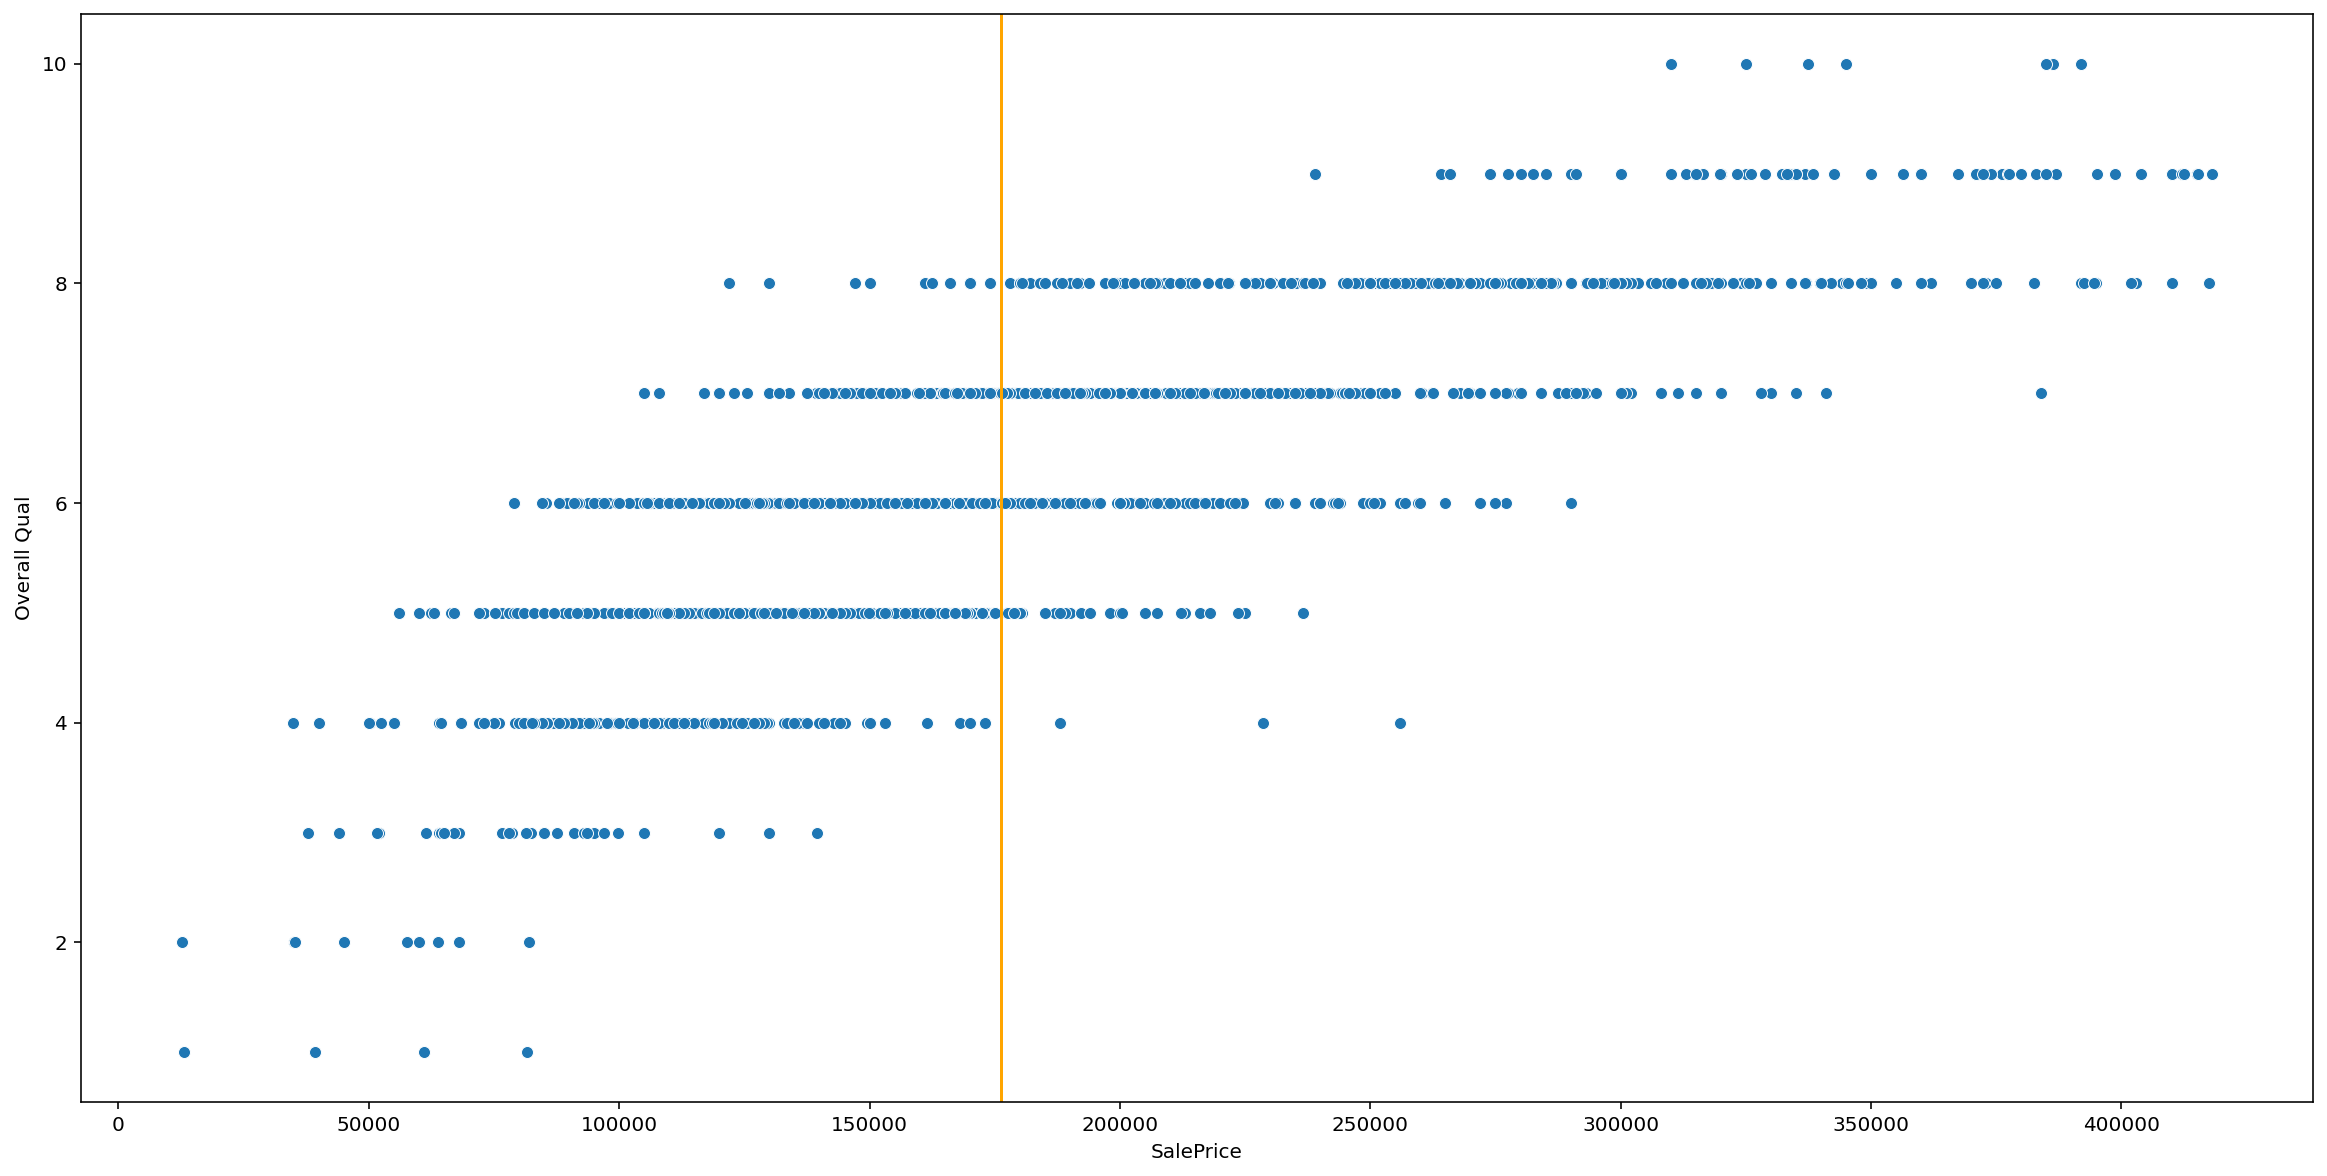

In [25]:
# now looking at overall quality vs sale price
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Overall Qual")

Outliers removed.

<AxesSubplot:xlabel='SalePrice', ylabel='Exter Qual'>

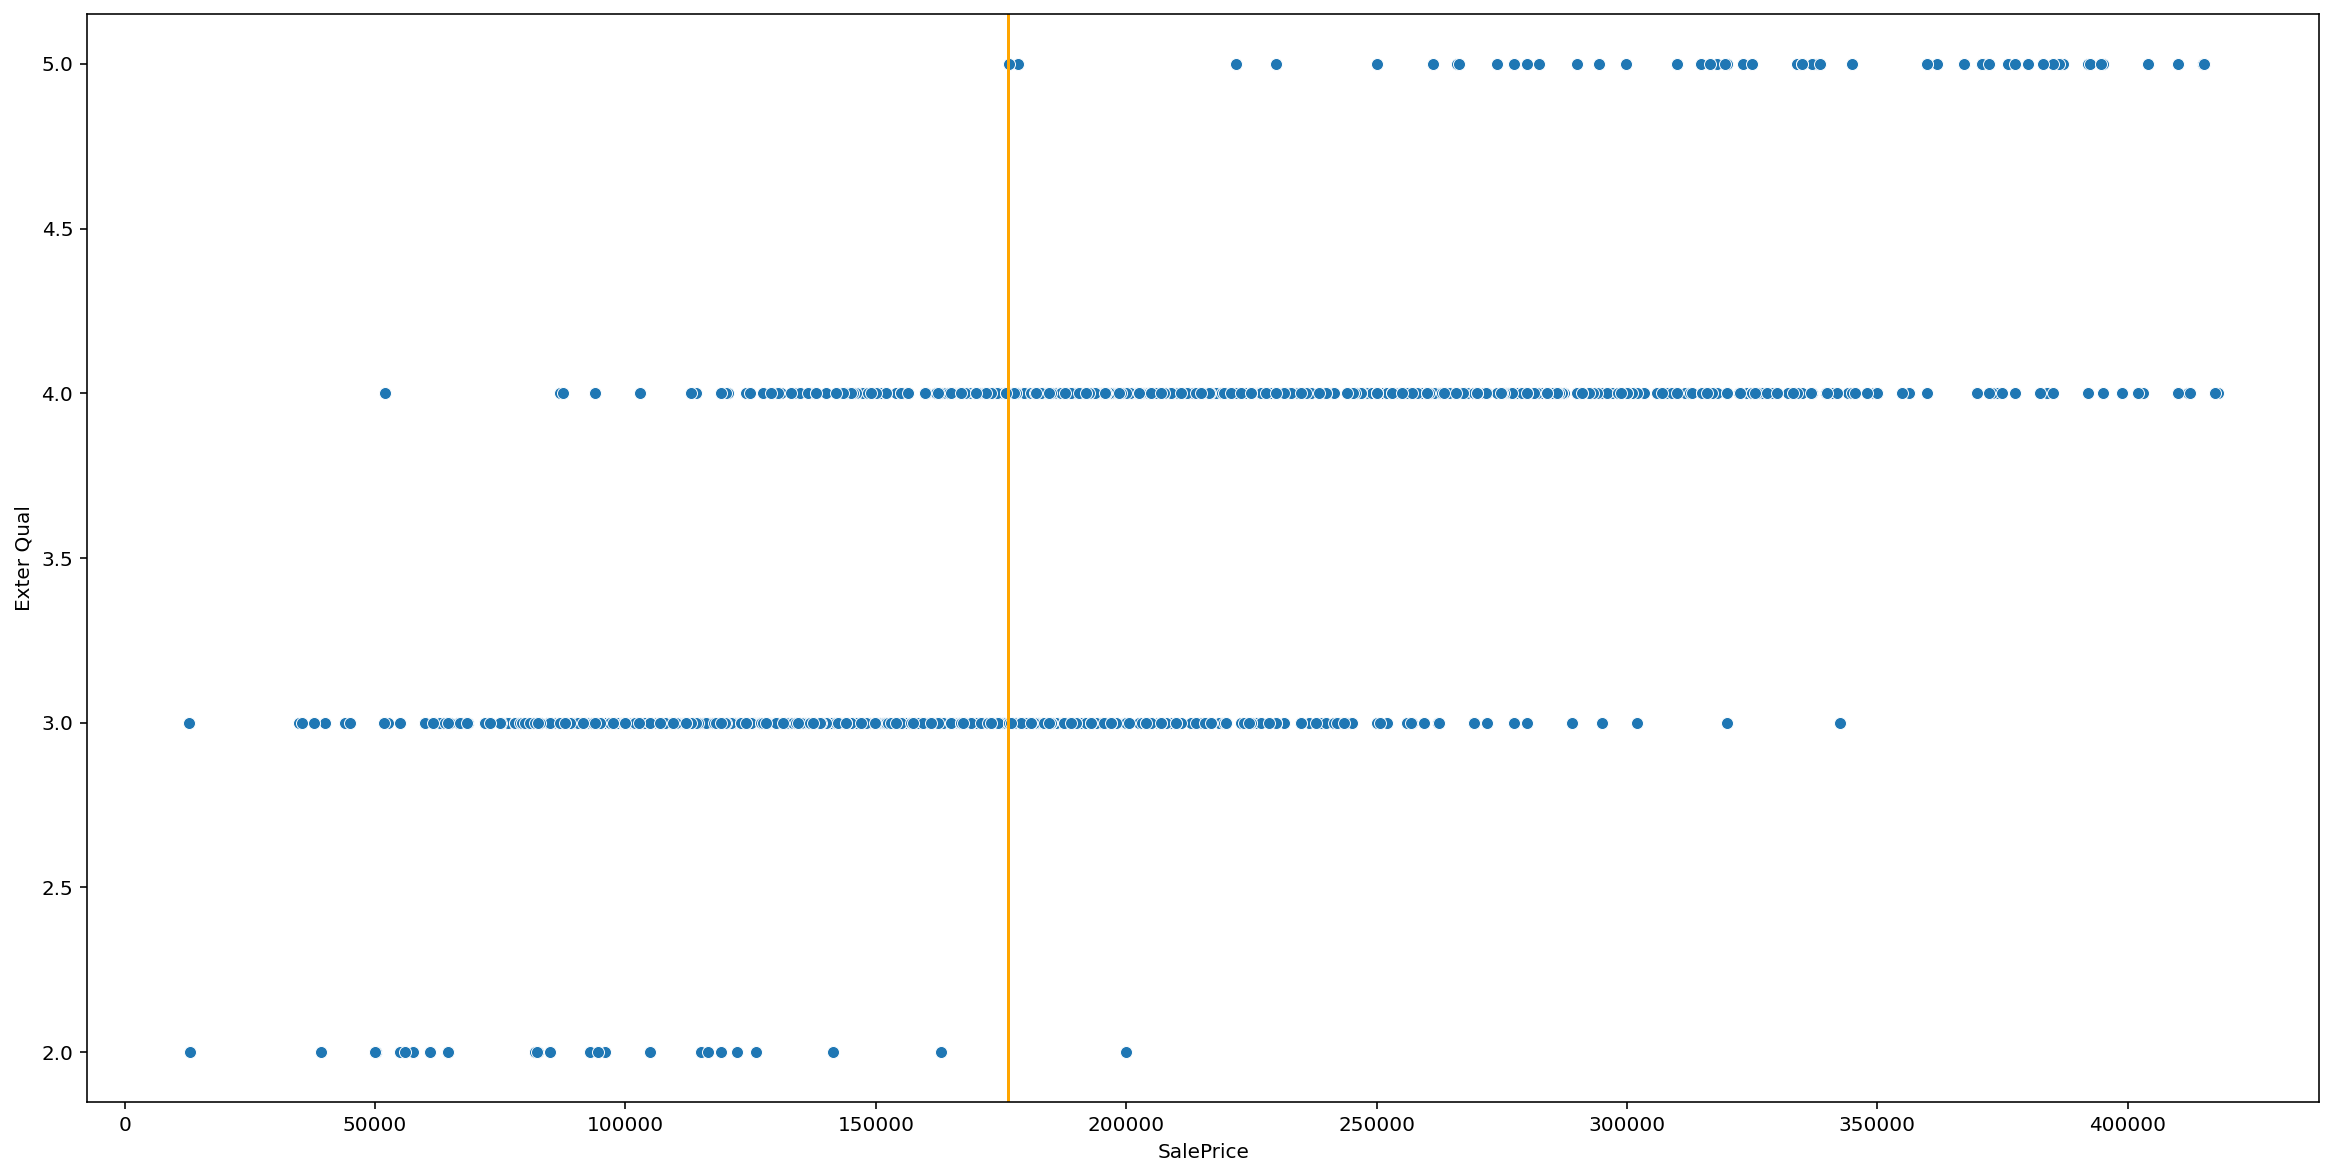

In [26]:
# now looking at external quality vs saleprice
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Exter Qual")

In [27]:
df_eq = df_no_out.loc[(df_no_out['Exter Qual'] == 5) & (df_no_out['SalePrice'] < 200000)]
df_eq.head()

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  \
876   1203  534252090     12122          3          4           3   
1980   990  526351030     11029          3          4           3   

      Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
876              7             9        1961            2007         210.0   
1980             6             8        1958            2002           0.0   

      Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
876            5           3        3.0        3.0              3   
1980           5           3        4.0        3.0              1   

      BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  \
876                5               1          944.0           4           5   
1980               5               4         1184.0           5           5   

      1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
876          999           0                0          999             1.0   
1980        1414           0                0         1414             1.0   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
876              0.0          1          0              3              1   
1980             0.0          1          0              3              1   

      Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
876              5              6           8           0         None   
1980             3              6           7           1            3   

      Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond  \
876               2          2.0        588.0          3.0          3.0   
1980              1          2.0        601.0          3.0          3.0   

      Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
876             3           144             76               0           0   
1980            3             0             51               0           0   

      Screen Porch  Pool Area Pool QC Fence  Misc Val  Mo Sold  Yr Sold  \
876              0          0    None  None         0        7     2008   
1980           190          0    None  None         0        5     2008   

      Lot Frontage_zero_imputed  Lot Frontage_mean_imputed  \
876                         0.0                       69.1   
1980                       87.0                       87.0   

      Lot Frontage_Reg_imputed  MS SubClass_20  MS SubClass_30  \
876                  74.938259               0               0   
1980                 87.000000               1               0   

      MS SubClass_40  MS SubClass_45  MS SubClass_50  MS SubClass_60  \
876                0               0               0               0   
1980               0               0               0               0   

      MS SubClass_70  MS SubClass_75  MS SubClass_80  MS SubClass_85  \
876                0               0               0               1   
1980               0               0               0               0   

      MS SubClass_90  MS SubClass_120  MS SubClass_150  MS SubClass_160  \
876                0                0                0                0   
1980               0                0                0                0   

      MS SubClass_180  MS SubClass_190  MS Zoning_A (agr)  MS Zoning_C (all)  \
876                 0                0                  0                  0   
1980                0                0                  0                  0   

      MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  \
876              0                  0             0             1   
1980             0                  0             0             1   

      MS Zoning_RM  Street_Grvl  Street_Pave  Alley_Grvl  Alley_None  \
876              0            0            1           0           1   
1980             0            0            1           0           1   

      Alley_Pave  Land Contour_Bn

In [28]:
df_eq = df_no_out.loc[(df_no_out['Exter Qual'] == 2) & (df_no_out['SalePrice'] > 190000)]
df_eq.head()

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  \
857  2195  909176080     10896          4          4           3   

     Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
857             6             7        1914            1995           0.0   

     Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
857           2           3        3.0        2.0              1   

     BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  \
857               2               1         1440.0           5           4   

     1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
857        1440        1440              515         3395             0.0   

     Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
857             0.0          2          0              8              2   

     Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
857             2             14           8           0         None   

     Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond  \
857              0          0.0          0.0          0.0          0.0   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
857            1             0            110               0           0   

     Screen Porch  Pool Area Pool QC Fence  Misc Val  Mo Sold  Yr Sold  \
857             0          0    None  None         0        3     2007   

     Lot Frontage_zero_imputed  Lot Frontage_mean_imputed  \
857                       60.0                       60.0   

     Lot Frontage_Reg_imputed  MS SubClass_20  MS SubClass_30  MS SubClass_40  \
857                      60.0               0               0               0   

     MS SubClass_45  MS SubClass_50  MS SubClass_60  MS SubClass_70  \
857               0               0               0               0   

     MS SubClass_75  MS SubClass_80  MS SubClass_85  MS SubClass_90  \
857               0               0               0               0   

     MS SubClass_120  MS SubClass_150  MS SubClass_160  MS SubClass_180  \
857                0                0                0                0   

     MS SubClass_190  MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  \
857                1                  0                  0             0   

     MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  Street_Grvl  \
857                  0             1             0             0            0   

     Street_Pave  Alley_Grvl  Alley_None  Alley_Pave  Land Contour_Bnk  \
857            1           0           0           1                 1   

     Land Contour_HLS  Land Contour_Low  Land Contour_Lvl  Lot Config_Corner  \
857                 0                 0                 0                  0   

     Lot Config_CulDSac  Lot Config_FR2  Lot Config_FR3  Lot Config_Inside  \
857                   0               0               0                  1   

     Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
857                     0                     0                    0   

     Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
857                     0                     0                     0   

     Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
857                     0                     0                     0   

     Neighborhood_Greens  Neighborhood_GrnHill  Neighborhood_IDOTRR  \
857                    0                     0                    0   

     Neighborhood_Landmrk  Neighborhood_MeadowV  Neighborhood_Mitchel  \
857                     0                     0                     0   

     Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
857                   0                     0                    0   

     Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
857                     0                     0                   

Index 857, ID 2915 has bsmt, 1st flr and 2nd flr all with the same size. It could explain why it is an outlier. But it has to be removed as it will affect the model. But this data can be re-analyzed after cleaning. It is similar to another unit removed earlier index 1984, id 2738.

In [29]:
df_no_out.drop([876, 1980, 857], inplace = True)

/Users/as/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='SalePrice', ylabel='Exter Qual'>

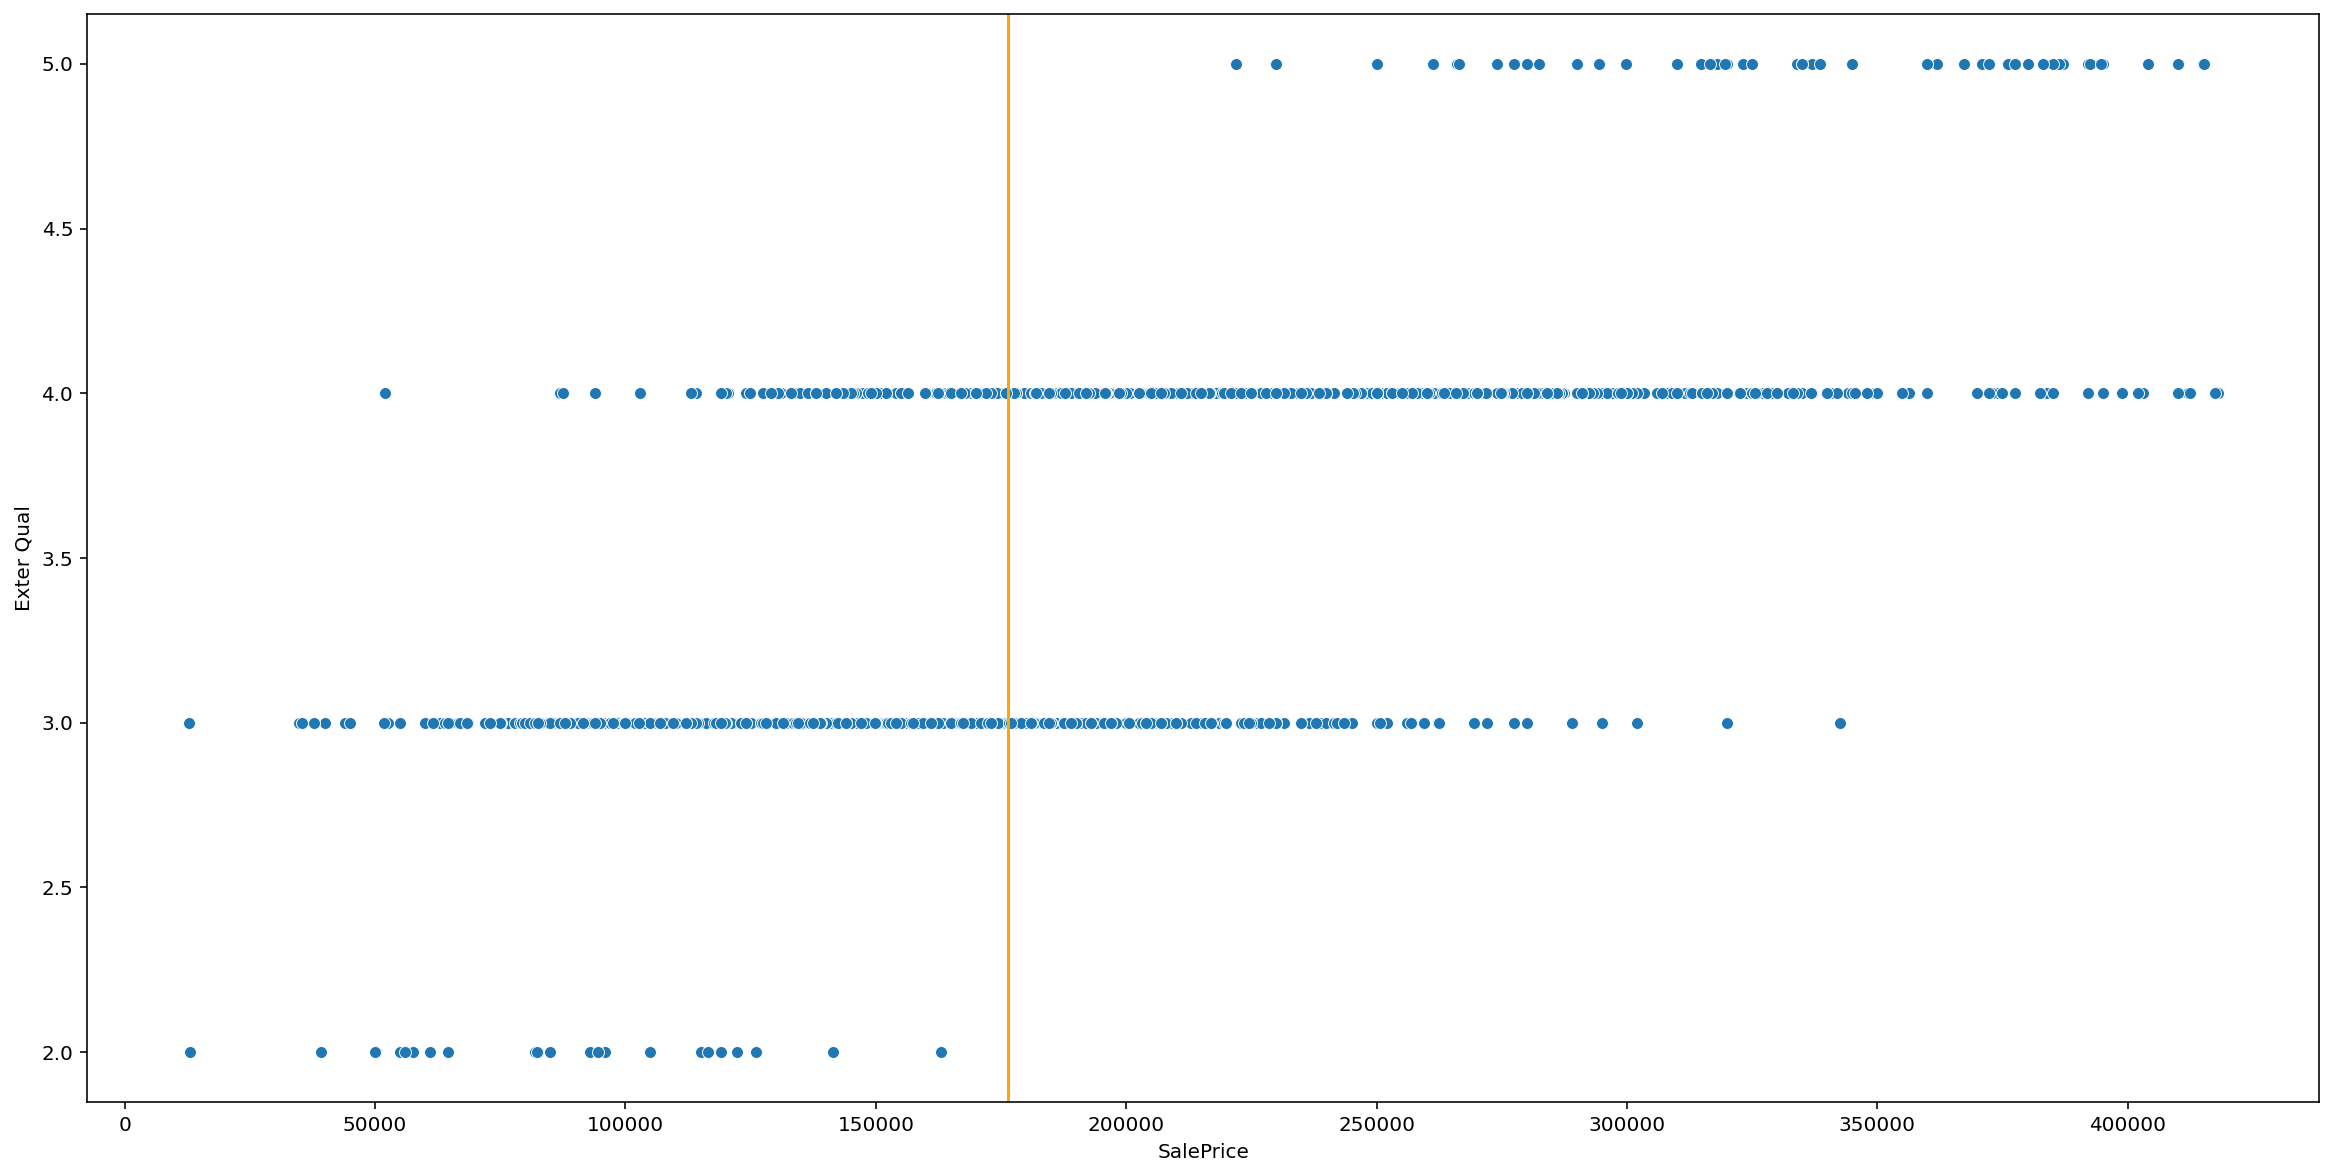

In [30]:
# now looking at external quality vs saleprice
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Exter Qual")

/Users/as/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exter Qual'>

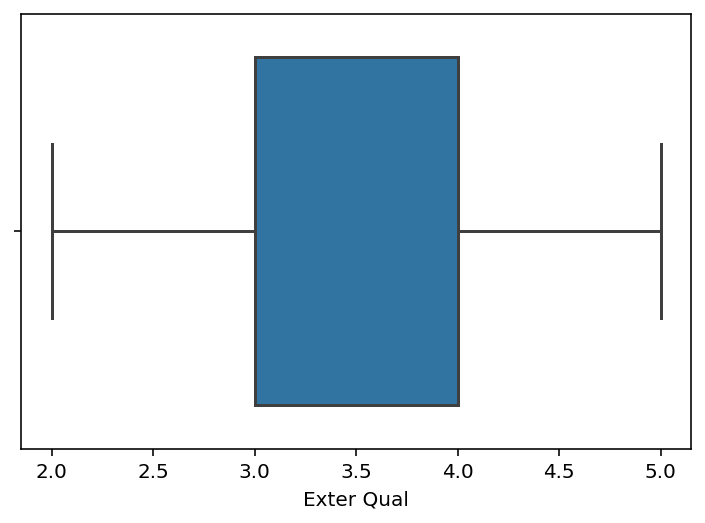

In [31]:
sns.boxplot(df_no_out['Exter Qual'])

No obvious outliers observed.

<AxesSubplot:xlabel='SalePrice', ylabel='Gr Liv Area'>

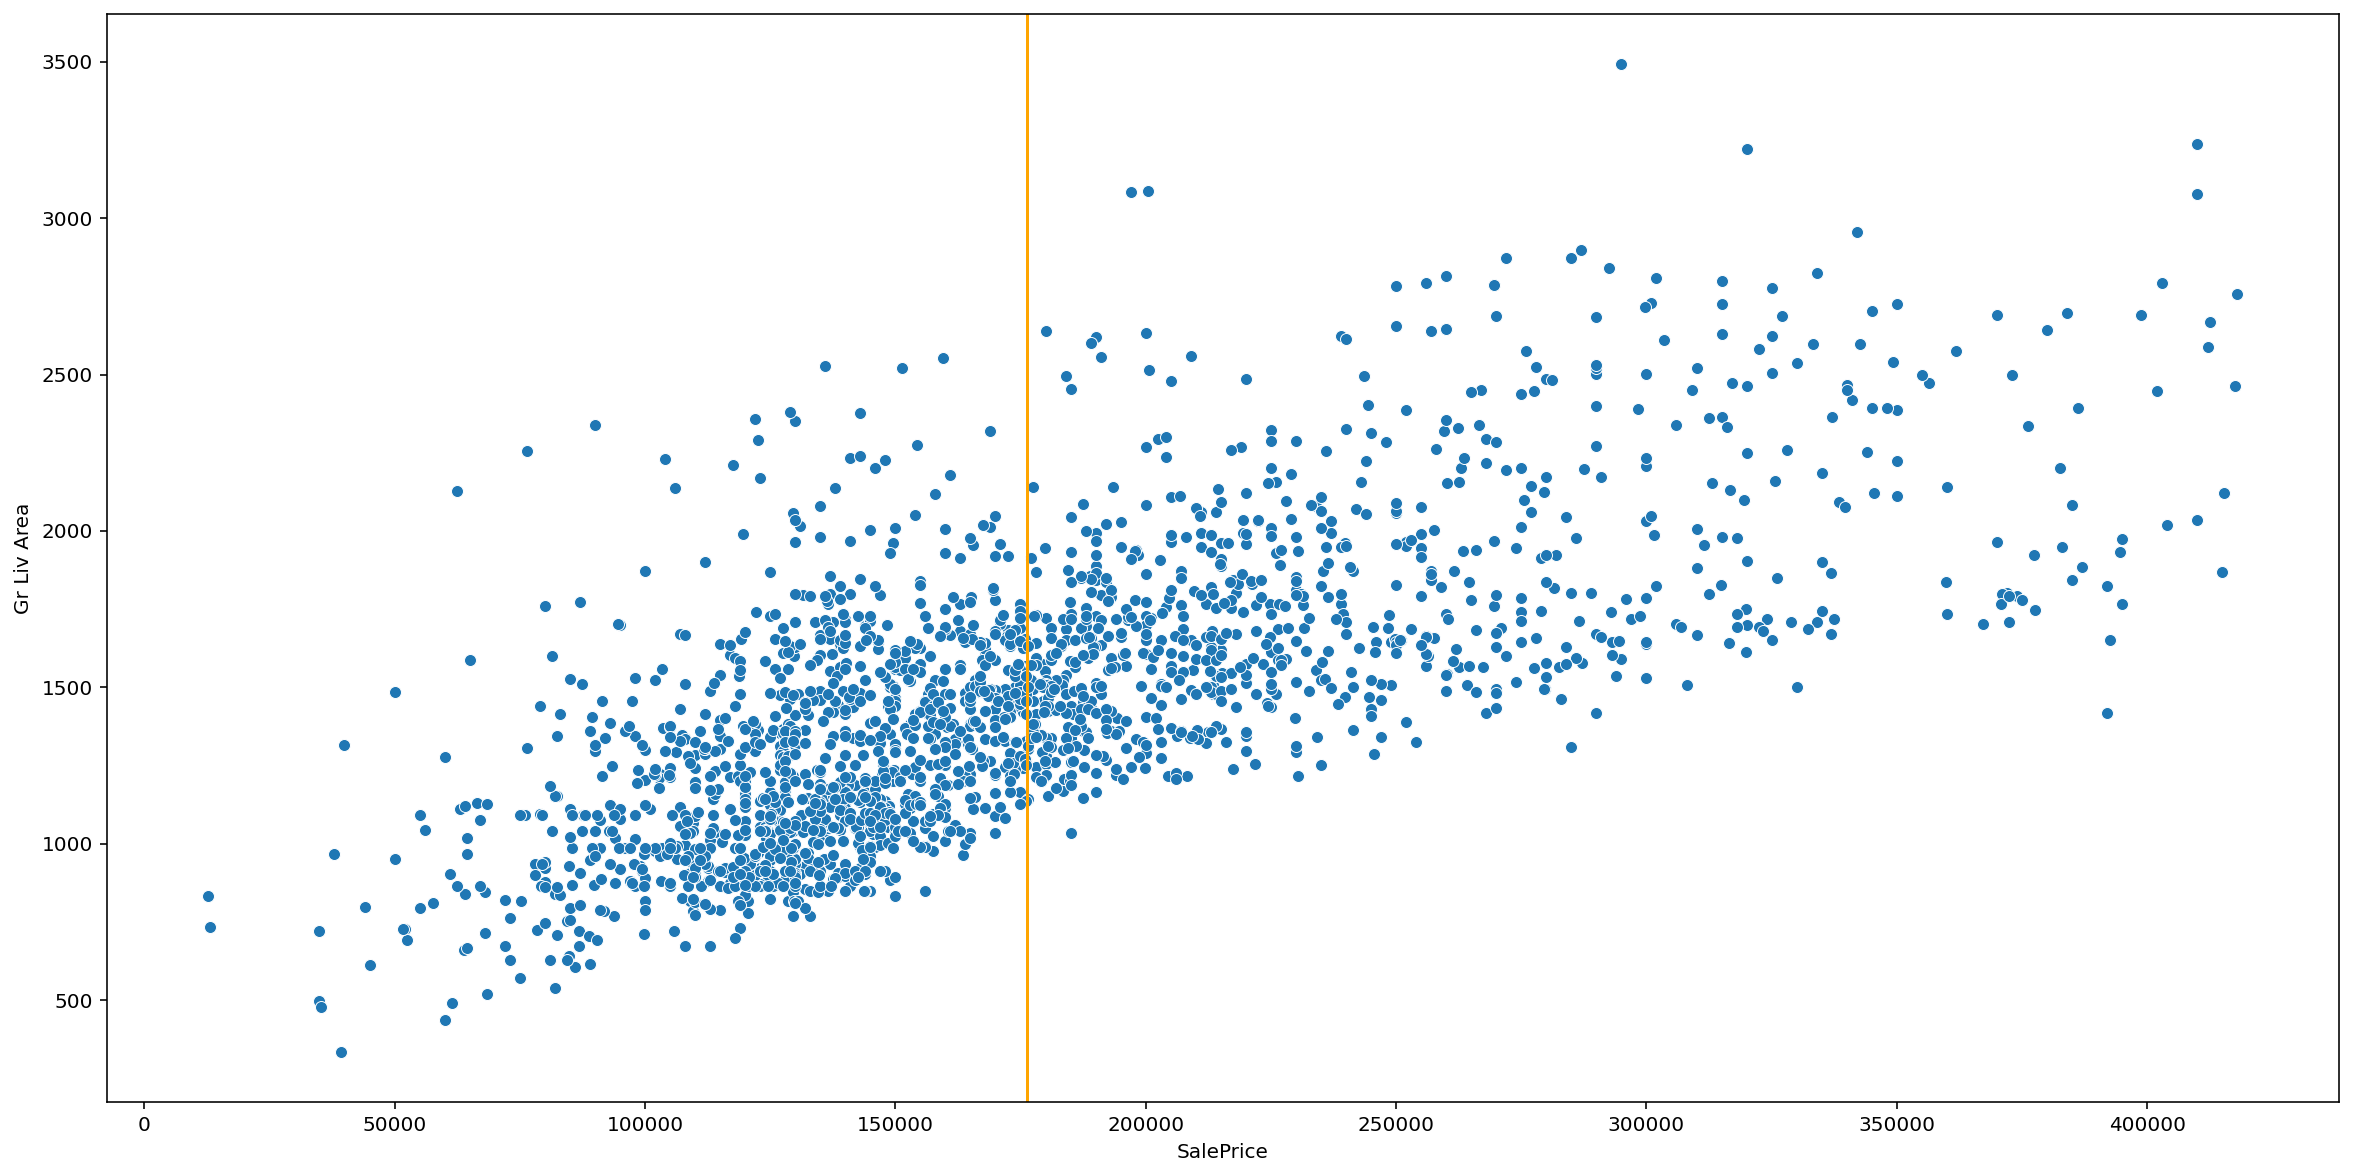

In [32]:
# Now looking at Gr Liv Area vs SalePrice
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Gr Liv Area")

/Users/as/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gr Liv Area'>

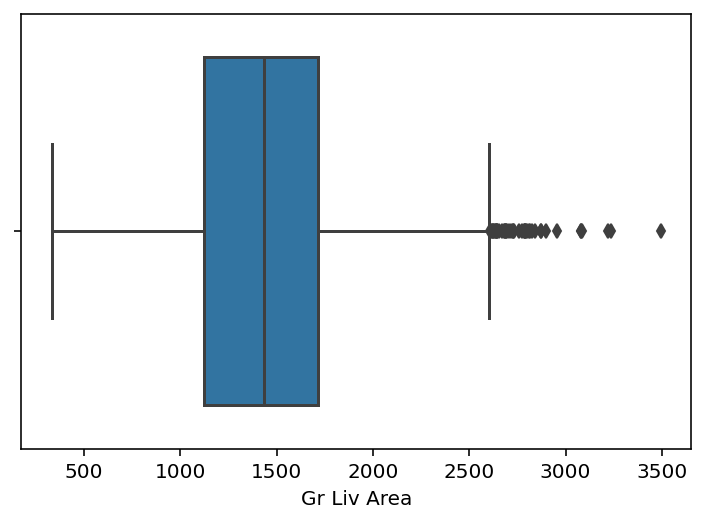

In [33]:
sns.boxplot(df_no_out['Gr Liv Area'])

array([[<AxesSubplot:title={'center':'Gr Liv Area'}>]], dtype=object)

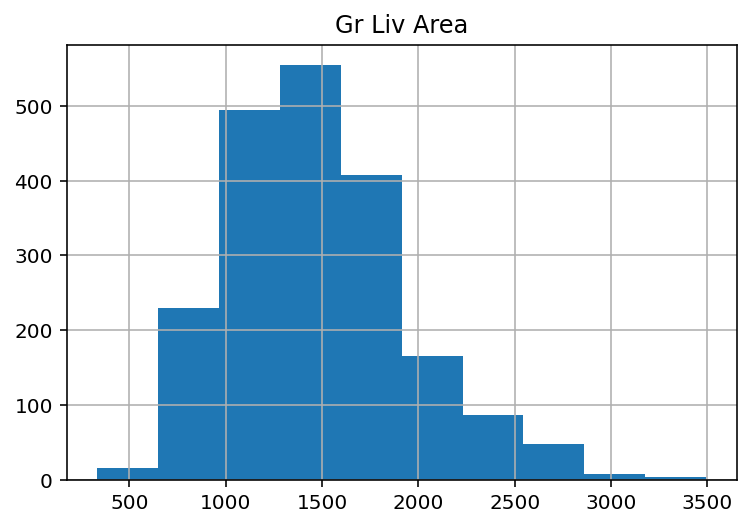

In [34]:
df_no_out.hist(column = "Gr Liv Area")

There are outliers as shown in the boxplot, with the histogram skewed right. I will implement 3xstd.dev to reduce the skew and some outliers.

In [35]:
df_no_out = df_no_out[(df_no_out["Gr Liv Area"] < np.mean(df["Gr Liv Area"]) + 3*np.std(df_no_out["Gr Liv Area"]))]

/Users/as/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gr Liv Area'>

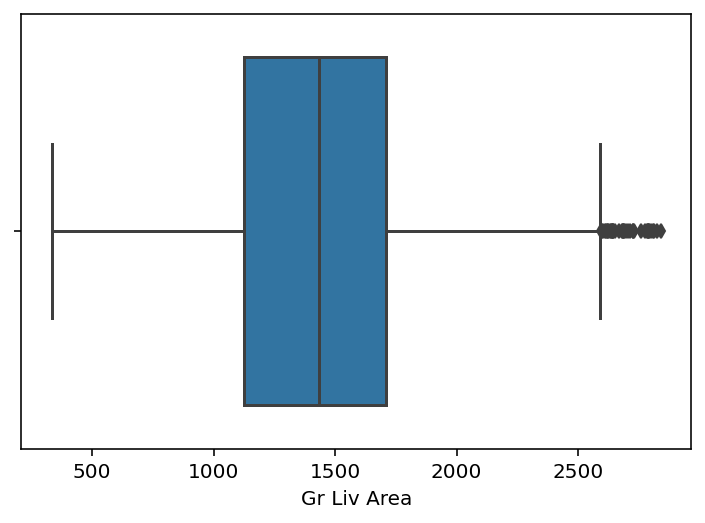

In [36]:
sns.boxplot(df_no_out['Gr Liv Area'])

array([[<AxesSubplot:title={'center':'Gr Liv Area'}>]], dtype=object)

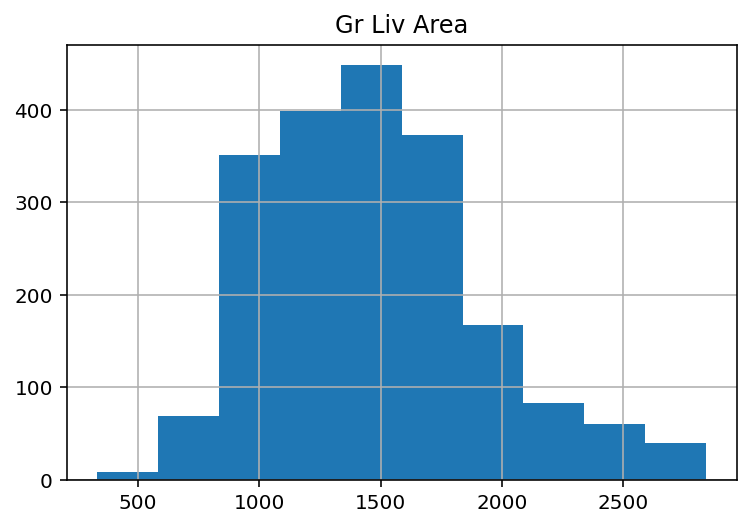

In [37]:
df_no_out.hist(column = "Gr Liv Area")

The outliers are now less separate and the liv area histogram looks better now, but with still with a slight skew to the right.

<AxesSubplot:xlabel='SalePrice', ylabel='Kitchen Qual'>

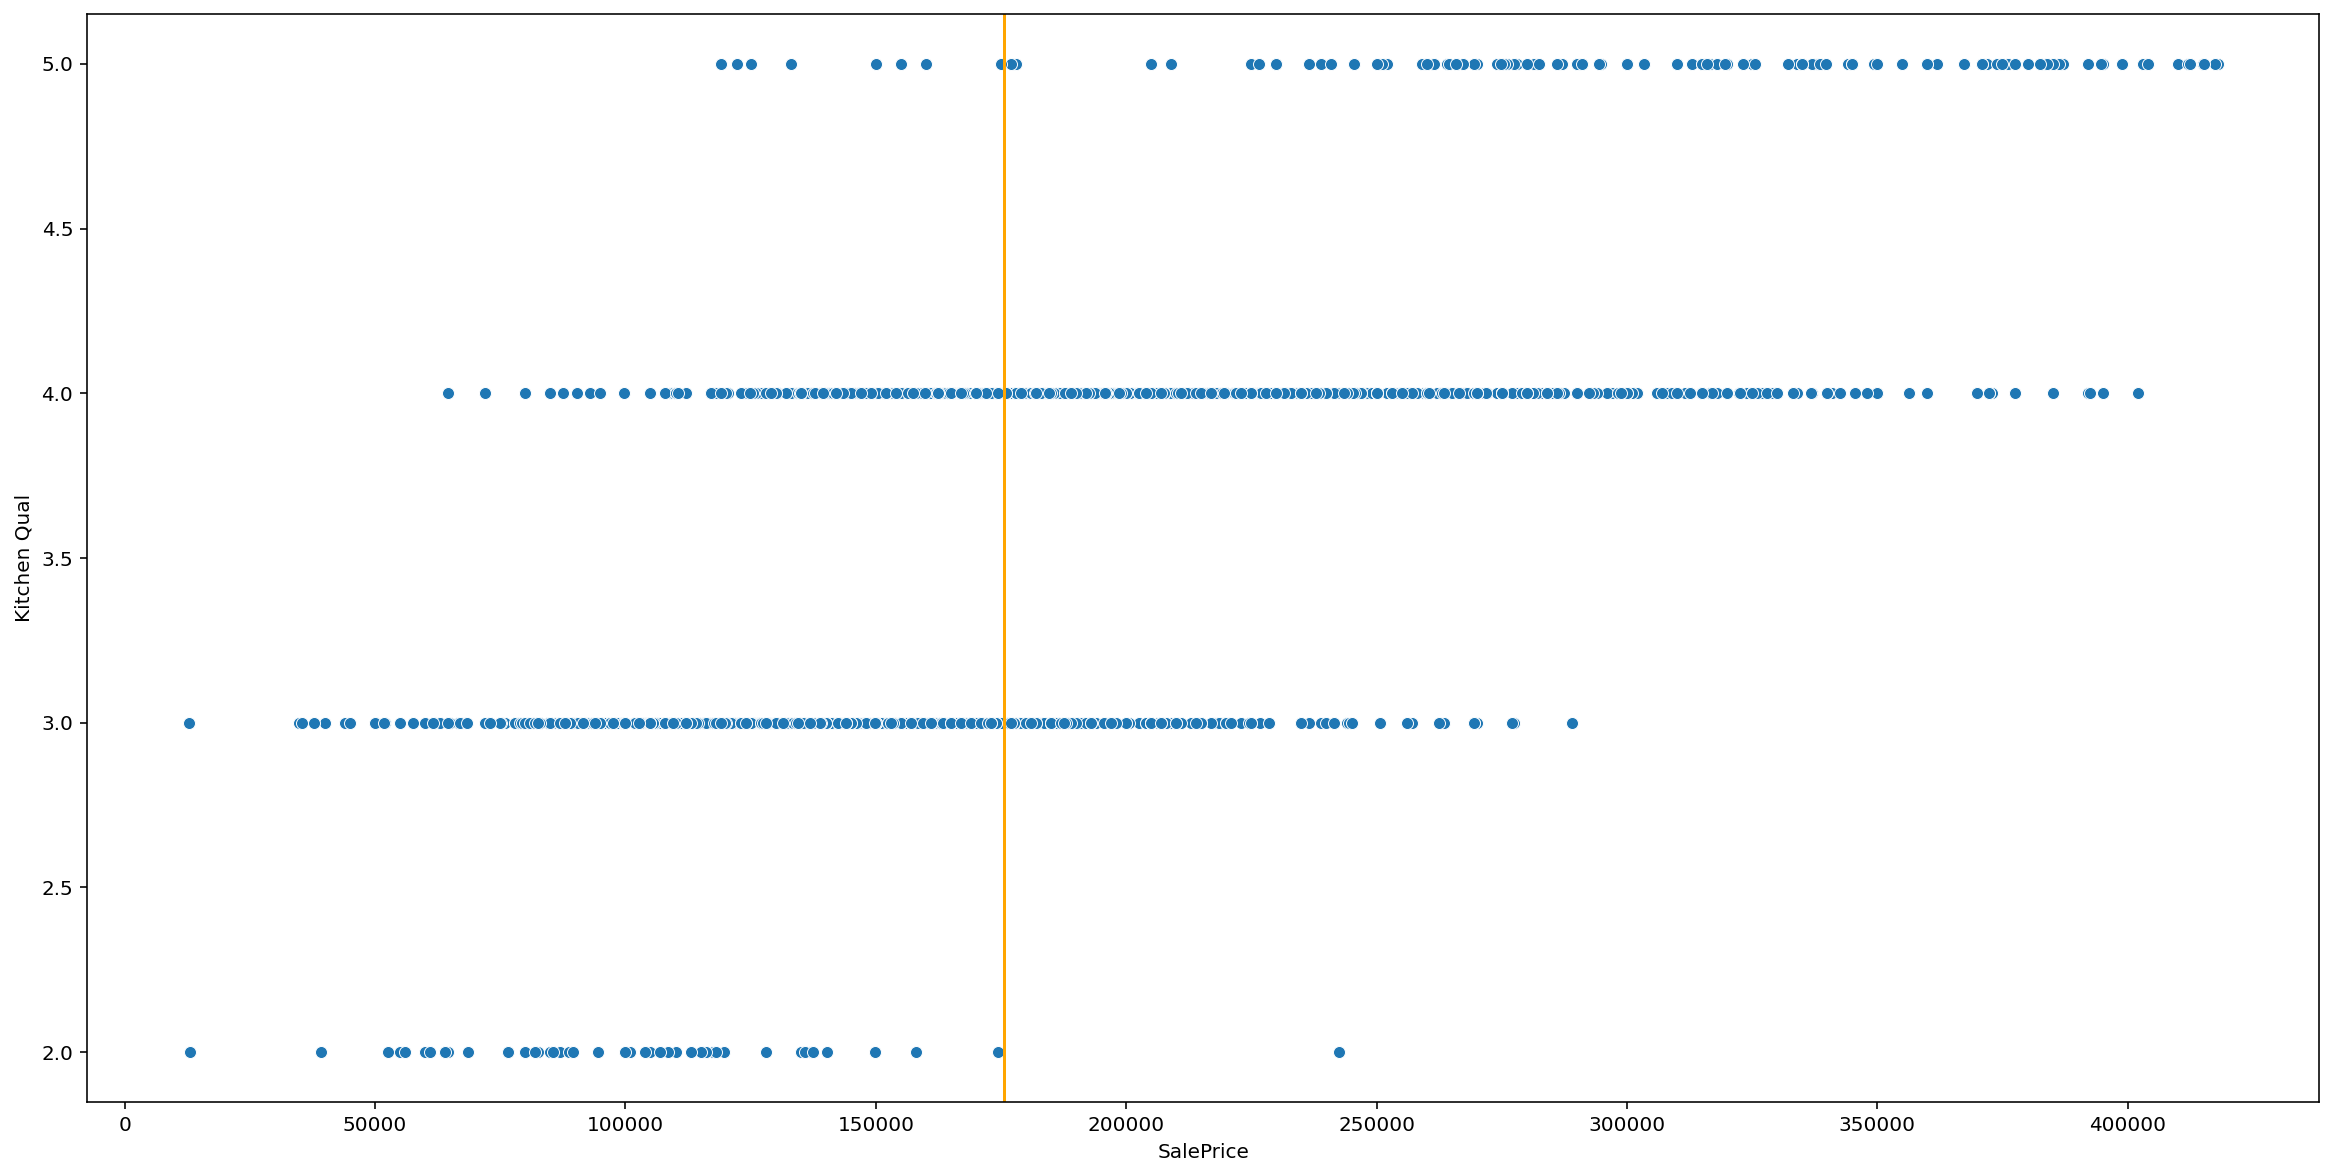

In [38]:
# now looking at kitchen quality
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Kitchen Qual")

There is one outlier at 2.0 kitchen quality at near $25,000.  


In [39]:
df_no_out.loc[(df_no_out['Kitchen Qual'] == 2) & (df_no_out['SalePrice'] > 225000)]

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  \
245  2886  913350030     23580          3          4           2   

     Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
245             6             6        1979            1979           0.0   

     Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
245           3           3        4.0        3.0              4   

     BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  \
245               6               1         1625.0           3           5   

     1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
245        1625           0                0         1625             0.0   

     Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
245             1.0          2          0              3              1   

     Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
245             2              6           8           1            3   

     Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond  \
245              3          2.0        576.0          3.0          3.0   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
245            3           136             28               0           0   

     Screen Porch  Pool Area Pool QC Fence  Misc Val  Mo Sold  Yr Sold  \
245             0          0    None  None         0        9     2006   

     Lot Frontage_zero_imputed  Lot Frontage_mean_imputed  \
245                       69.0                       69.0   

     Lot Frontage_Reg_imputed  MS SubClass_20  MS SubClass_30  MS SubClass_40  \
245                      69.0               1               0               0   

     MS SubClass_45  MS SubClass_50  MS SubClass_60  MS SubClass_70  \
245               0               0               0               0   

     MS SubClass_75  MS SubClass_80  MS SubClass_85  MS SubClass_90  \
245               0               0               0               0   

     MS SubClass_120  MS SubClass_150  MS SubClass_160  MS SubClass_180  \
245                0                0                0                0   

     MS SubClass_190  MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  \
245                0                  0                  0             0   

     MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  Street_Grvl  \
245                  0             0             1             0            0   

     Street_Pave  Alley_Grvl  Alley_None  Alley_Pave  Land Contour_Bnk  \
245            1           0           1           0                 0   

     Land Contour_HLS  Land Contour_Low  Land Contour_Lvl  Lot Config_Corner  \
245                 0                 0                 1                  0   

     Lot Config_CulDSac  Lot Config_FR2  Lot Config_FR3  Lot Config_Inside  \
245                   0               0               0                  1   

     Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
245                     0                     0                    0   

     Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
245                     0                     0                     0   

     Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
245                     0                     0                     0   

     Neighborhood_Greens  Neighborhood_GrnHill  Neighborhood_IDOTRR  \
245                    0                     0                    0   

     Neighborhood_Landmrk  Neighborhood_MeadowV  Neighborhood_Mitchel  \
245                     0                     0                     1   

     Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
245                   0                     0                    0   

     Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
245                     0                     0                   

In [40]:
df_kit_q = df_no_out.loc[(df_no_out['Kitchen Qual'] == 2)]
df_kit_q.describe()

Id           PID      Lot Area  Lot Shape  Utilities  \
count    46.000000  4.600000e+01     46.000000  46.000000       46.0   
mean   1529.195652  8.417392e+08   8912.456522   3.782609        4.0   
std     942.643461  1.423703e+08   4010.995879   0.417029        0.0   
min     131.000000  5.344501e+08   4118.000000   3.000000        4.0   
25%     745.500000  9.023283e+08   6010.000000   4.000000        4.0   
50%    1502.000000  9.037792e+08   8084.000000   4.000000        4.0   
75%    2589.000000  9.091008e+08  10747.500000   4.000000        4.0   
max    2886.000000  9.133500e+08  23580.000000   4.000000        4.0   

       Land Slope  Overall Qual  Overall Cond   Year Built  Year Remod/Add  \
count   46.000000     46.000000     46.000000    46.000000       46.000000   
mean     2.804348      4.239130      5.043478  1933.521739     1959.565217   
std      0.499758      1.336409      1.685975    18.945230       17.339297   
min      1.000000      1.000000      1.000000  1880.000000     1950.000000   
25%      3.000000      4.000000      4.000000  1920.000000     1950.000000   
50%      3.000000      4.000000      5.000000  1934.000000     1950.000000   
75%      3.000000      5.000000      6.000000  1946.750000     1958.750000   
max      3.000000      7.000000      9.000000  1979.000000     2005.000000   

       Mas Vnr Area  Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  \
count     46.000000   46.000000   46.000000  46.000000  46.000000   
mean      22.304348    2.804348    2.804348   2.630435   2.413043   
std       62.651370    0.401085    0.653863   1.061628   1.001689   
min        0.000000    2.000000    1.000000   0.000000   0.000000   
25%        0.000000    3.000000    3.000000   2.250000   2.000000   
50%        0.000000    3.000000    3.000000   3.000000   3.000000   
75%        0.000000    3.000000    3.000000   3.000000   3.000000   
max      270.000000    3.000000    4.000000   4.000000   3.000000   

       Bsmt Exposure  BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  \
count      46.000000       46.000000       46.000000      46.000000   
mean        1.195652        1.869565        0.934783     734.282609   
std         0.859446        1.514503        0.442326     385.089465   
min         0.000000        0.000000        0.000000       0.000000   
25%         1.000000        1.000000        1.000000     532.500000   
50%         1.000000        1.000000        1.000000     736.000000   
75%         1.000000        3.000000        1.000000    1002.000000   
max         4.000000        6.000000        3.000000    1625.000000   

       Heating QC  Electrical   1st Flr SF   2nd Flr SF  Low Qual Fin SF  \
count   46.000000   46.000000    46.000000    46.000000        46.000000   
mean     3.217391    4.304348   921.065217   257.782609        11.152174   
std      1.133589    0.915777   285.629706   348.923482        75.637724   
min      1.000000    2.000000   334.000000     0.000000         0.000000   
25%      2.000000    4.000000   714.250000     0.000000         0.000000   
50%      3.000000    5.000000   945.000000     0.000000         0.000000   
75%      4.000000    5.000000  1054.500000   535.250000         0.000000   
max      5.000000    5.000000  1625.000000  1128.000000       513.000000   

       Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
count    46.000000       46.000000       46.000000  46.000000  46.000000   
mean   1190.000000        0.195652        0.086957   1.239130   0.152174   
std     446.920425        0.401085        0.284885   0.480036   0.419915   
min     334.000000        0.000000        0.000000   0.000000   0.000000   
25%     869.750000        0.000000        0.000000   1.000000   0.000000   
50%    1136.000000        0.000000        0.000000   1.000000   0.000000   
75%    1525.250000        0.000000        0.000000   1.750000   0.000000   
max    2256.000000        1.000000        1.000000   2.000000   2.000000   

       Bedroom AbvGr  Kitchen Ab

As kitchen quality is a relatively important correlation factor to saleprice, and this unit's data will affect the model's prediction and thus will be removed.

In [41]:
df_no_out.drop([245], inplace = True)

<AxesSubplot:xlabel='SalePrice', ylabel='Kitchen Qual'>

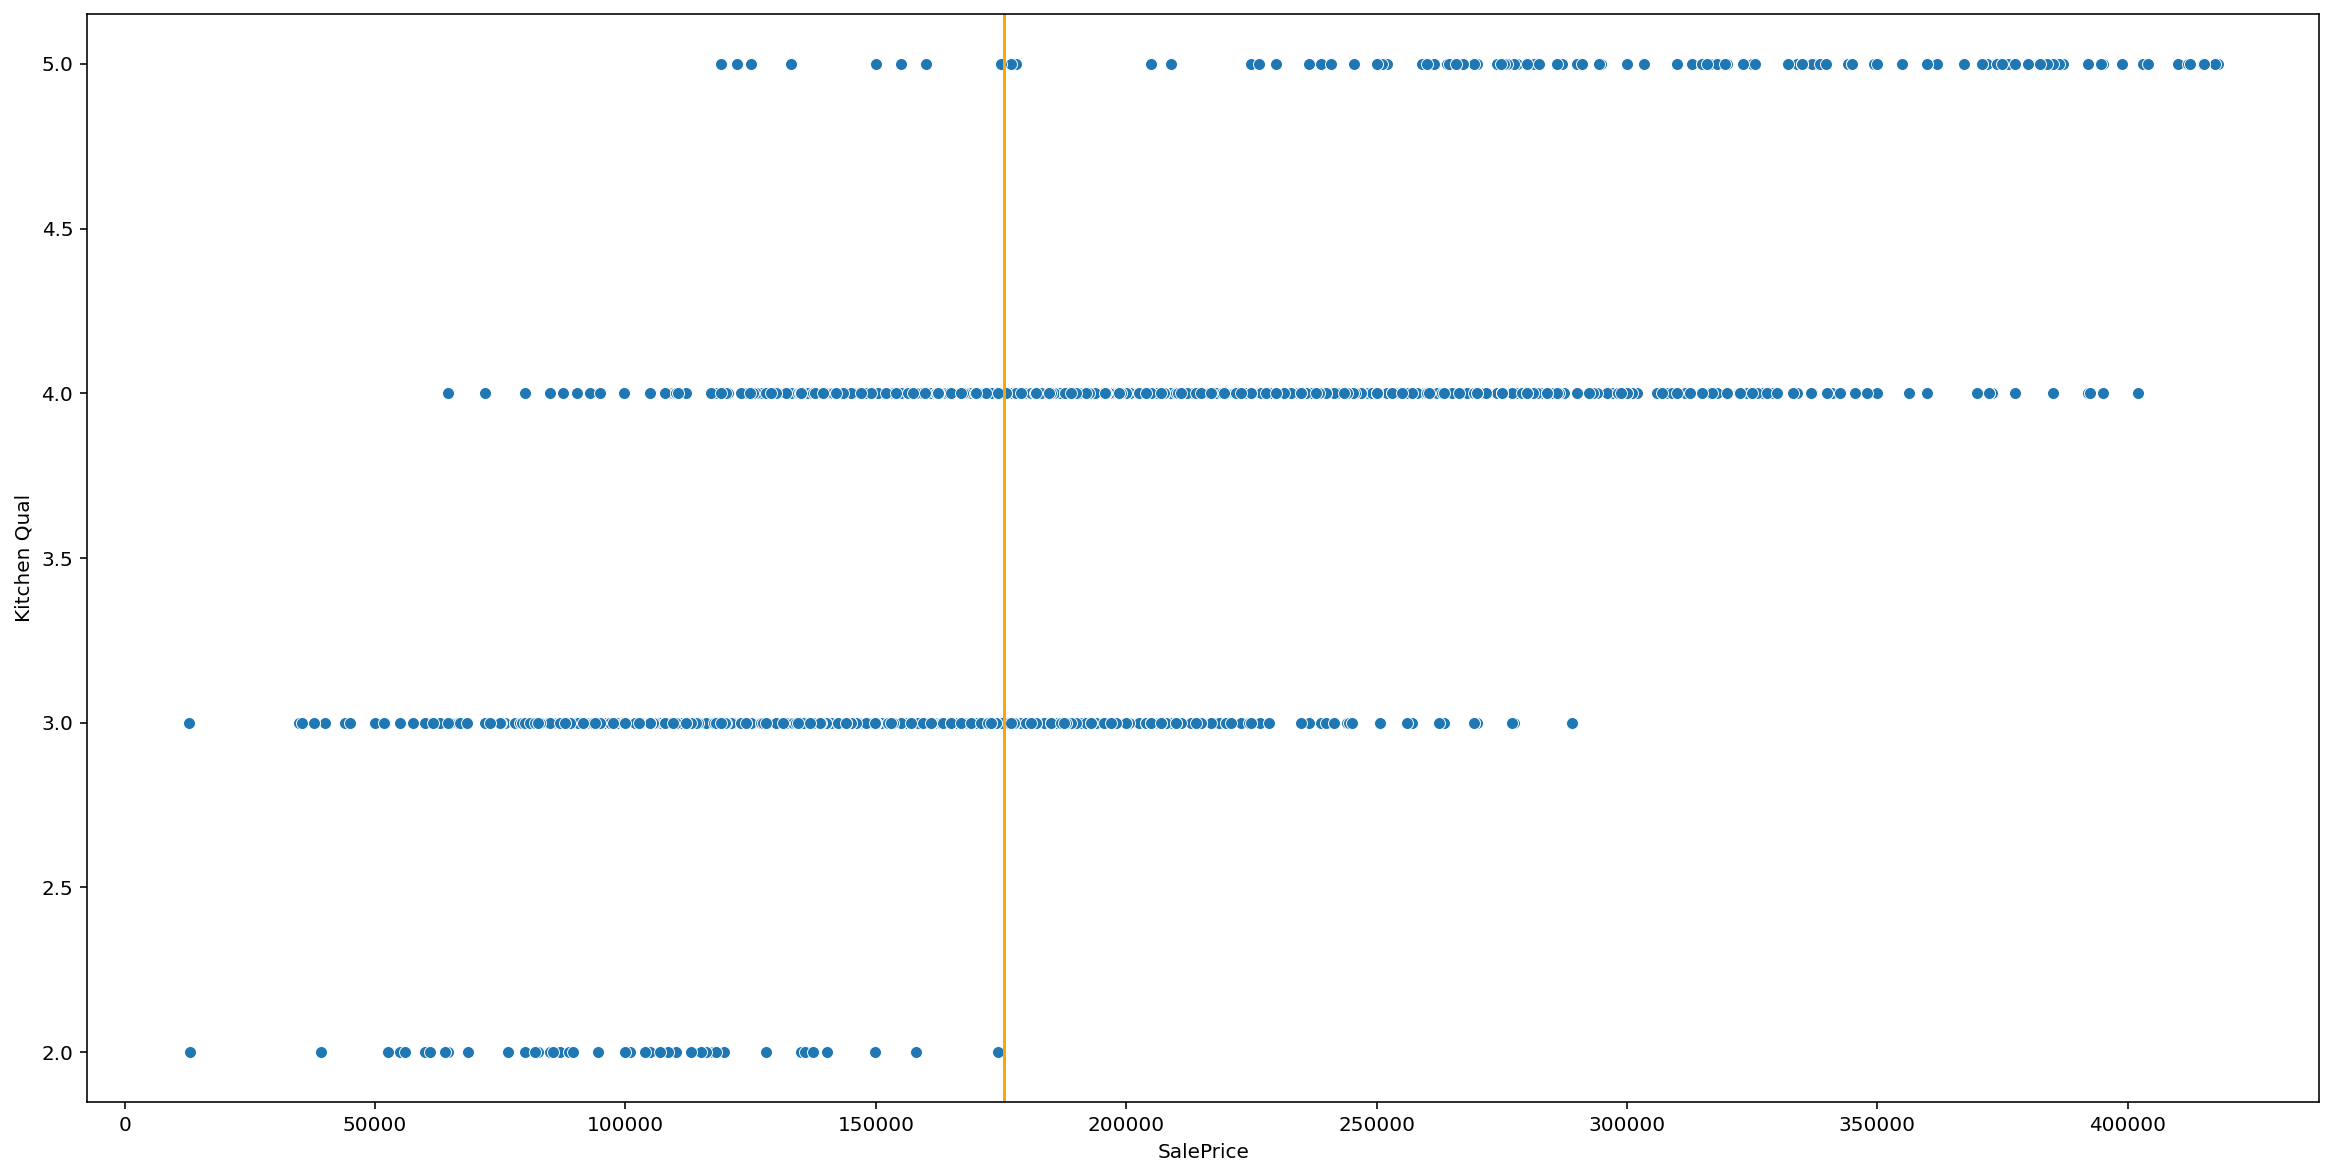

In [42]:
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Kitchen Qual")

Outlier removed

<AxesSubplot:xlabel='SalePrice', ylabel='Garage Area'>

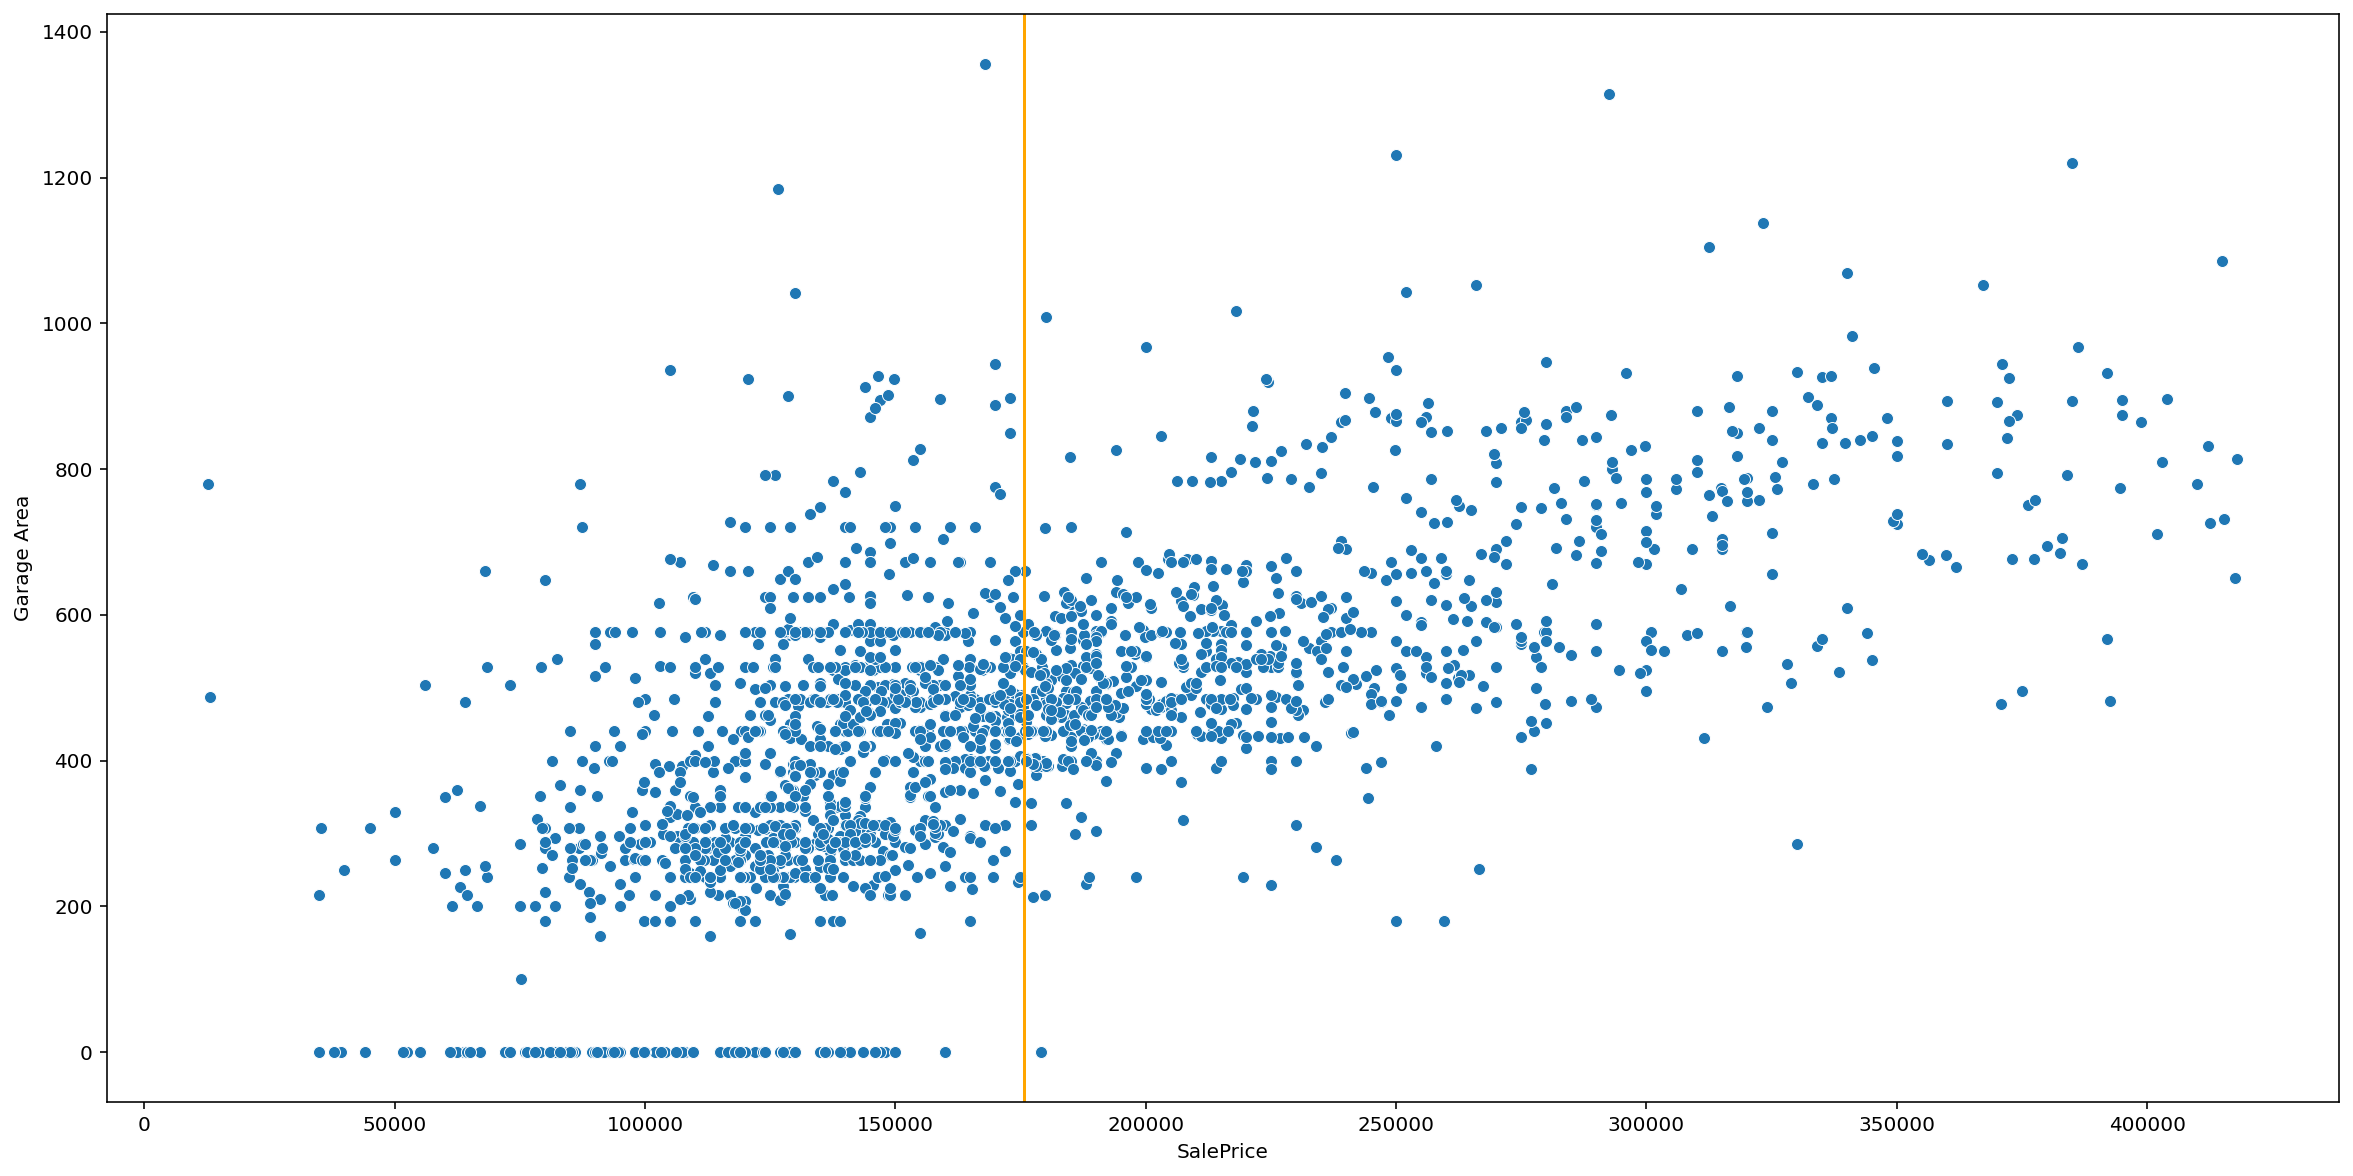

In [43]:
# now looking at garage area
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Garage Area")

Can't really see any outliers.

/Users/as/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Garage Area'>

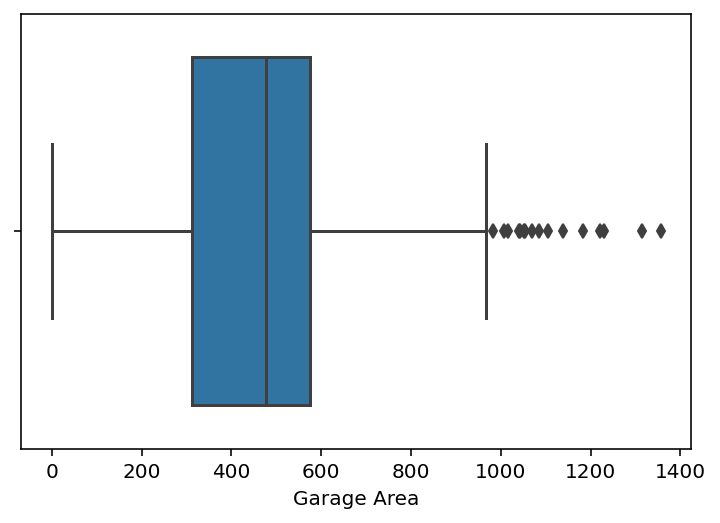

In [44]:
sns.boxplot(df_no_out['Garage Area'])

From the box plot, we can see that there are many outliers. As such 3x std dev will be applied.

In [45]:
df_no_out = df_no_out[(df_no_out["Garage Area"] < np.mean(df["Garage Area"]) + 3*np.std(df_no_out["Garage Area"]))]

/Users/as/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Garage Area'>

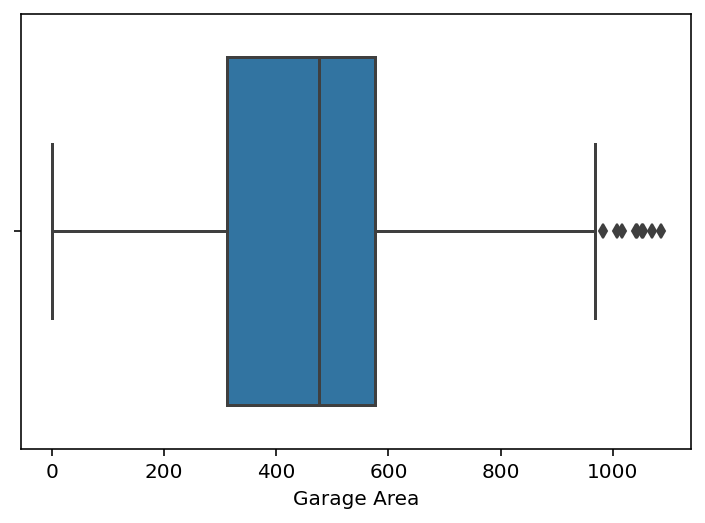

In [46]:
sns.boxplot(df_no_out['Garage Area'])

About half of the outliers have been removed. If needed, more aggresive removal will be done again.

<AxesSubplot:xlabel='SalePrice', ylabel='Garage Cars'>

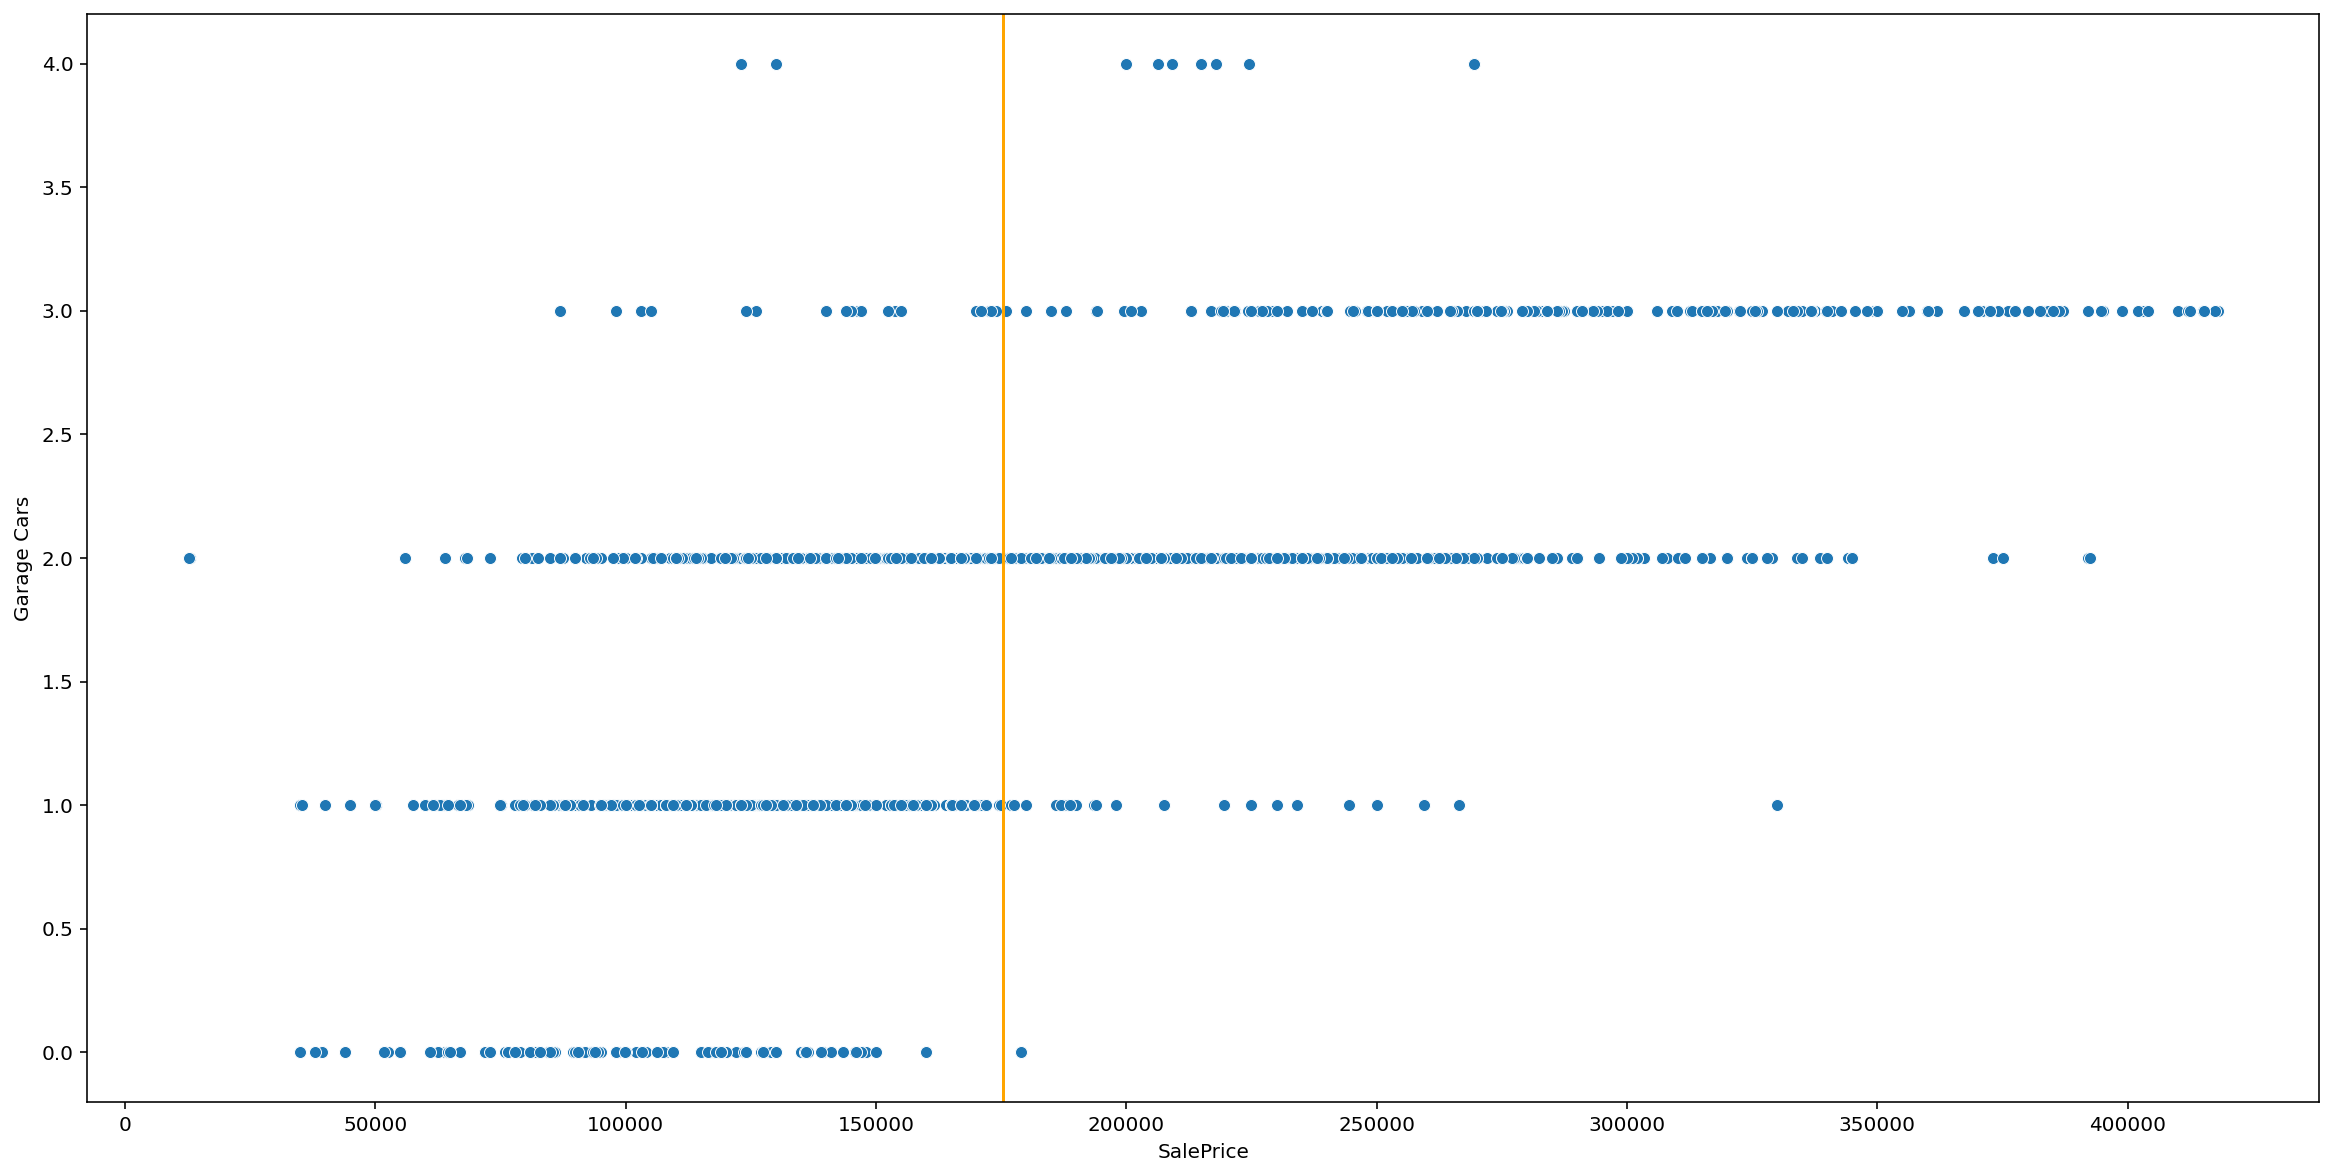

In [47]:
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Garage Cars")

As garage cars and garage size are highly correlated (0.89), their outliers seem to be similar, located above 350000.
Since there is such a high correlation, the garage cars column should be dropped. So as not to let 2 variable of high correlation affect the model's coefficient weightage.  
However, the scatterplot looks clean save for 1 outlier at size 1.0 and 1 at size 2.0 and 2 at 4.0
These will be removed.

In [48]:
df_no_out.loc[(df_no_out['Garage Cars'] == 1) & (df_no_out['SalePrice'] > 300000)]

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  \
463  2257  916253320      9763          3          4           3   

     Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
463             7             5        1998            1998         239.0   

     Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
463           4           3        4.0        3.0              1   

     BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  \
463               6               5         1502.0           5           5   

     1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
463        1502           0                0         1502             1.0   

     Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
463             0.0          1          1              1              1   

     Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
463             4              5           8           1            3   

     Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond  \
463              3          1.0        286.0          3.0          3.0   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
463            3             0              0               0           0   

     Screen Porch  Pool Area Pool QC Fence  Misc Val  Mo Sold  Yr Sold  \
463             0          0    None  None         0        9     2007   

     Lot Frontage_zero_imputed  Lot Frontage_mean_imputed  \
463                        0.0                       69.1   

     Lot Frontage_Reg_imputed  MS SubClass_20  MS SubClass_30  MS SubClass_40  \
463                 69.070483               0               0               0   

     MS SubClass_45  MS SubClass_50  MS SubClass_60  MS SubClass_70  \
463               0               0               0               0   

     MS SubClass_75  MS SubClass_80  MS SubClass_85  MS SubClass_90  \
463               0               0               0               0   

     MS SubClass_120  MS SubClass_150  MS SubClass_160  MS SubClass_180  \
463                1                0                0                0   

     MS SubClass_190  MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  \
463                0                  0                  0             0   

     MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  Street_Grvl  \
463                  0             0             0             1            0   

     Street_Pave  Alley_Grvl  Alley_None  Alley_Pave  Land Contour_Bnk  \
463            1           0           1           0                 0   

     Land Contour_HLS  Land Contour_Low  Land Contour_Lvl  Lot Config_Corner  \
463                 0                 0                 1                  0   

     Lot Config_CulDSac  Lot Config_FR2  Lot Config_FR3  Lot Config_Inside  \
463                   0               0               0                  1   

     Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
463                     0                     0                    0   

     Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
463                     0                     0                     0   

     Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
463                     0                     0                     0   

     Neighborhood_Greens  Neighborhood_GrnHill  Neighborhood_IDOTRR  \
463                    0                     1                    0   

     Neighborhood_Landmrk  Neighborhood_MeadowV  Neighborhood_Mitchel  \
463                     0                     0                     0   

     Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
463                   0                     0                    0   

     Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
463                     0                     0                   

In [49]:
df_no_out.loc[(df_no_out['Garage Cars'] == 2) & (df_no_out['SalePrice'] < 40000)]

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  \
183   1554  910251050     14584          4          4           2   
1626   182  902207130      9656          4          4           3   

      Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
183              1             5        1952            1952           0.0   
1626             2             2        1923            1970           0.0   

      Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
183            2           1        0.0        0.0              0   
1626           3           2        2.0        2.0              1   

      BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  \
183                0               0            0.0           1           4   
1626               1               1          678.0           3           5   

      1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
183          733           0                0          733             0.0   
1626         832           0                0          832             0.0   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
183              0.0          1          0              2              1   
1626             0.0          1          0              2              1   

      Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
183              2              4           1           0         None   
1626             3              5           8           1            4   

      Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond  \
183               1          2.0        487.0          2.0          1.0   
1626              1          2.0        780.0          2.0          2.0   

      Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
183             1             0              0               0           0   
1626            1             0              0               0           0   

      Screen Porch  Pool Area Pool QC Fence  Misc Val  Mo Sold  Yr Sold  \
183              0          0    None  None         0        2     2008   
1626             0          0    None  None         0        6     2010   

      Lot Frontage_zero_imputed  Lot Frontage_mean_imputed  \
183                        80.0                       80.0   
1626                       68.0                       68.0   

      Lot Frontage_Reg_imputed  MS SubClass_20  MS SubClass_30  \
183                       80.0               1               0   
1626                      68.0               0               1   

      MS SubClass_40  MS SubClass_45  MS SubClass_50  MS SubClass_60  \
183                0               0               0               0   
1626               0               0               0               0   

      MS SubClass_70  MS SubClass_75  MS SubClass_80  MS SubClass_85  \
183                0               0               0               0   
1626               0               0               0               0   

      MS SubClass_90  MS SubClass_120  MS SubClass_150  MS SubClass_160  \
183                0                0                0                0   
1626               0                0                0                0   

      MS SubClass_180  MS SubClass_190  MS Zoning_A (agr)  MS Zoning_C (all)  \
183                 0                0                  1                  0   
1626                0                0                  0                  0   

      MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  \
183              0                  0             0             0   
1626             0                  0             0             0   

      MS Zoning_RM  Street_Grvl  Street_Pave  Alley_Grvl  Alley_None  \
183              0            0            1           0           1   
1626             1            0            1           0           1   

      Alley_Pave  Land Contour_Bn

In [50]:
df_no_out.loc[(df_no_out['Garage Cars'] == 4) & (df_no_out['SalePrice'] < 150000)]

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  \
554   1669  527404140      8294          4          4           3   
1872  2279  923202220     43500          4          4           3   

      Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
554              4             5        1971            1971           0.0   
1872             3             5        1953            1953           0.0   

      Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
554            3           3        3.0        3.0              1   
1872           3           3        0.0        0.0              0   

      BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  \
554                1               1          858.0           3           5   
1872               0               0            0.0           5           5   

      1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
554          872           0                0          872             0.0   
1872        2034           0                0         2034             0.0   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
554              0.0          1          0              3              1   
1872             0.0          1          0              2              1   

      Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
554              3              5           8           0         None   
1872             3              9           7           0         None   

      Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond  \
554               1          4.0        480.0          3.0          3.0   
1872              2          4.0       1041.0          3.0          3.0   

      Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
554             3             0              0               0           0   
1872            1           483            266               0           0   

      Screen Porch  Pool Area Pool QC Fence  Misc Val  Mo Sold  Yr Sold  \
554              0          0    None     2         0        6     2007   
1872             0        561       3     4         0        6     2007   

      Lot Frontage_zero_imputed  Lot Frontage_mean_imputed  \
554                        70.0                       70.0   
1872                      200.0                      200.0   

      Lot Frontage_Reg_imputed  MS SubClass_20  MS SubClass_30  \
554                       70.0               1               0   
1872                     200.0               1               0   

      MS SubClass_40  MS SubClass_45  MS SubClass_50  MS SubClass_60  \
554                0               0               0               0   
1872               0               0               0               0   

      MS SubClass_70  MS SubClass_75  MS SubClass_80  MS SubClass_85  \
554                0               0               0               0   
1872               0               0               0               0   

      MS SubClass_90  MS SubClass_120  MS SubClass_150  MS SubClass_160  \
554                0                0                0                0   
1872               0                0                0                0   

      MS SubClass_180  MS SubClass_190  MS Zoning_A (agr)  MS Zoning_C (all)  \
554                 0                0                  0                  0   
1872                0                0                  0                  0   

      MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  \
554              0                  0             0             1   
1872             0                  0             0             1   

      MS Zoning_RM  Street_Grvl  Street_Pave  Alley_Grvl  Alley_None  \
554              0            0            1           0           1   
1872             0            0            1           0           1   

      Alley_Pave  Land Contour_Bn

In [51]:
df_no_out.drop([463, 183, 1626, 554, 1872], inplace = True)

<AxesSubplot:xlabel='SalePrice', ylabel='Garage Cars'>

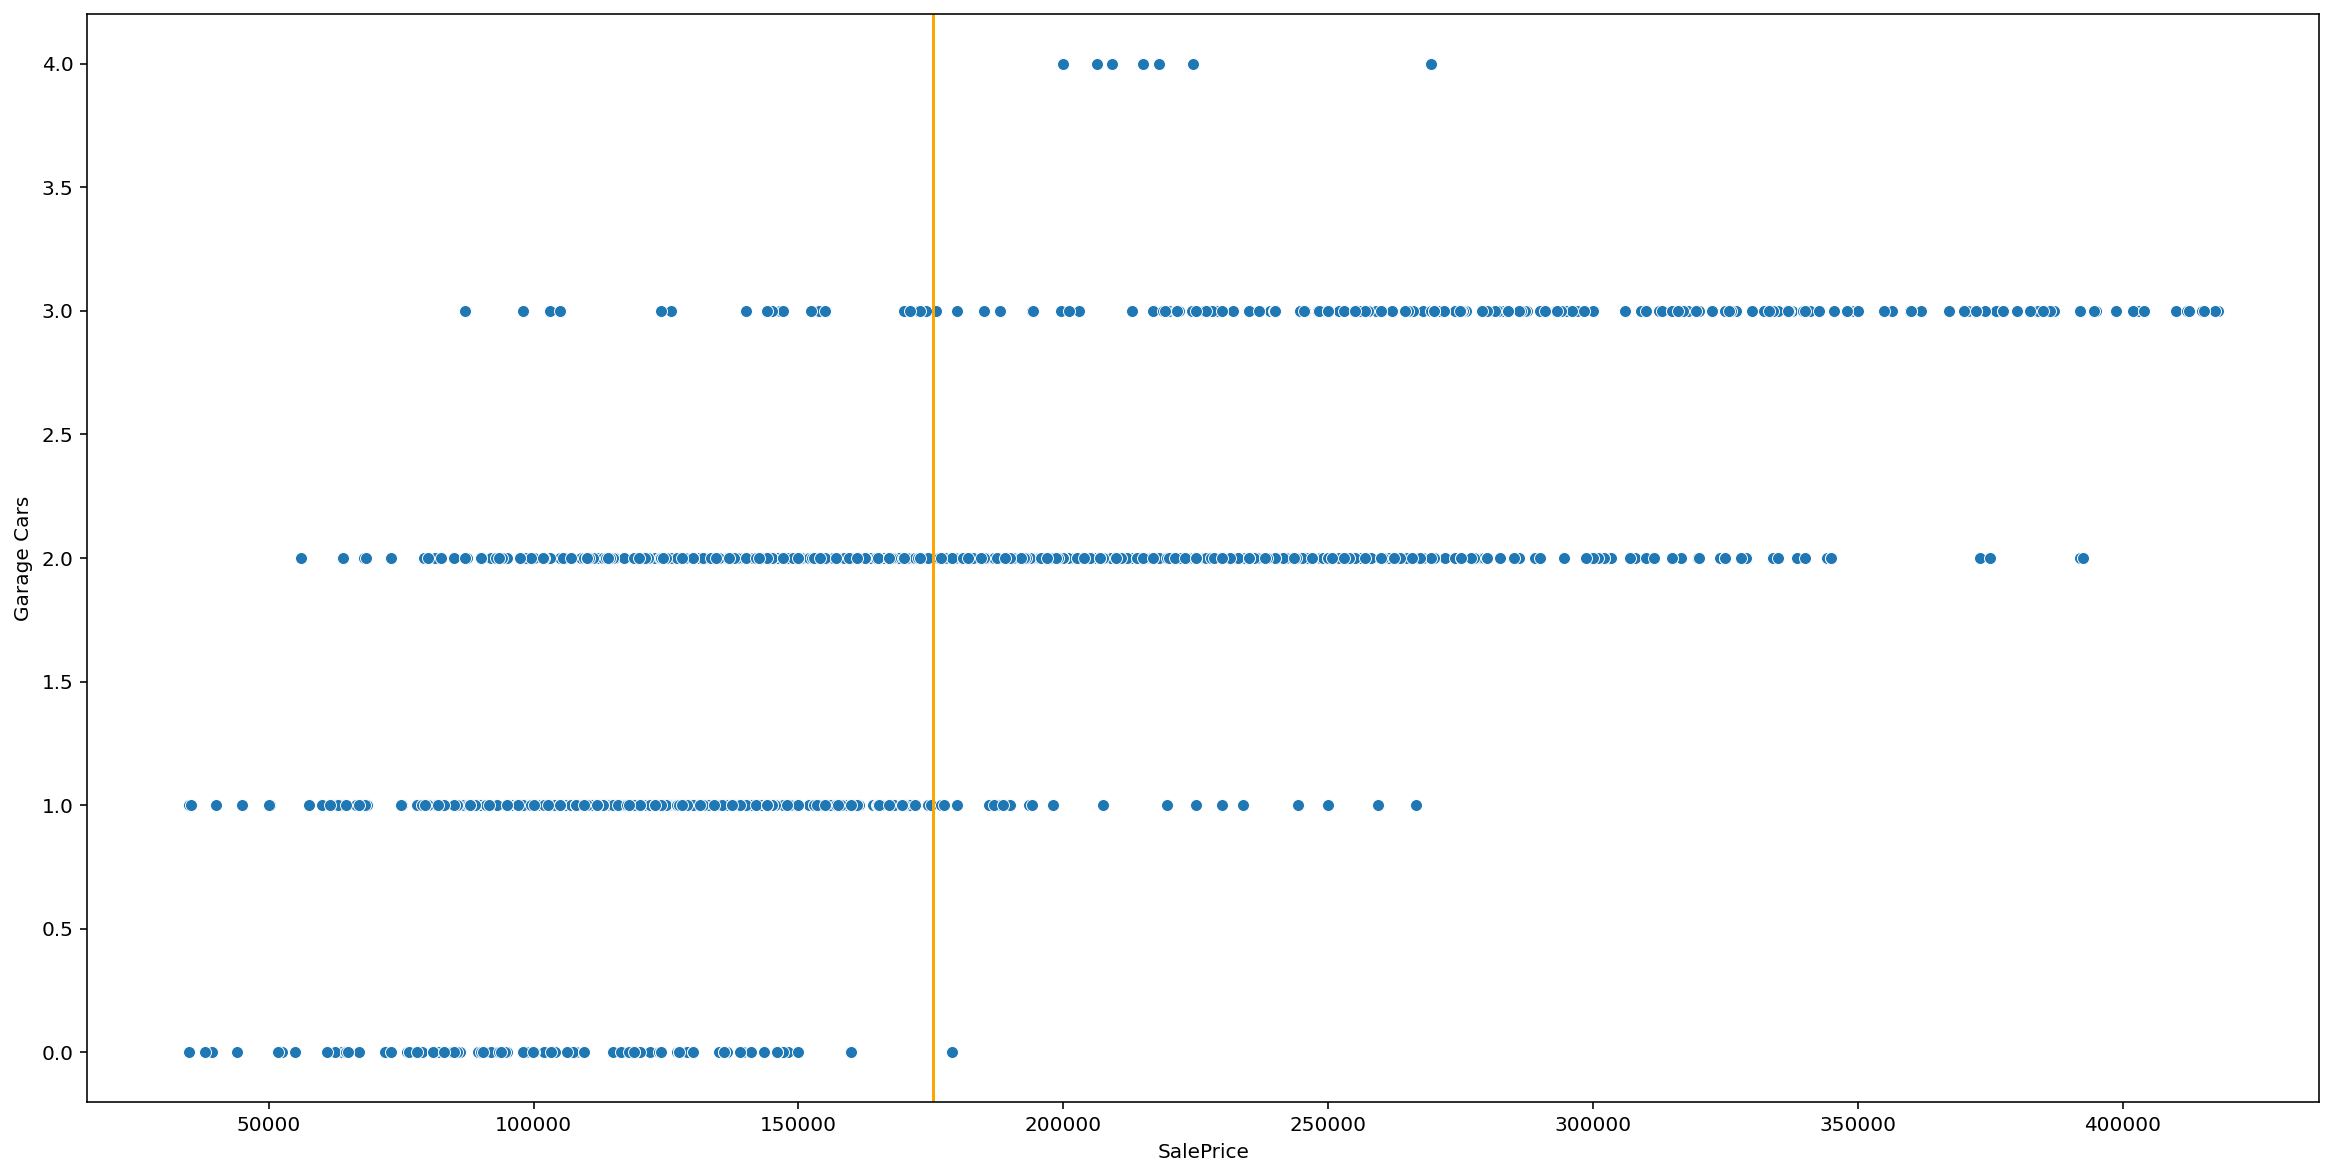

In [52]:
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Garage Cars")

Outliers removed.

<AxesSubplot:xlabel='SalePrice', ylabel='psf'>

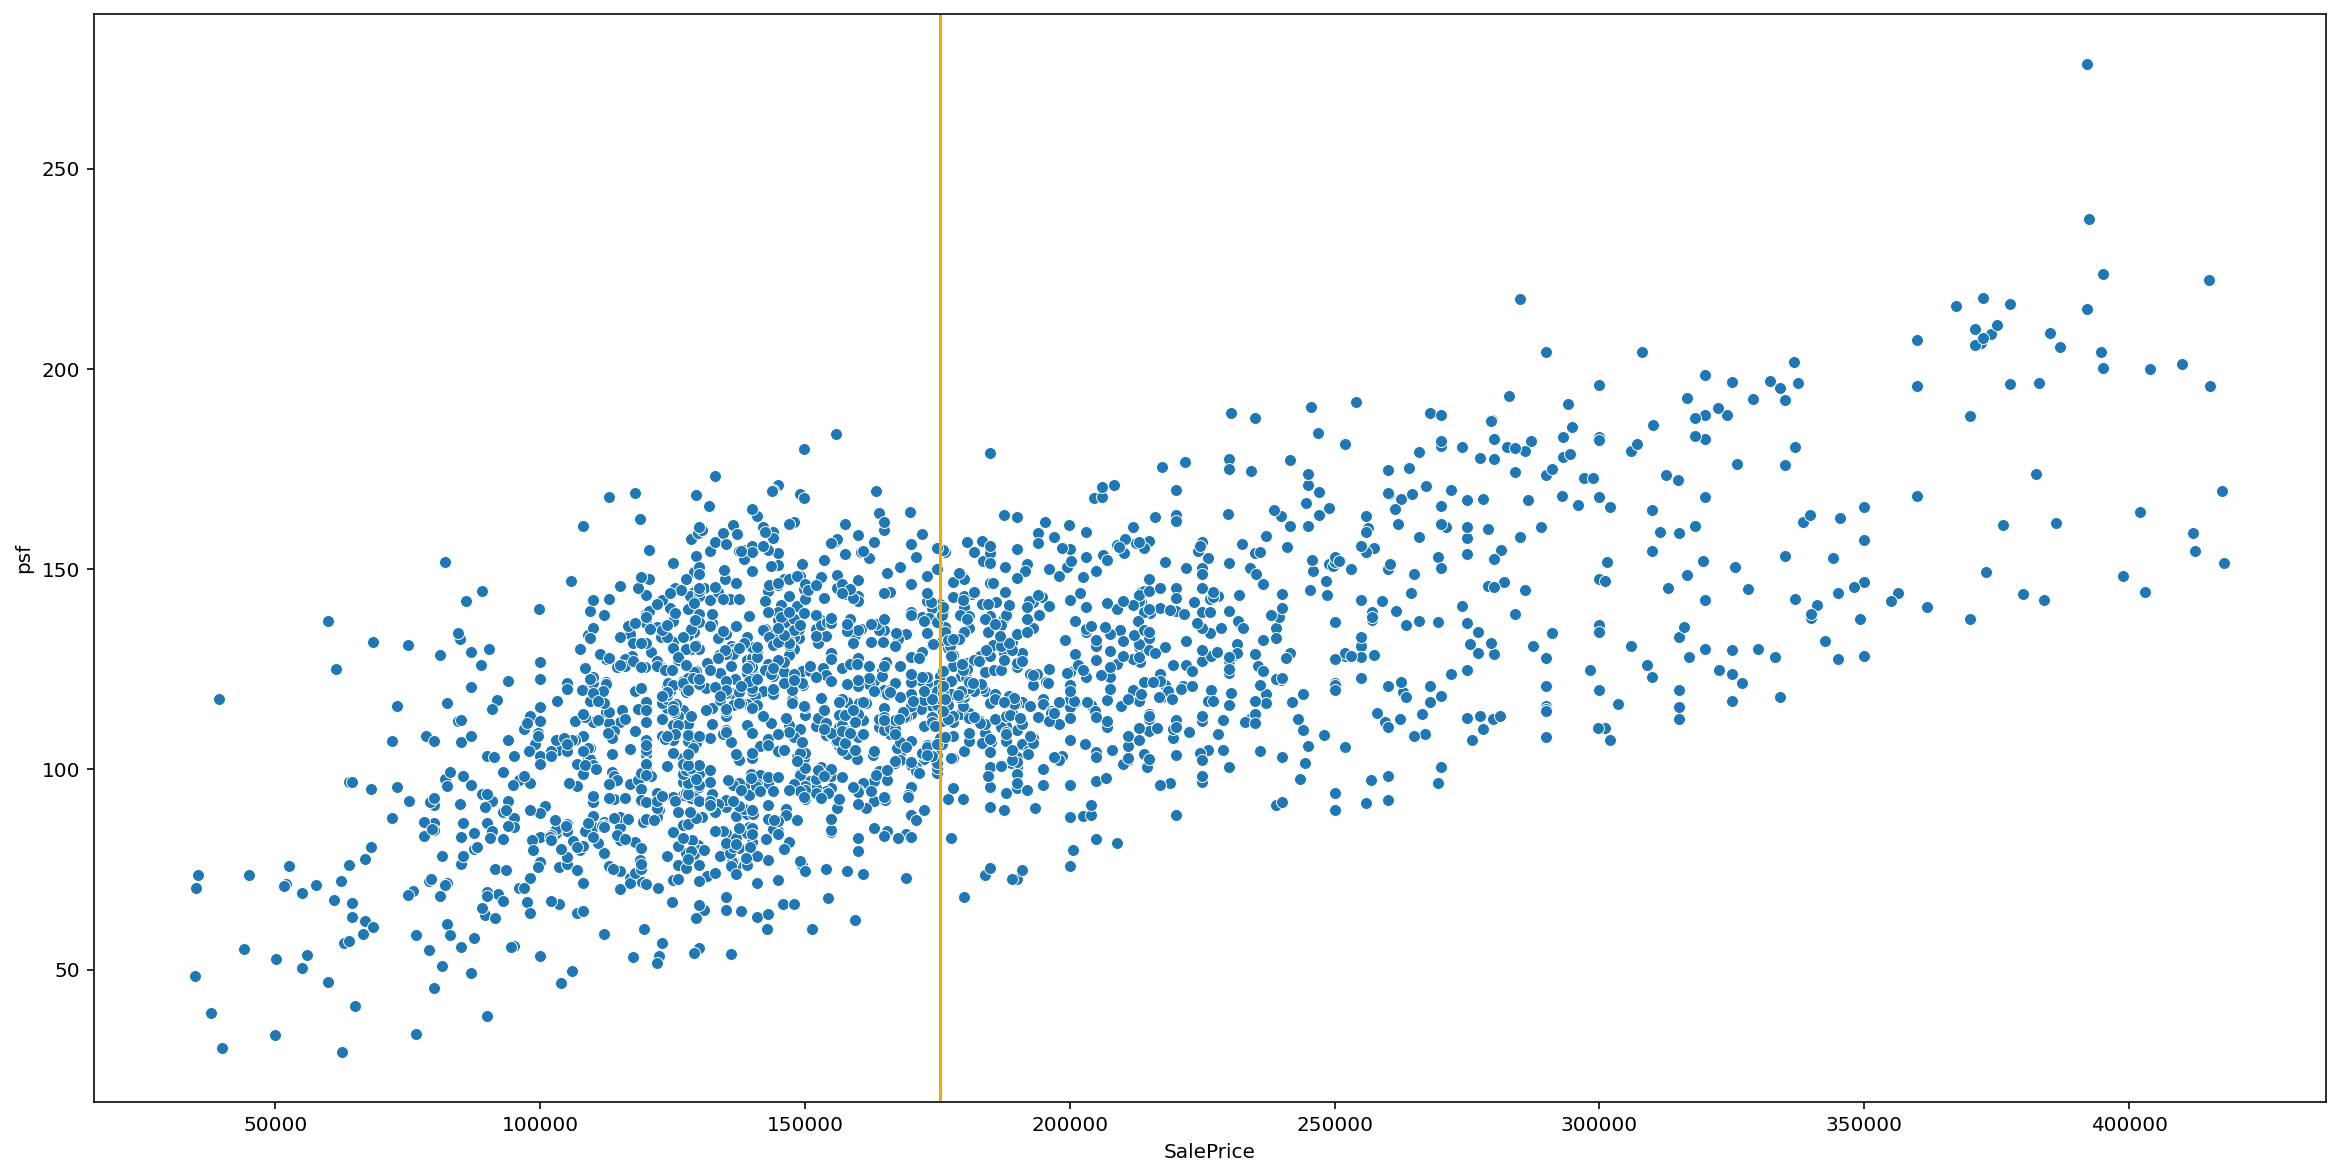

In [53]:
# Now looking at psf vs sale price
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="psf")

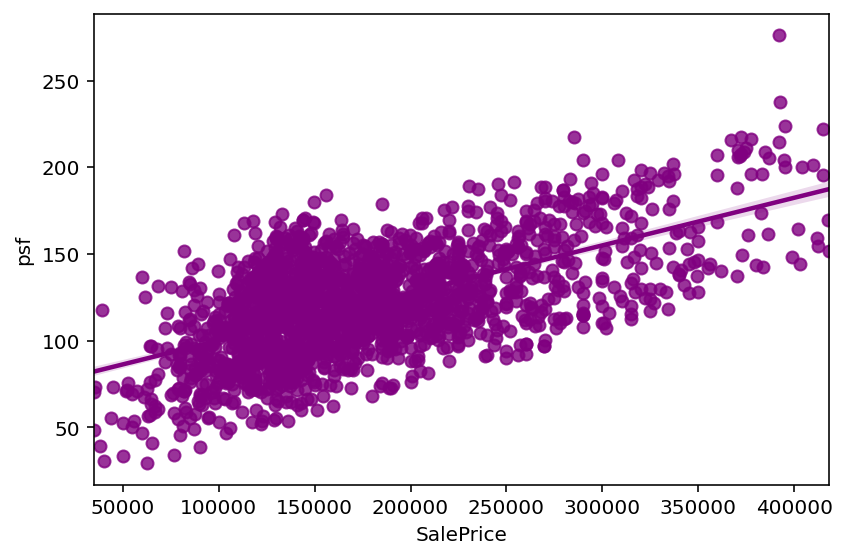

In [54]:
sns.regplot(x='SalePrice', y='psf', data=df_no_out, color="purple")
plt.tight_layout()

There is an obvious regression line between psf and price with 1 outlier at the psf > 250. It is the only property with psf > $250.

In [55]:
df_no_out.loc[(df_no_out['psf'] > 250)]

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  \
1135  1641  527252070      8089          4          4           3   

      Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
1135             8             6        2007            2007           0.0   

      Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
1135           4           3        4.0        3.0              3   

      BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  \
1135               6               1         1419.0           5           5   

      1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
1135        1419           0                0         1419             1.0   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
1135             0.0          2          0              2              1   

      Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
1135             4              7           8           1            4   

      Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond  \
1135              2          2.0        567.0          3.0          3.0   

      Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1135            3           140              0               0           0   

      Screen Porch  Pool Area Pool QC Fence  Misc Val  Mo Sold  Yr Sold  \
1135             0          0    None  None         0       10     2007   

      Lot Frontage_zero_imputed  Lot Frontage_mean_imputed  \
1135                       60.0                       60.0   

      Lot Frontage_Reg_imputed  MS SubClass_20  MS SubClass_30  \
1135                      60.0               1               0   

      MS SubClass_40  MS SubClass_45  MS SubClass_50  MS SubClass_60  \
1135               0               0               0               0   

      MS SubClass_70  MS SubClass_75  MS SubClass_80  MS SubClass_85  \
1135               0               0               0               0   

      MS SubClass_90  MS SubClass_120  MS SubClass_150  MS SubClass_160  \
1135               0                0                0                0   

      MS SubClass_180  MS SubClass_190  MS Zoning_A (agr)  MS Zoning_C (all)  \
1135                0                0                  0                  0   

      MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  \
1135             0                  0             0             1   

      MS Zoning_RM  Street_Grvl  Street_Pave  Alley_Grvl  Alley_None  \
1135             0            0            1           0           1   

      Alley_Pave  Land Contour_Bnk  Land Contour_HLS  Land Contour_Low  \
1135           0                 0                 1                 0   

      Land Contour_Lvl  Lot Config_Corner  Lot Config_CulDSac  Lot Config_FR2  \
1135                 0                  0                   0               0   

      Lot Config_FR3  Lot Config_Inside  Neighborhood_Blmngtn  \
1135               0                  1                     0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1135                     0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1135                     0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_Greens  \
1135                     0                     0                    0   

      Neighborhood_GrnHill  Neighborhood_IDOTRR  Neighborhood_Landmrk  \
1135                     0                    0                     0   

      Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
1135                     0                     0                   0   

      Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
1135                     0                    0                     0   

      Neighborhood_NridgHt 

However, the property is new and it was sold after it was constructed.

In [56]:
df_age_0 = df_no_out.loc[(df_no_out['age'] < 1) & (df_no_out['1st Flr SF'] > 1000) & (df_no_out['1st Flr SF'] < 1700)]
df_age_0.describe()

Id           PID      Lot Area  Lot Shape  Utilities  \
count    45.000000  4.500000e+01     45.000000  45.000000       45.0   
mean   1968.022222  6.043353e+08   9944.688889   3.666667        4.0   
std     582.261910  1.537356e+08   3168.226711   0.476731        0.0   
min     105.000000  5.271080e+08   3087.000000   3.000000        4.0   
25%    1741.000000  5.281861e+08   7862.000000   3.000000        4.0   
50%    2102.000000  5.284350e+08   9849.000000   4.000000        4.0   
75%    2416.000000  5.284881e+08  11830.000000   4.000000        4.0   
max    2757.000000  9.232021e+08  16659.000000   4.000000        4.0   

       Land Slope  Overall Qual  Overall Cond   Year Built  Year Remod/Add  \
count   45.000000     45.000000     45.000000    45.000000       45.000000   
mean     2.977778      7.600000      5.066667  2006.800000     2006.822222   
std      0.149071      0.914529      0.252262     0.919486        0.936359   
min      2.000000      5.000000      5.000000  2006.000000     2006.000000   
25%      3.000000      7.000000      5.000000  2006.000000     2006.000000   
50%      3.000000      8.000000      5.000000  2007.000000     2007.000000   
75%      3.000000      8.000000      5.000000  2007.000000     2007.000000   
max      3.000000      9.000000      6.000000  2010.000000     2010.000000   

       Mas Vnr Area  Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  \
count     45.000000   45.000000        45.0  45.000000  45.000000   
mean      97.533333    4.044444         3.0   4.288889   3.177778   
std      152.858461    0.424026         0.0   0.505525   0.534657   
min        0.000000    3.000000         3.0   3.000000   1.000000   
25%        0.000000    4.000000         3.0   4.000000   3.000000   
50%        0.000000    4.000000         3.0   4.000000   3.000000   
75%      164.000000    4.000000         3.0   5.000000   3.000000   
max      572.000000    5.000000         3.0   5.000000   4.000000   

       Bsmt Exposure  BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  \
count      45.000000       45.000000            45.0      45.000000   
mean        1.911111        3.644444             1.0    1371.822222   
std         1.104170        2.505953             0.0     258.806552   
min         1.000000        1.000000             1.0     192.000000   
25%         1.000000        1.000000             1.0    1246.000000   
50%         1.000000        6.000000             1.0    1365.000000   
75%         3.000000        6.000000             1.0    1542.000000   
max         4.000000        6.000000             1.0    1694.000000   

       Heating QC  Electrical   1st Flr SF   2nd Flr SF  Low Qual Fin SF  \
count   45.000000        45.0    45.000000    45.000000             45.0   
mean     4.911111         5.0  1395.866667   292.400000              0.0   
std      0.287799         0.0   186.058715   522.190726              0.0   
min      4.000000         5.0  1054.000000     0.000000              0.0   
25%      5.000000         5.0  1262.000000     0.000000              0.0   
50%      5.000000         5.0  1365.000000     0.000000              0.0   
75%      5.000000         5.0  1542.000000   551.000000              0.0   
max      5.000000         5.0  1694.000000  1426.000000              0.0   

       Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
count    45.000000       45.000000       45.000000  45.000000  45.000000   
mean   1688.266667        0.377778        0.022222   1.955556   0.355556   
std     480.903666        0.490310        0.149071   0.366529   0.528959   
min    1120.000000        0.000000        0.000000   1.000000   0.000000   
25%    1316.000000        0.000000        0.000000   2.000000   0.000000   
50%    1528.000000        0.000000        0.000000   2.000000   0.000000   
75%    1939.000000        1.000000        0.000000   2.000000   1.000000   
max    2696.000000        1.000000        1.000000   3.000000   2.000000   

       Bedroom AbvGr  Kitchen Ab

By studying other properties with similar, it seems its price is withing the mean and 3 std devs.  
As such, the row will not be removed.

<AxesSubplot:xlabel='SalePrice', ylabel='Total Bsmt SF'>

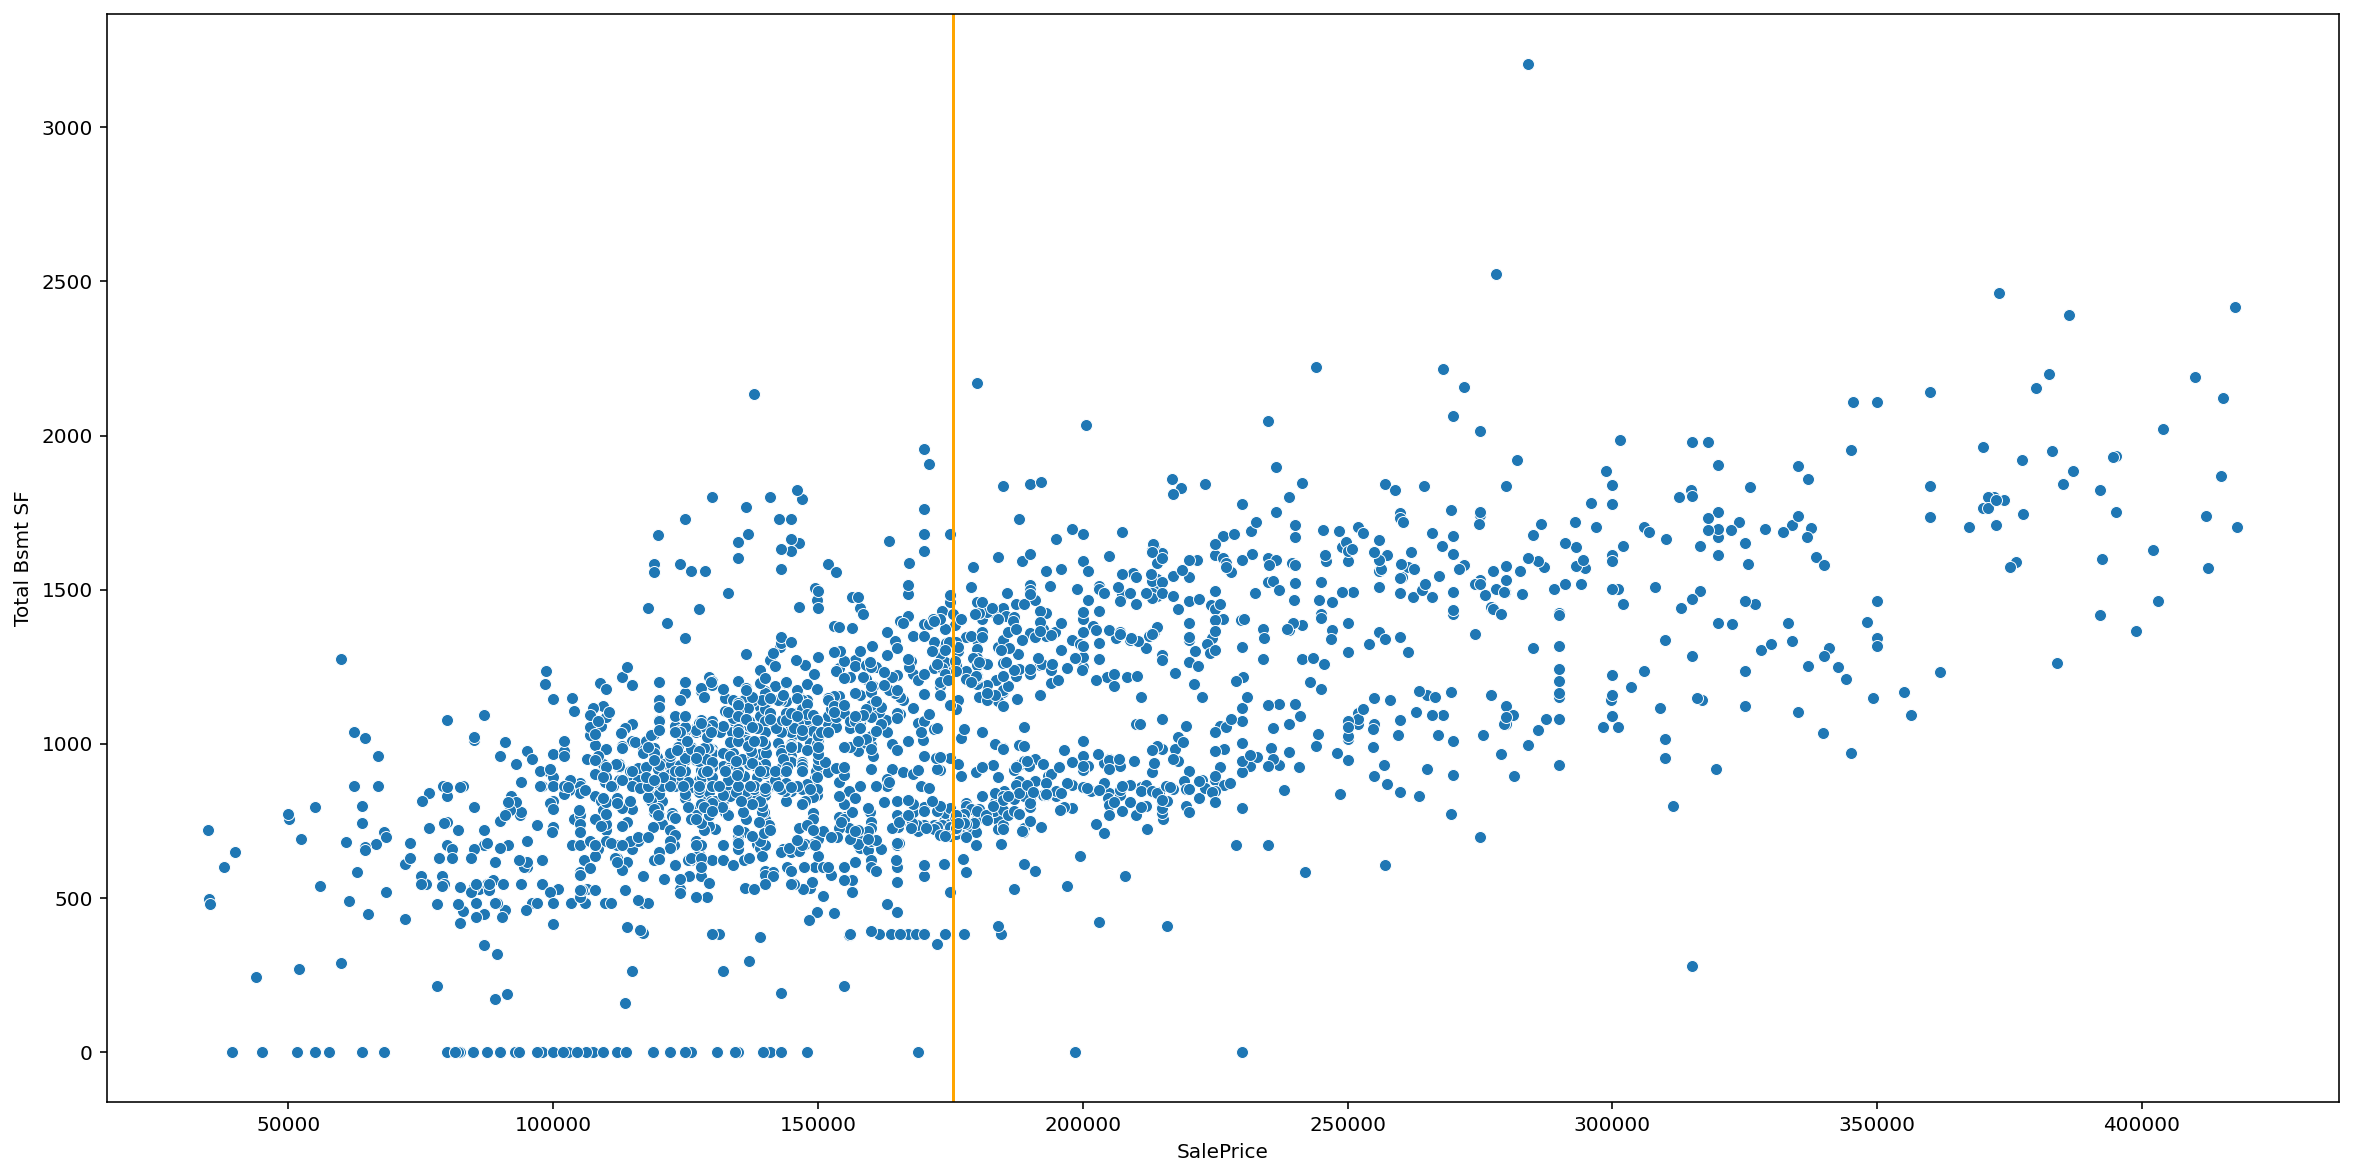

In [57]:
# now looking at total bsmt sf and saleprice
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Total Bsmt SF")

In this graph, there is 1 outlier at the top and several at the bottom. I will perform 3 x std dev on top and bottom to remove.

In [58]:
df_no_out = df_no_out[(df_no_out["Total Bsmt SF"] < np.mean(df["Total Bsmt SF"]) + 3*np.std(df_no_out["Total Bsmt SF"]))]

In [59]:
df_no_out = df_no_out[(df_no_out["Total Bsmt SF"] > np.mean(df["Total Bsmt SF"]) - 3*np.std(df_no_out["Total Bsmt SF"]))]

<AxesSubplot:xlabel='SalePrice', ylabel='Total Bsmt SF'>

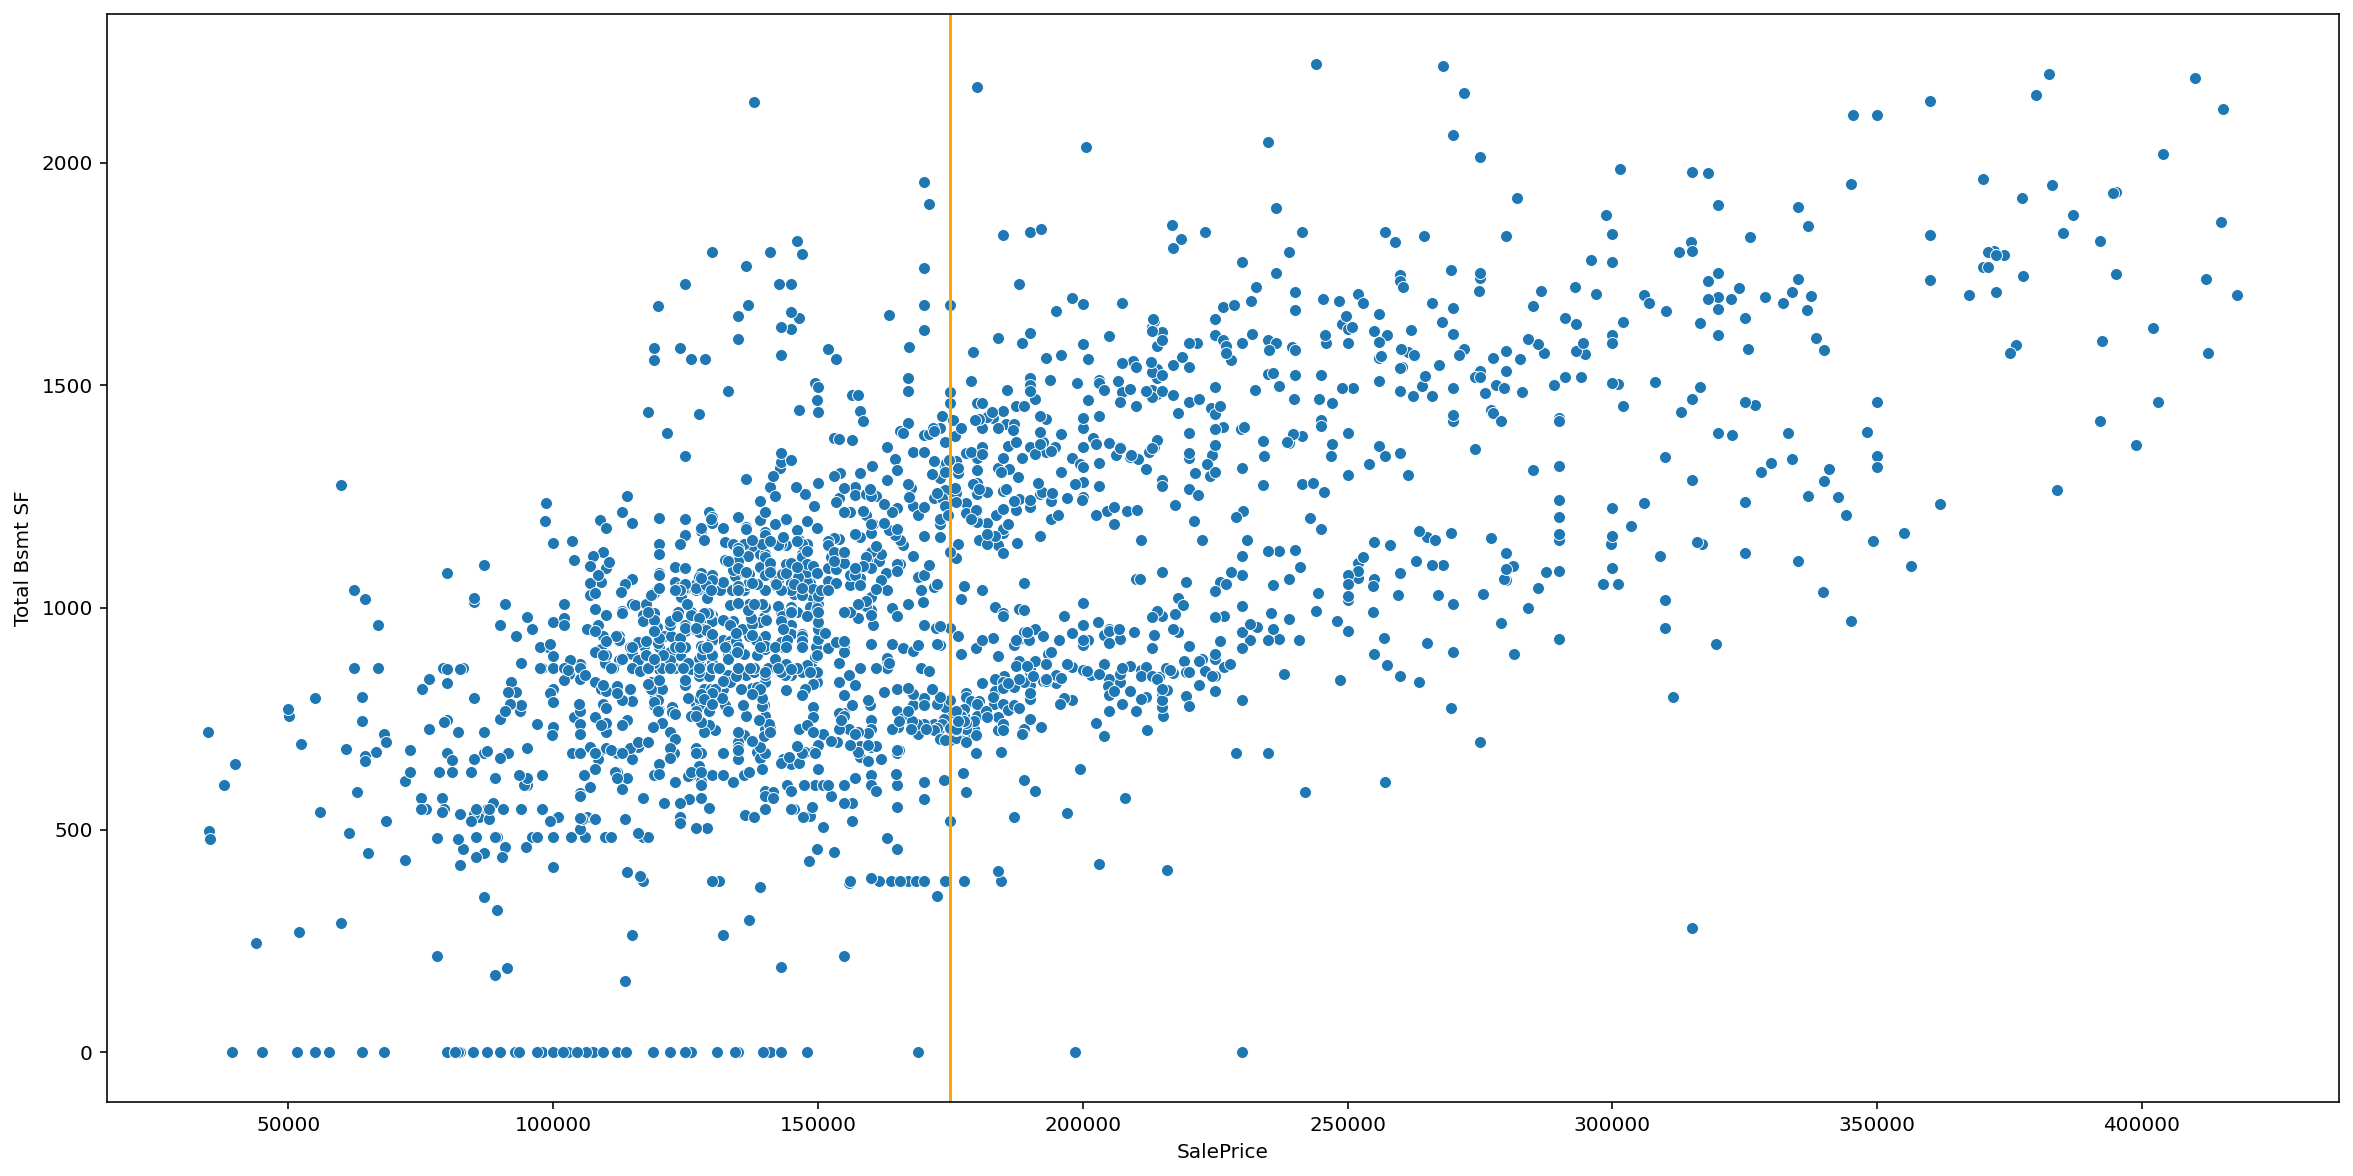

In [60]:
# now looking at total bsmt sf and saleprice
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Total Bsmt SF")

Outliers removed.

<AxesSubplot:xlabel='SalePrice', ylabel='Bsmt Qual'>

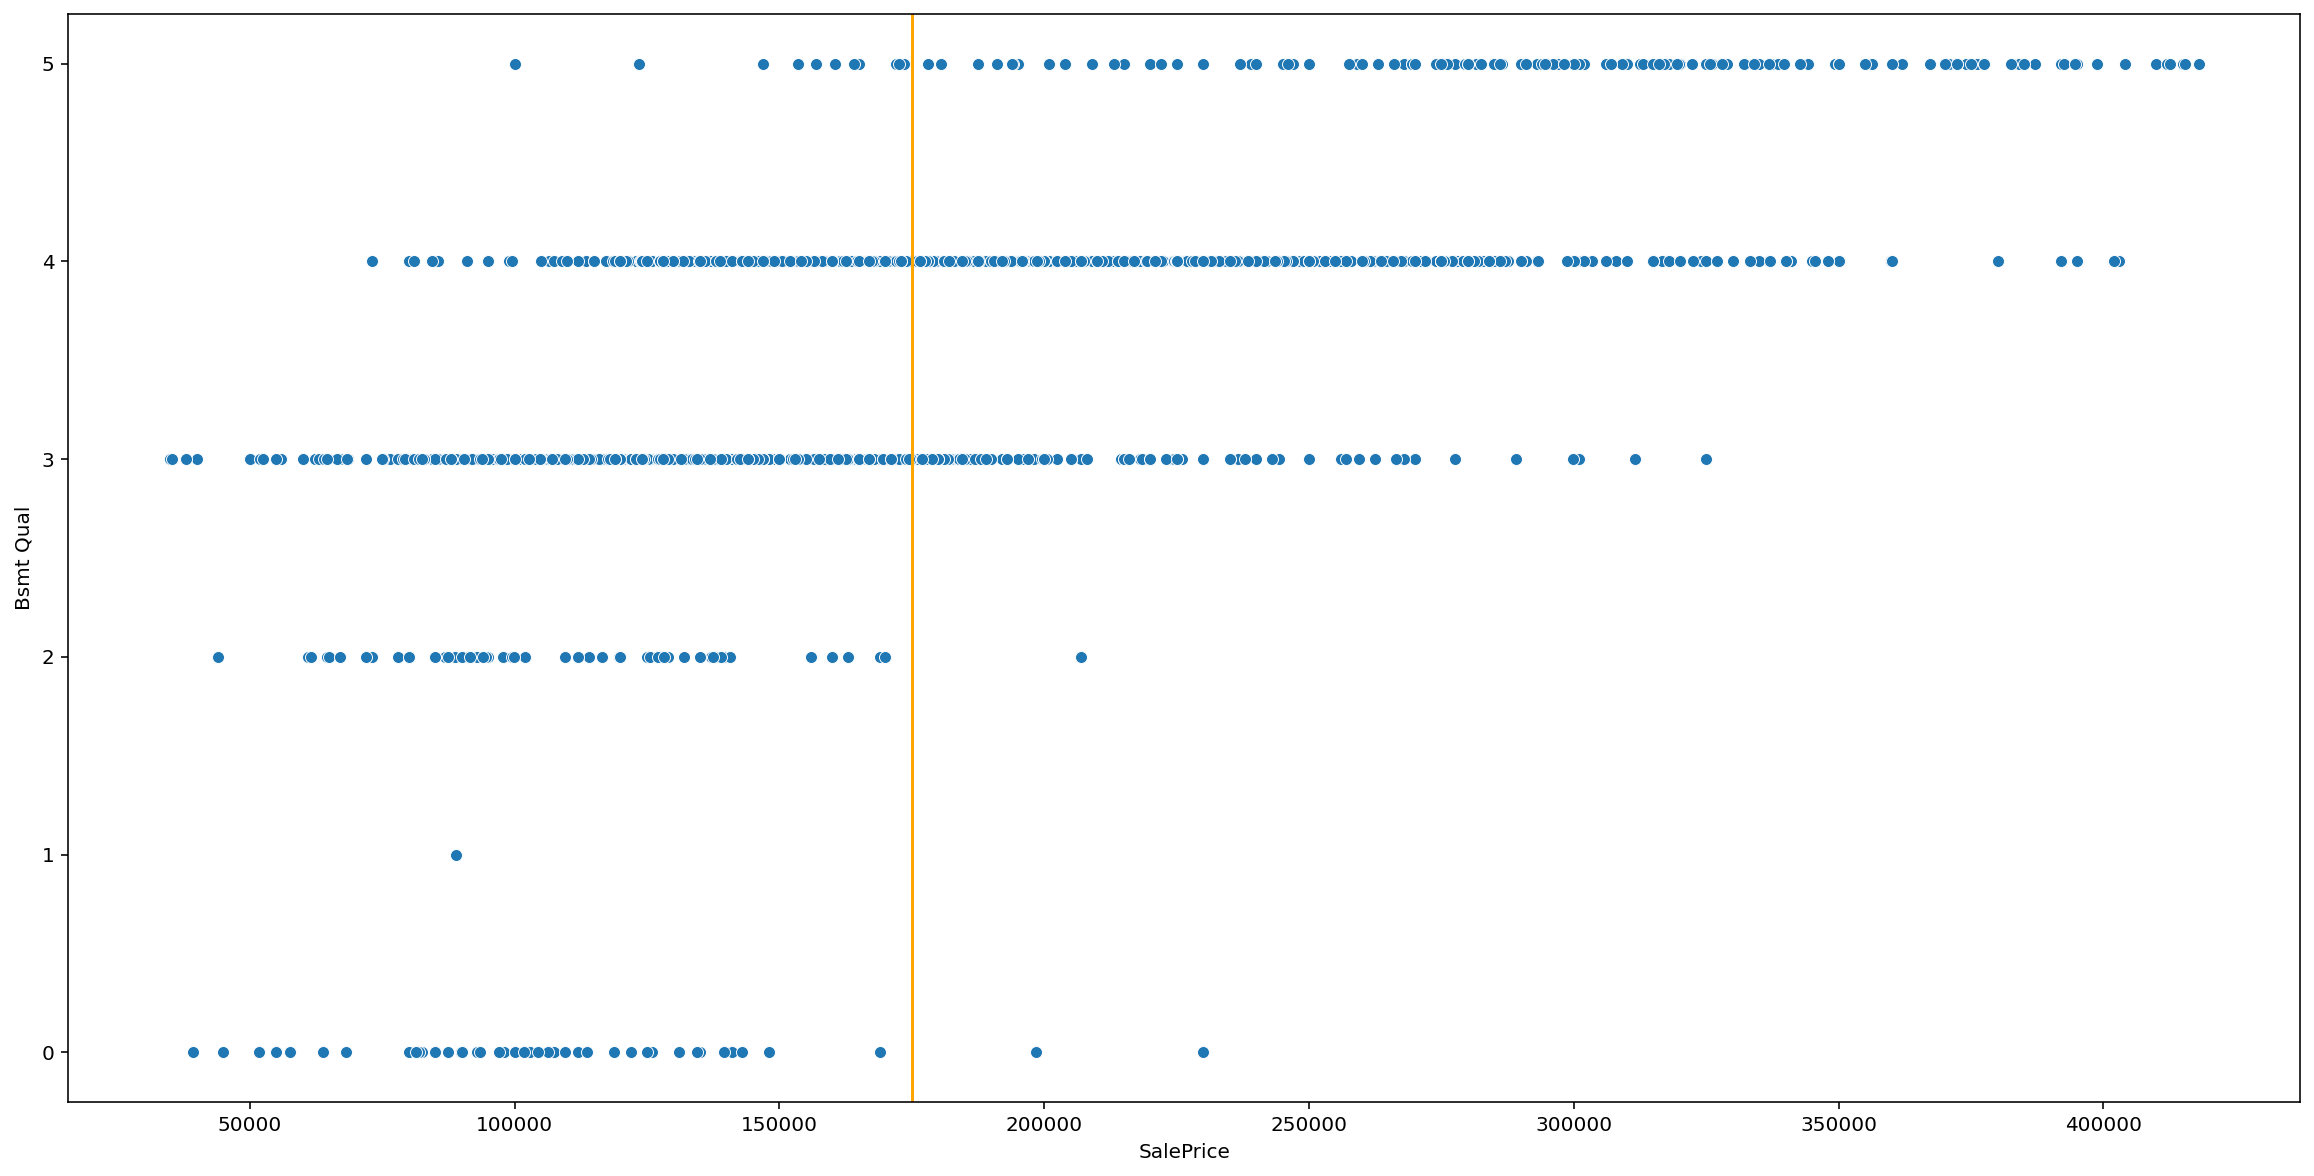

In [61]:
#now looking at basement quality vs saleprice
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Bsmt Qual")

There are some outliers at 4.0, and 1 at 2.0. These will be removed.

In [62]:
df_no_out.loc[(df_no_out['Bsmt Qual'] == 4) & (df_no_out['SalePrice'] > 370000)]

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  \
1135  1641  527252070      8089          4          4           3   
1262   496  528321010     15138          3          4           3   
1540   505  528390100     46589          2          4           3   
1768  1697  528110070     14226          4          4           3   
1832  1698  528110100     13693          4          4           3   

      Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
1135             8             6        2007            2007           0.0   
1262             8             5        1995            1996         506.0   
1540             8             7        1994            2005         528.0   
1768             8             5        2006            2006         375.0   
1832             9             5        2006            2006         772.0   

      Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
1135           4           3        4.0        3.0              3   
1262           4           3        4.0        3.0              1   
1540           4           3        4.0        4.0              1   
1768           4           3        4.0        3.0              3   
1832           5           3        4.0        3.0              3   

      BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  \
1135               6               1         1419.0           5           5   
1262               6               1         1462.0           5           5   
1540               6               3         1629.0           5           5   
1768               1               1         1935.0           4           5   
1832               1               1         2153.0           5           5   

      1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
1135        1419           0                0         1419             1.0   
1262        1490        1304                0         2794             1.0   
1540        1686         762                0         2448             1.0   
1768        1973           0                0         1973             0.0   
1832        2069         574                0         2643             0.0   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
1135             0.0          2          0              2              1   
1262             0.0          2          1              4              1   
1540             0.0          2          1              4              1   
1768             0.0          2          0              3              1   
1832             0.0          2          1              3              1   

      Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
1135             4              7           8           1            4   
1262             5              9           8           1            3   
1540             4              8           8           1            3   
1768             4              9           8           1            4   
1832             5              9           8           1            4   

      Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond  \
1135              2          2.0        567.0          3.0          3.0   
1262              3          3.0        810.0          3.0          3.0   
1540              2          3.0        711.0          3.0          3.0   
1768              3          3.0        895.0          3.0          3.0   
1832              3          3.0        694.0          3.0          3.0   

      Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1135            3           140              0               0           0   
1262            3             0            146             202           0   
1540            3           517             76               0           0   
1768            3           315             45               0           0   
1832            3     

In [63]:
df_no_out.loc[(df_no_out['Bsmt Qual'] == 2) & (df_no_out['SalePrice'] > 200000)]

Id        PID  Lot Area  Lot Shape  Utilities  Land Slope  \
1744  992  526354070     11075          4          4           3   

      Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
1744             6             5        1969            1969           0.0   

      Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
1744           3           3        2.0        3.0              2   

      BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF  Heating QC  Electrical  \
1744               5               2          952.0           3           5   

      1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
1744        1092        1020                0         2112             0.0   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
1744             0.0          2          1              4              1   

      Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces Fireplace Qu  \
1744             3              9           8           2            4   

      Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond  \
1744              1          2.0        576.0          3.0          3.0   

      Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1744            3           280              0               0           0   

      Screen Porch  Pool Area Pool QC Fence  Misc Val  Mo Sold  Yr Sold  \
1744             0          0    None  None         0        6     2008   

      Lot Frontage_zero_imputed  Lot Frontage_mean_imputed  \
1744                       85.0                       85.0   

      Lot Frontage_Reg_imputed  MS SubClass_20  MS SubClass_30  \
1744                      85.0               0               0   

      MS SubClass_40  MS SubClass_45  MS SubClass_50  MS SubClass_60  \
1744               0               0               0               1   

      MS SubClass_70  MS SubClass_75  MS SubClass_80  MS SubClass_85  \
1744               0               0               0               0   

      MS SubClass_90  MS SubClass_120  MS SubClass_150  MS SubClass_160  \
1744               0                0                0                0   

      MS SubClass_180  MS SubClass_190  MS Zoning_A (agr)  MS Zoning_C (all)  \
1744                0                0                  0                  0   

      MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  \
1744             0                  0             0             1   

      MS Zoning_RM  Street_Grvl  Street_Pave  Alley_Grvl  Alley_None  \
1744             0            0            1           0           1   

      Alley_Pave  Land Contour_Bnk  Land Contour_HLS  Land Contour_Low  \
1744           0                 0                 0                 0   

      Land Contour_Lvl  Lot Config_Corner  Lot Config_CulDSac  Lot Config_FR2  \
1744                 1                  0                   0               0   

      Lot Config_FR3  Lot Config_Inside  Neighborhood_Blmngtn  \
1744               0                  1                     0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1744                     0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1744                     0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_Greens  \
1744                     0                     0                    0   

      Neighborhood_GrnHill  Neighborhood_IDOTRR  Neighborhood_Landmrk  \
1744                     0                    0                     0   

      Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
1744                     0                     0                   1   

      Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
1744                     0                    0                     0   

      Neighborhood_NridgHt  

In [64]:
df_no_out.drop([1135, 1262, 1540, 1744], inplace = True)

<AxesSubplot:xlabel='SalePrice', ylabel='Bsmt Qual'>

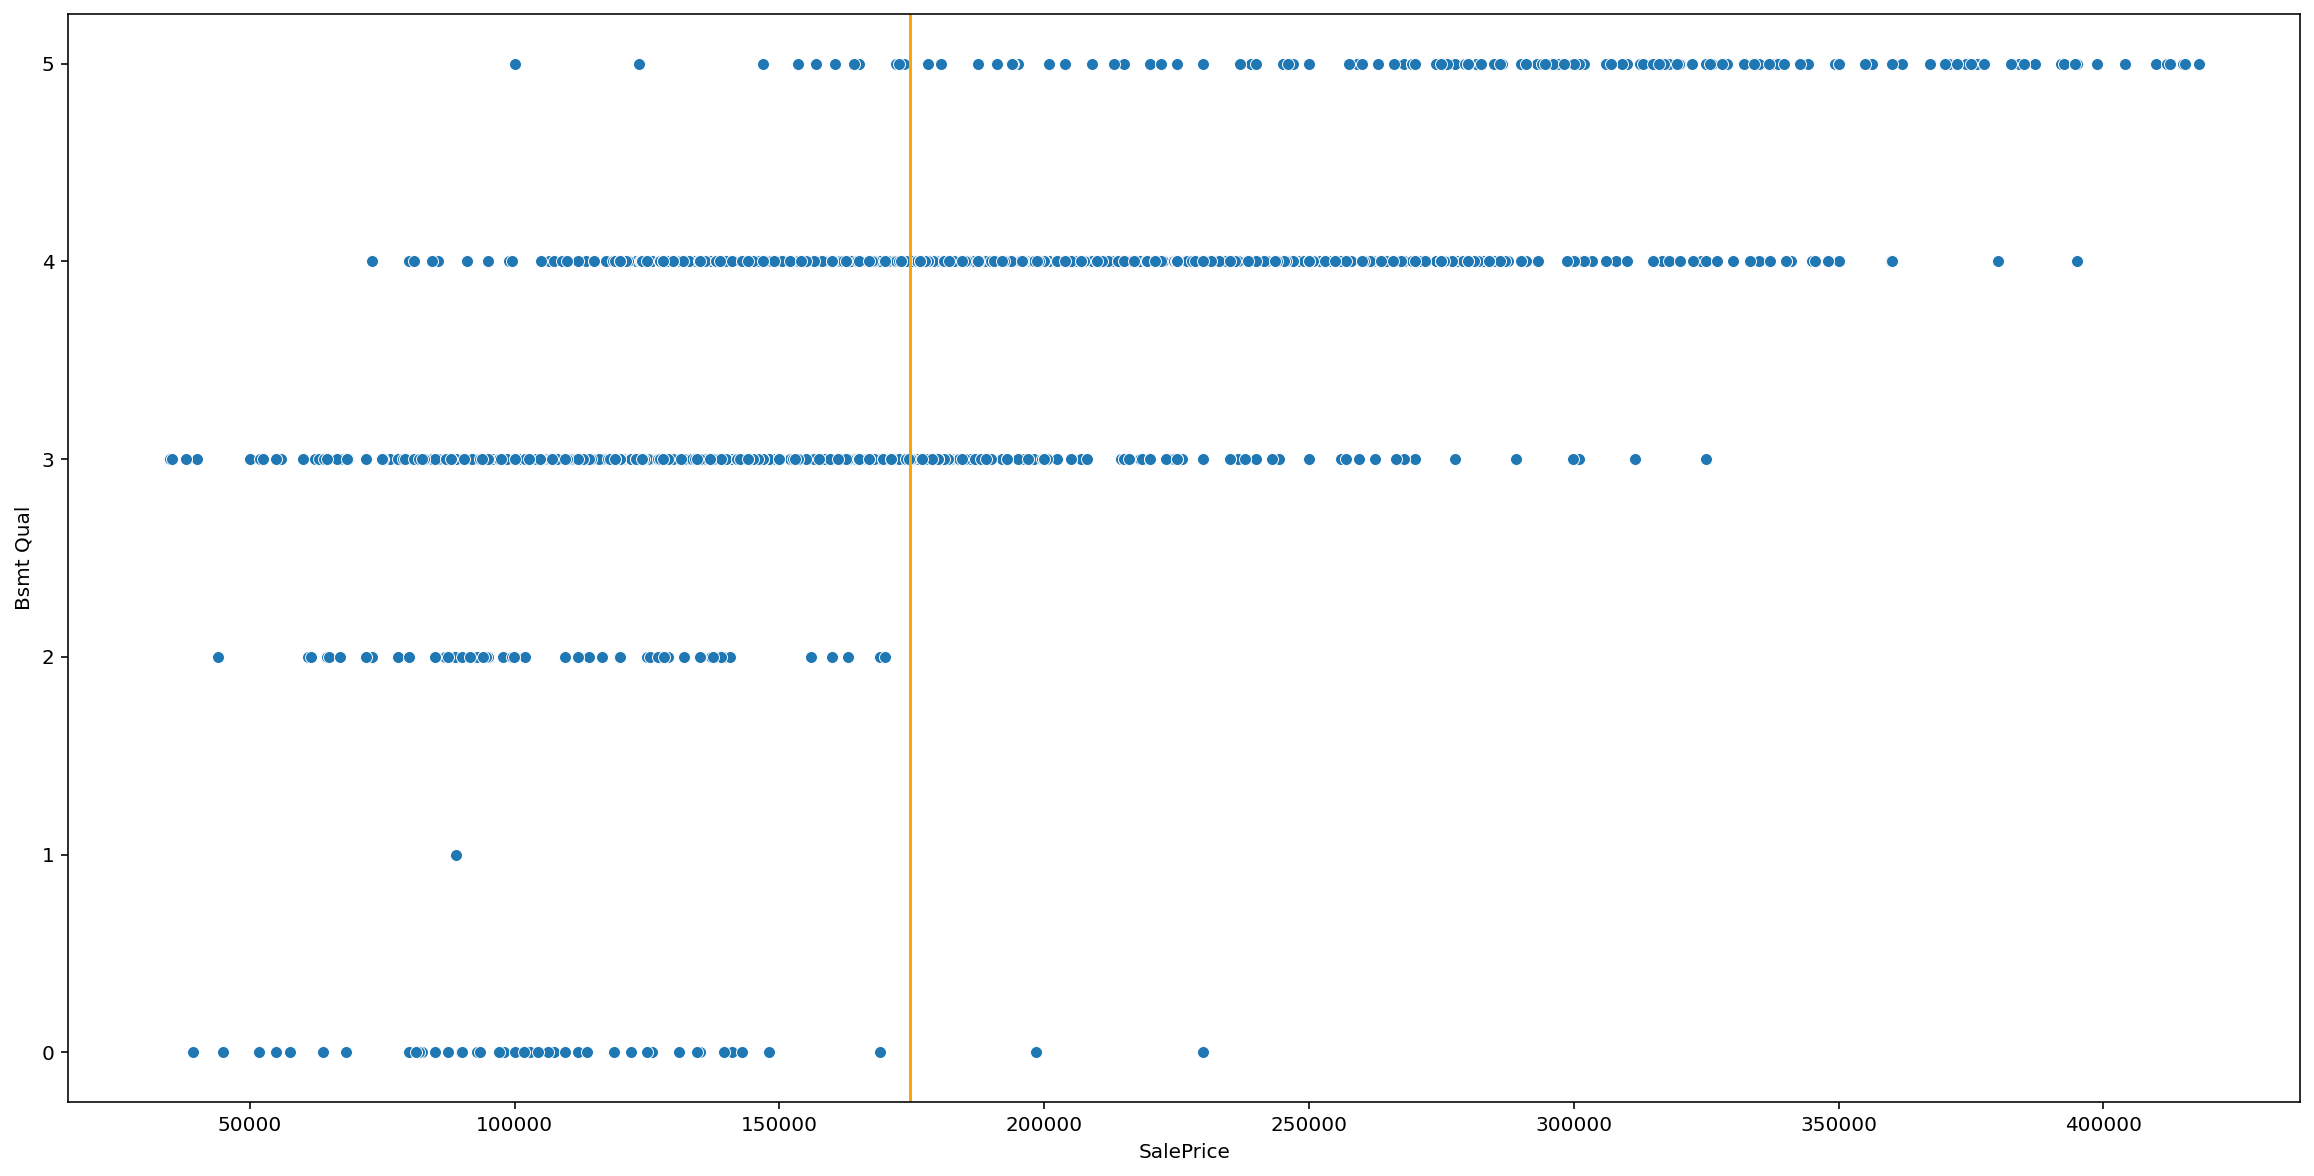

In [65]:
#now looking at basement quality vs saleprice
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="Bsmt Qual")

<AxesSubplot:xlabel='SalePrice', ylabel='1st Flr SF'>

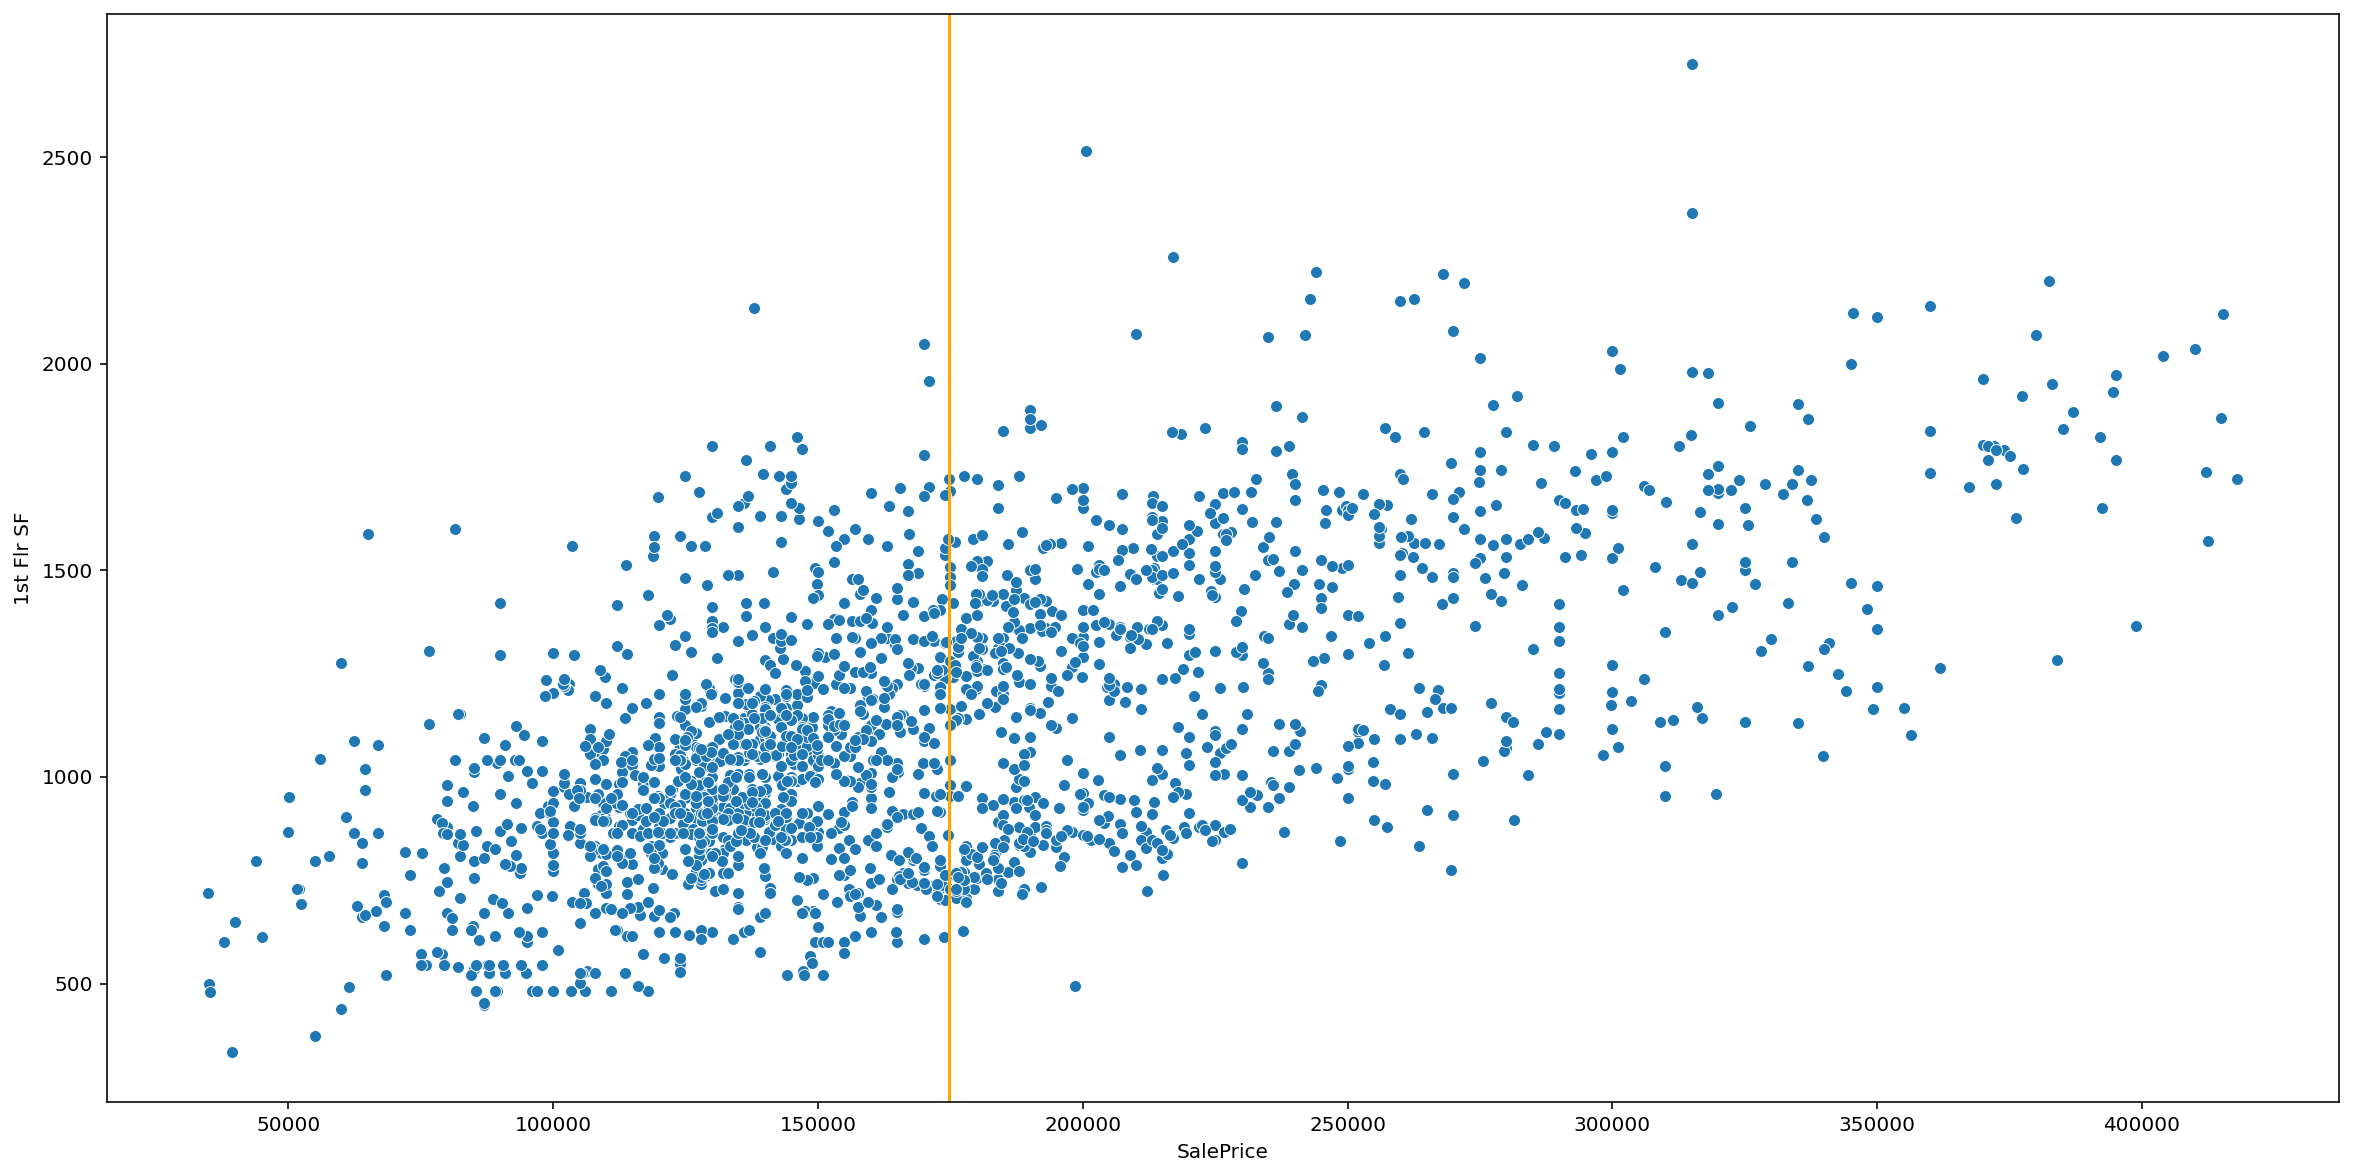

In [66]:
#now looking at 1st floor sqft vs saleprice
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="1st Flr SF")

As there are outliers at the top, I will perform cleaning on these as well.

In [67]:
df_no_out = df_no_out[(df_no_out["1st Flr SF"] < np.mean(df["1st Flr SF"]) + 3*np.std(df_no_out["1st Flr SF"]))]

<AxesSubplot:xlabel='SalePrice', ylabel='1st Flr SF'>

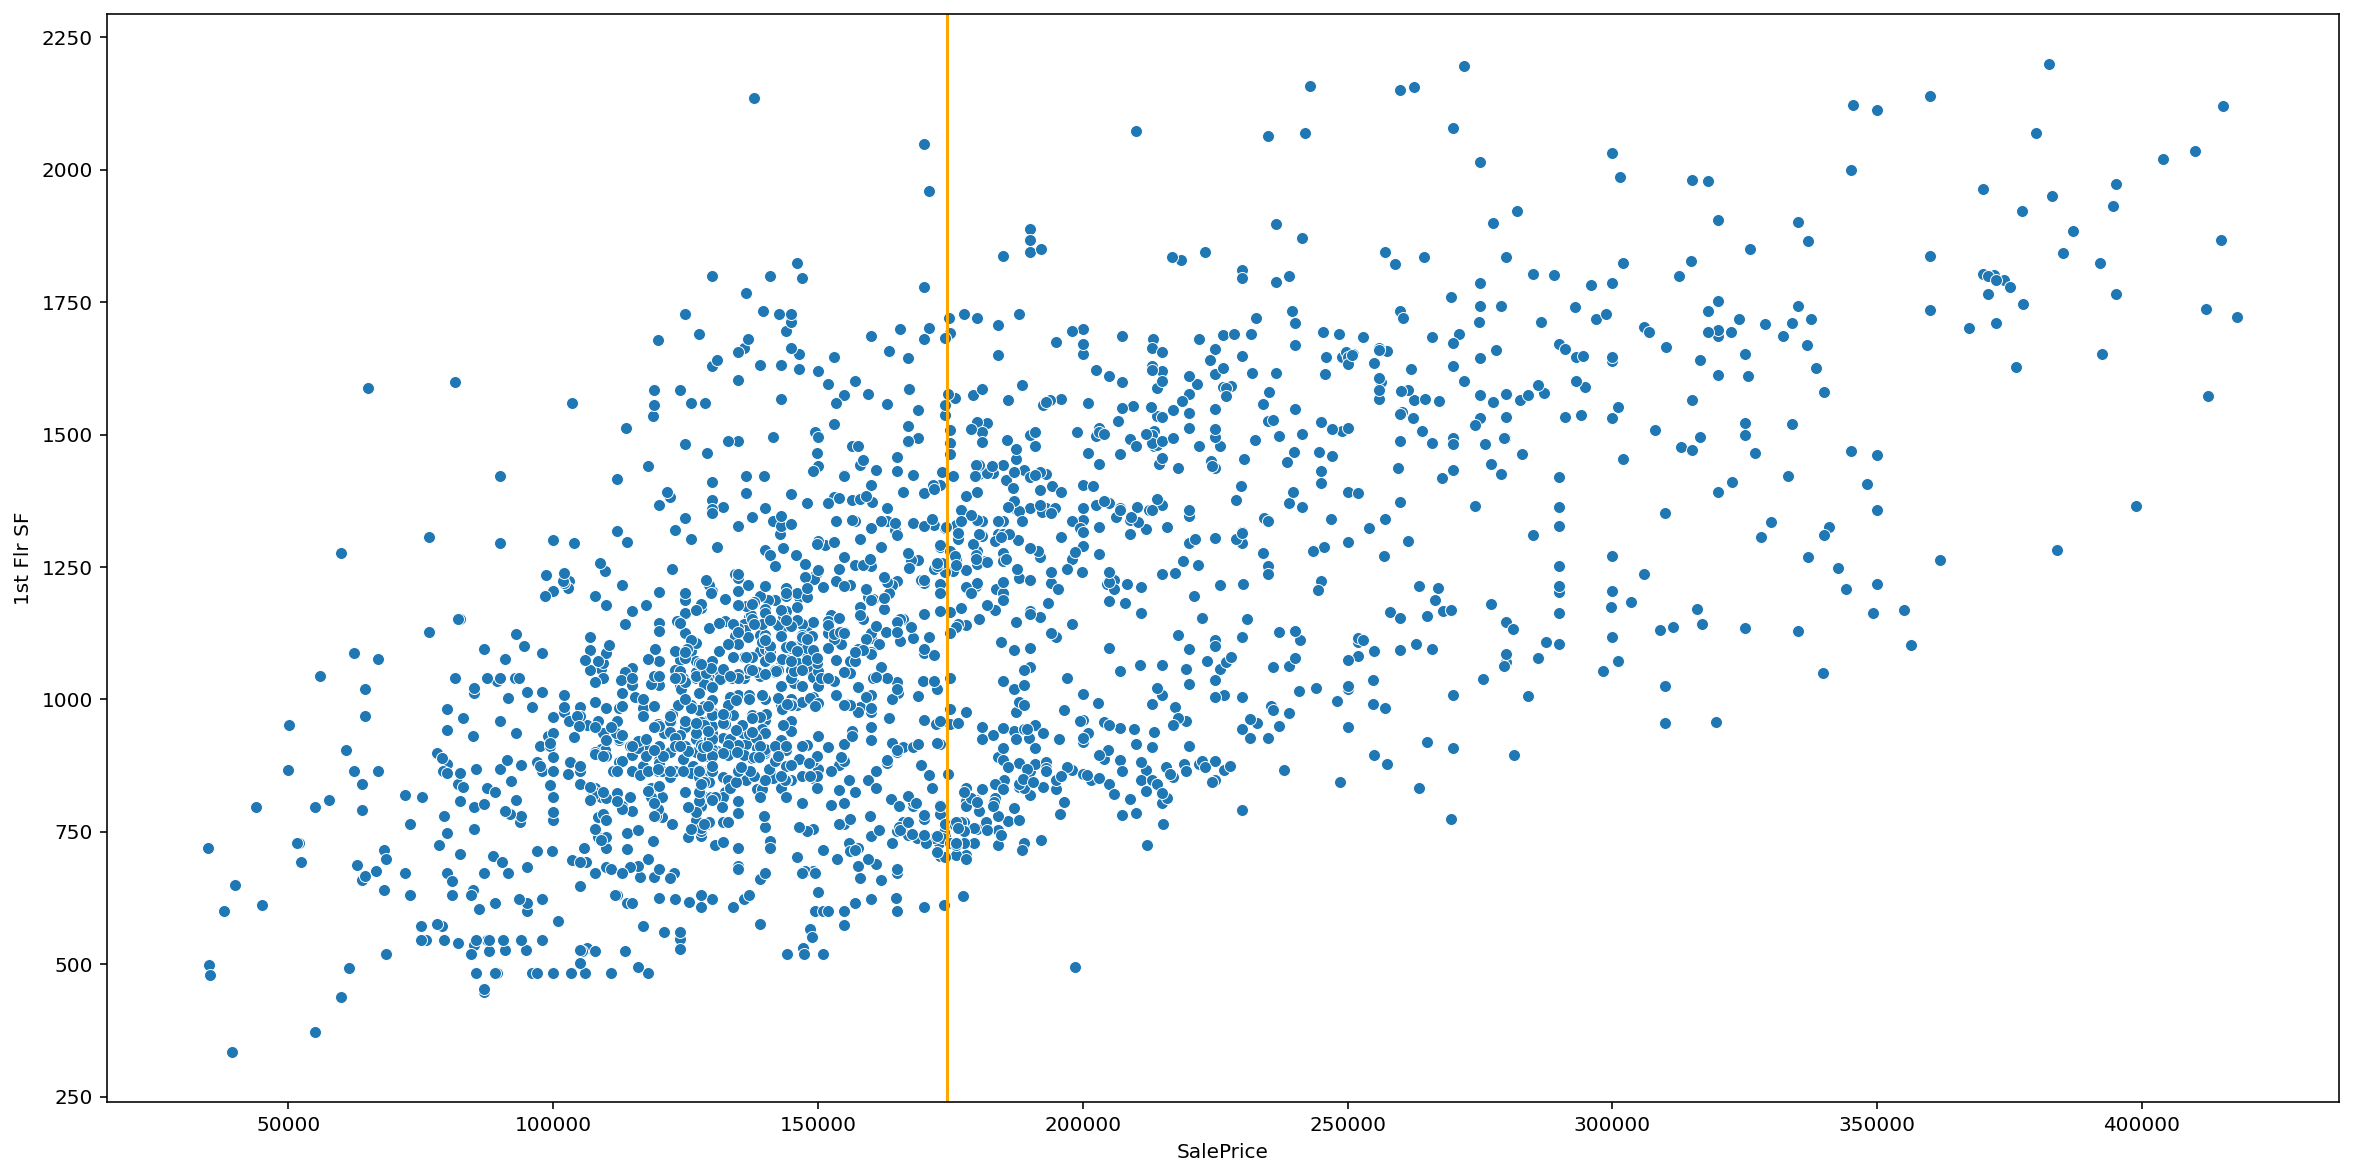

In [68]:
#now looking at 1st floor sqft vs saleprice
fig, ax = plt.subplots(figsize=(20,10)) 
plt.axvline(df_no_out['SalePrice'].mean(), color = 'orange')
sns.scatterplot(data = df_no_out, x = "SalePrice", y ="1st Flr SF")

Looks better.

In [69]:
df_no_out.shape

(1970, 235)

In [70]:
df_no_out.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2047
Data columns (total 235 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    Id                         int64  
 1    PID                        int64  
 2    Lot Area                   int64  
 3    Lot Shape                  int64  
 4    Utilities                  int64  
 5    Land Slope                 int64  
 6    Overall Qual               int64  
 7    Overall Cond               int64  
 8    Year Built                 int64  
 9    Year Remod/Add             int64  
 10   Mas Vnr Area               float64
 11   Exter Qual                 int64  
 12   Exter Cond                 int64  
 13   Bsmt Qual                  float64
 14   Bsmt Cond                  float64
 15   Bsmt Exposure              int64  
 16   BsmtFin Type 1             int64  
 17   BsmtFin Type 2             int64  
 18   Total Bsmt SF              float64
 19   Heating QC               

In [71]:
df_no_out.drop(labels=["Fireplace Qu","Fence", "Pool QC"], axis=1, inplace=True)

In [72]:
df_no_out.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2047
Data columns (total 232 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    Id                         int64  
 1    PID                        int64  
 2    Lot Area                   int64  
 3    Lot Shape                  int64  
 4    Utilities                  int64  
 5    Land Slope                 int64  
 6    Overall Qual               int64  
 7    Overall Cond               int64  
 8    Year Built                 int64  
 9    Year Remod/Add             int64  
 10   Mas Vnr Area               float64
 11   Exter Qual                 int64  
 12   Exter Cond                 int64  
 13   Bsmt Qual                  float64
 14   Bsmt Cond                  float64
 15   Bsmt Exposure              int64  
 16   BsmtFin Type 1             int64  
 17   BsmtFin Type 2             int64  
 18   Total Bsmt SF              float64
 19   Heating QC               

## psf variable

The price per square foot variable is an important part of house price deduction, however, the test data does not have saleprice. As such, the psf column has to be dropped as it is calculated by the saleprice / grlivarea.

In [73]:
df_no_out.drop(labels=["psf"], axis=1, inplace=True)

In [74]:
df_no_out.to_csv("../data/df_corr_out_removed.csv")

# Exploring the dataset

In [75]:
ddf = pd.read_csv("../data/dataframe_ames_no_dummies.csv")

In [76]:
ddf.head()

Id        PID  MS SubClass MS Zoning  Lot Area Street Alley  Lot Shape  \
0  109  533352170           60        RL     13517   Pave  None          3   
1  544  531379050           60        RL     11492   Pave  None          3   
2  153  535304180           20        RL      7922   Pave  None          4   
3  318  916386060           60        RL      9802   Pave  None          4   
4  255  906425045           50        RL     14235   Pave  None          3   

  Land Contour  Utilities Lot Config  Land Slope Neighborhood Condition 1  \
0          Lvl          4    CulDSac           3       Sawyer        RRAe   
1          Lvl          4    CulDSac           3      SawyerW        Norm   
2          Lvl          4     Inside           3        NAmes        Norm   
3          Lvl          4     Inside           3       Timber        Norm   
4          Lvl          4     Inside           3      SawyerW        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   Mas Vnr Area  Exter Qual  Exter Cond Foundation  Bsmt Qual  Bsmt Cond  \
0         289.0           4           3     CBlock        3.0        3.0   
1         132.0           4           3      PConc        4.0        3.0   
2           0.0           3           4     CBlock        3.0        3.0   
3           0.0           3           3      PConc        4.0        3.0   
4           0.0           3           3      PConc        2.0        4.0   

   Bsmt Exposure  BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF Heating  \
0              1               6               1          725.0    GasA   
1              1               6               1          913.0    GasA   
2              1               6               1         1057.0    GasA   
3              1               1               1          384.0    GasA   
4              1               1               1          676.0    GasA   

   Heating QC Central Air  Electrical  1st Flr SF  2nd Flr SF  \
0           5           Y           5         725         754   
1           5           Y           5         913        1209   
2           3           Y           5        1057           0   
3           4           Y           5         744         700   
4           3           Y           5         831         614   

   Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0                0         1479             0.0             0.0          2   
1                0         2122             1.0             0.0          2   
2                0         1057             1.0             0.0          1   
3                0         1444             0.0             0.0          2   
4                0         1445             0.0             0.0          2   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  TotRms AbvGrd  \
0          1              3              1             4              6   
1          1              4              1             4              8   
2          0              3              1             4              5   
3          1              3              1

In [77]:
df_3 = ddf.loc[(ddf['Total Bsmt SF'] == 728) & (ddf['Total Bsmt SF'] == ddf['1st Flr SF']) & (ddf['1st Flr SF'] == ddf['2nd Flr SF'])]

In [78]:
df_3.sort_values(by = ["Total Bsmt SF"])

Id        PID  MS SubClass MS Zoning  Lot Area Street Alley  \
198   1735  528221090           60        RL      9018   Pave  None   
204   1740  528222080           60        RL      7713   Pave  None   
272   2417  528221100           60        RL     15578   Pave  None   
758   1481  907420080           60        RL      8199   Pave  None   
835   2106  906380140           60        RL     11103   Pave  None   
1110  2815  907420070           60        RL      8461   Pave  None   
1865  1089  528240040           60        RL      8029   Pave  None   
1880  2412  528218060           60        RL     10237   Pave  None   

      Lot Shape Land Contour  Utilities Lot Config  Land Slope Neighborhood  \
198           3          Lvl          4     Inside           3      Gilbert   
204           4          Lvl          4     Inside           3      Gilbert   
272           3          Lvl          4     Corner           3      Gilbert   
758           4          Lvl          4     Inside           3      CollgCr   
835           3          Lvl          4     Corner           3      CollgCr   
1110          4          Lvl          4     Inside           3      CollgCr   
1865          3          Lvl          4     Inside           3      Gilbert   
1880          4          Lvl          4     Inside           3      Gilbert   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
198         Norm        Norm      1Fam      2Story             7   
204         Norm        Norm      1Fam      2Story             7   
272         Norm        Norm      1Fam      2Story             6   
758         Norm        Norm      1Fam      2Story             7   
835         Norm        Norm      1Fam      2Story             7   
1110        Norm        Norm      1Fam      2Story             6   
1865        Norm        Norm      1Fam      2Story             6   
1880        RRAn        Norm      1Fam      2Story             6   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
198              5        2007            2007        Hip   CompShg   
204              5        2007            2007      Gable   CompShg   
272              5        2006            2006      Gable   CompShg   
758              5        2005            2005      Gable   CompShg   
835              5        2006            2006      Gable   CompShg   
1110             5        2005            2006      Gable   CompShg   
1865             5        2005            2005      Gable   CompShg   
1880             5        2005            2006      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area  Exter Qual  \
198       VinylSd      VinylSd         None           0.0           4   
204       VinylSd      VinylSd        Stone          16.0           4   
272       VinylSd      VinylSd         None           0.0           4   
758       WdShing      Wd Shng         None           0.0           4   
835       VinylSd      VinylSd         None           0.0           4   
1110      VinylSd      VinylSd         None           0.0           4   
1865      VinylSd      VinylSd         None           0.0           3   
1880      VinylSd      VinylSd         None           0.0           4   

      Exter Cond Foundation  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
198            3      PConc        4.0        3.0              3   
204            3      PConc        4.0        3.0              1   
272            3      PConc        4.0        3.0              1   
758            3      PConc        4.0        3.0              3   
835            3      PConc        4.0        3.0              1   
1110           3      PConc        4.0        3.0              1   
1865           3      PConc        4.0        3.0              1   
1880           3      PConc        4.0        3.0              1   

      BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF Heating  Heating QC  \
198                1               1          728.0    Ga

In [79]:
df_3["SalePrice"].mean()

173148.0

In [80]:
df_test = ddf.loc[(ddf['Total Bsmt SF'] > 727) & (ddf['Total Bsmt SF'] < 729) & (ddf['1st Flr SF'] != ddf['2nd Flr SF'])]
df_test.sort_values(by = ['Total Bsmt SF'])

Id        PID  MS SubClass MS Zoning  Lot Area Street Alley  \
173   1910  534479140           70        RL      9480   Pave  None   
228   2218  909281020          190        RL      6221   Pave  None   
260    131  534451150           30        RL      5350   Pave  None   
573   2641  902106040           70        RM      9600   Pave  Grvl   
1053   922  909276200           50        RL      9600   Pave  None   
1975   749  903425245           70        RL     11414   Pave  None   

      Lot Shape Land Contour  Utilities Lot Config  Land Slope Neighborhood  \
173           4          Lvl          4     Inside           3        NAmes   
228           3          Lvl          4     Inside           3      Crawfor   
260           3          Lvl          4     Inside           3      BrkSide   
573           4          Lvl          4     Inside           3      OldTown   
1053          3          HLS          4     Inside           3      Crawfor   
1975          3          Lvl          4     Corner           3      BrkSide   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
173       Artery        Norm      1Fam      2Story             5   
228         Norm        Norm    2fmCon      1.5Fin             5   
260         Norm        Norm      1Fam      1Story             3   
573         Norm        Norm      1Fam      2Story             7   
1053        Norm        Norm      1Fam      1.5Fin             5   
1975        RRAn       Feedr      1Fam      2Story             7   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
173              7        1942            1995      Gable   CompShg   
228              5        1941            1950      Gable   CompShg   
260              2        1940            1966      Gable   CompShg   
573              7        1925            1990      Gable   CompShg   
1053             7        1940            1950      Gable   CompShg   
1975             8        1910            1993      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area  Exter Qual  \
173       MetalSd      MetalSd        Stone         224.0           3   
228       VinylSd      VinylSd         None           0.0           3   
260       Wd Sdng      Plywood         None           0.0           3   
573       Wd Sdng      Wd Sdng         None           0.0           3   
1053      MetalSd      MetalSd         None           0.0           4   
1975      HdBoard      HdBoard         None           0.0           3   

      Exter Cond Foundation  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
173            3     CBlock        3.0        3.0              1   
228            3     CBlock        3.0        2.0              1   
260            1     CBlock        3.0        3.0              1   
573            3     BrkTil        3.0        4.0              1   
1053           4     BrkTil        3.0        2.0              1   
1975           4     BrkTil        4.0        3.0              1   

      BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF Heating  Heating QC  \
173                2               1          728.0    GasA           5   
228                2               1          728.0    GasA           5   
260                1               1          728.0    GasA           5   
573                2               1          728.0    GasA           5   
1053               3               1          728.0    GasA           5   
1975               1               1          728.0    GasA           3   

     Central Air  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  \
173            Y           5         888         756                0   
228            Y           5         760         595                0   
260            Y           5        1306           0                0   
573            Y           5         832         809                0   
1053           Y           5         976         332                0   
1975           N           5

In [81]:
df_test["SalePrice"].mean()

144750.0